In [4]:
import numpy as np
import librosa 
import matplotlib.pyplot as plt
import pickle
from PyEMD import EMD
import numpy as np
import os
import pandas as pd
from scipy import signal
from sklearn.preprocessing import normalize
from scipy.signal import medfilt
from scipy.signal import savgol_filter
import datetime
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
from datetime import date

mpl.rcParams['figure.dpi'] = 100


In [5]:
path_data = './my_data/'
path_store_figure = './figures/'

In [6]:
# df = pd.read_csv(path_data+'owid-covid-data.csv')  
url = 'https://covid19.who.int/WHO-COVID-19-global-data.csv'
df = pd.read_csv(url)

In [7]:
df.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

In [8]:
dates = df['Date_reported'].unique()
dates = [datetime.datetime.strptime(ts, "%Y-%m-%d") for ts in dates]
dates.sort()
sorteddates = [datetime.datetime.strftime(ts, "%Y-%m-%d") for ts in dates]
data_1 = []
data_2 = []

for i in range(len(dates)):
    data_1.append(np.sum(df.loc[df['Date_reported']==sorteddates[i]]['Cumulative_deaths'].values))
    data_2.append(np.sum(df.loc[df['Date_reported']==sorteddates[i]]['Cumulative_cases'].values))
    

In [9]:
countries = df['Country'].unique()
all_country = np.zeros((len(countries),len(sorteddates)))
for i in range(len(countries)):
    temp = df[df['Country']==countries[i]]
    for j in range(len(sorteddates)):
        temp_1 = temp[temp['Date_reported']==sorteddates[j]]
        if len(temp_1):
            all_country[i,j] = temp_1['New_cases']

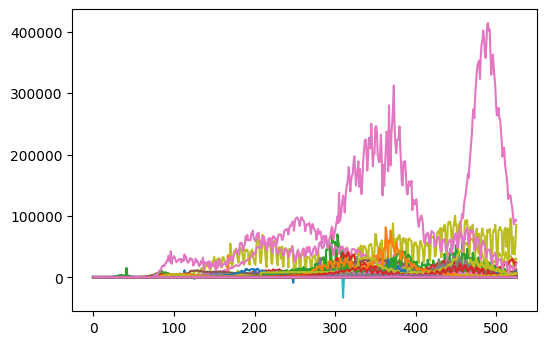

In [10]:
plt.plot(all_country.T)
plt.show()

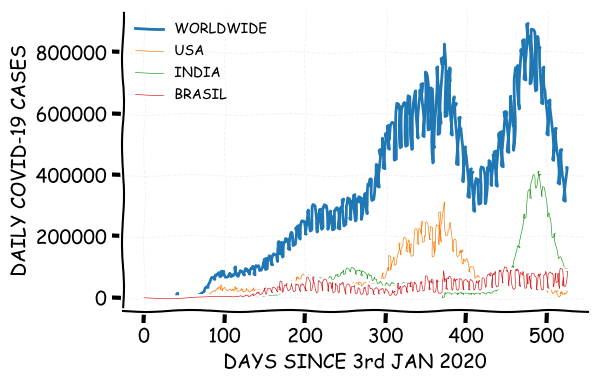

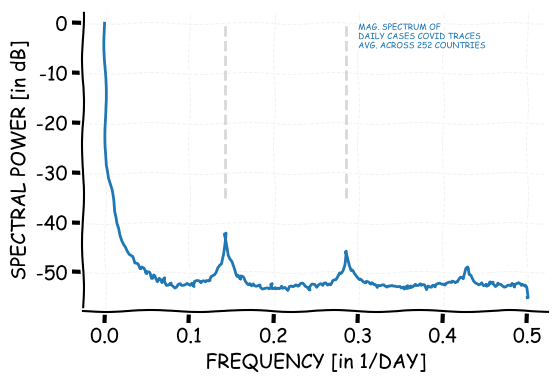

In [11]:
S = []
for i in range(all_country.shape[0]):
#     s = all_country[np.where(countries=='United States of America')[0][0],:]
    s = np.nan_to_num(all_country[i,:])+1e-10
    s[s<0] = 0
    s = s/np.max(np.abs(s))
    S.append(s)

# take fft
nfft = 512
S = np.array(S)
S_fft = np.abs(np.fft.rfft(S,nfft,axis=1))
# normalize
for i in range(S.shape[0]):
    S_fft[i,:] = S_fft[i,:]/(np.max(S_fft[i,:])+10e-10)
#mean and std 
S_fft = 20*np.log10(S_fft+10e-20)
S_mu = np.mean(S_fft,axis=0)
S_std = np.std(S_fft,axis=0)/np.sqrt(all_country.shape[0])



# plot time series
fig = plt.subplots(figsize=[6,4])
plt.xkcd()
ax = plt.subplot(1,1,1)

clr_1 = 'tab:blue'
ax.plot(np.sum(all_country,axis=0),label='WORLDWIDE')
ax.plot(all_country[np.where(countries=='United States of America')[0][0],:],label='USA',linewidth=.5)
ax.plot(all_country[np.where(countries=='India')[0][0],:],label='INDIA',linewidth=.5)
ax.plot(all_country[np.where(countries=='Brazil')[0][0],:],label='BRASIL',linewidth=.5)
ax.legend(loc='upper left',fontsize=10,frameon=False)
ax.grid(axis='both', color='gray', linestyle='--', linewidth=.75,alpha=.1)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlabel('DAYS SINCE 3rd JAN 2020')
ax.set_ylabel('DAILY COVID-19 CASES')
# ax.text(.3,-5,'MAG. SPECTRUM OF \nDAILY CASES COVID TRACES \nAVG. ACROSS 252 COUNTRIES',\
#        c=clr_1,fontsize=6)
fmt = 'png'
plt.savefig('/Users/neeks/Desktop/Documents/work/code/python_codes/notebookCodes/coswara/figures/'\
                  +'covid_trace_spectrum.'+fmt, dpi=300, format=fmt,transparent=False,bbox_inches='tight')
plt.show()


# plot spectrum
fig = plt.subplots(figsize=[6,4])
ax = plt.subplot(1,1,1)

fs = 1
faxis = np.arange(0,nfft/2+1)*fs/nfft
clr_1 = 'tab:blue'
ax.plot(faxis,S_mu,c=clr_1,linewidth=2)
# ax.plot(faxis,S_mu - S_std,color='r',alpha=.3,linewidth=.5)
# ax.plot(faxis,S_mu + S_std,color='r',alpha=.3,linewidth=.5)
ax.vlines(1/7, -35, 0, colors='gray', linestyles='--',alpha=.3)
ax.vlines(2/7, -35, 0, colors='gray', linestyles='--',alpha=.3)
ax.grid(axis='both', color='gray', linestyle='--', linewidth=.75,alpha=.1)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlabel('FREQUENCY [in 1/DAY]')
ax.set_ylabel('SPECTRAL POWER [in dB]')
ax.text(.3,-5,'MAG. SPECTRUM OF \nDAILY CASES COVID TRACES \nAVG. ACROSS 252 COUNTRIES',\
       c=clr_1,fontsize=6)
fmt = 'png'
plt.savefig('/Users/neeks/Desktop/Documents/work/code/python_codes/notebookCodes/coswara/figures/'\
                  +'covid_trace_time_domain.'+fmt, dpi=300, format=fmt,transparent=False,bbox_inches='tight')
plt.show()

# emd = EMD()
# IMFs = emd(s)

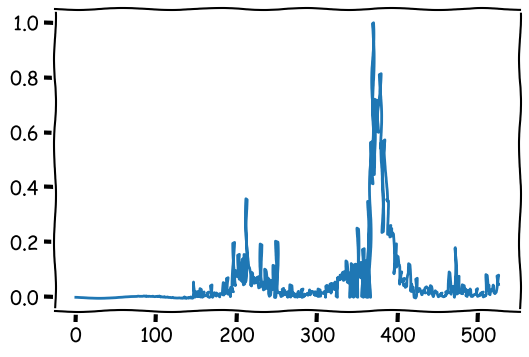

In [12]:
# s = np.nan_to_num(all_country[i,:])
# s = s - np.mean(s)
# s = s/np.max(np.abs(s))
# plt.plot(s)
plt.plot(s)
plt.show()

In [13]:
np.mean(s)

0.05500912268980029

NameError: name 'total_cases' is not defined

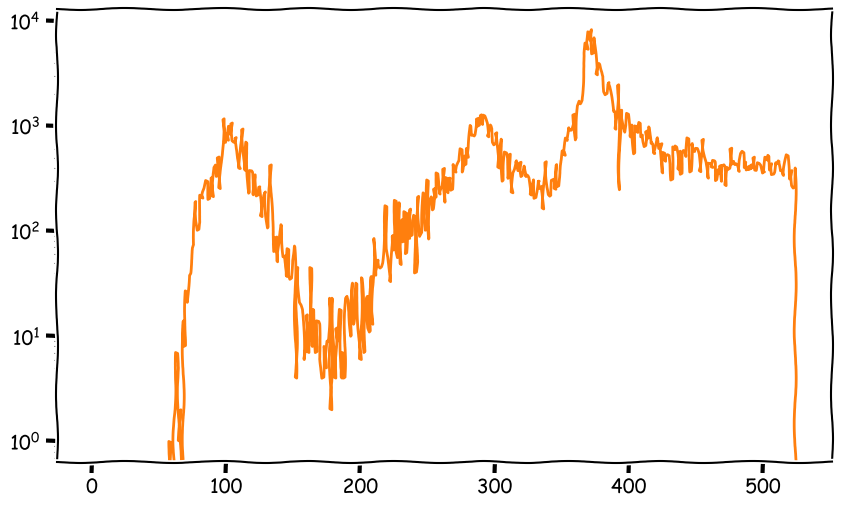

In [14]:
fig = plt.subplots(figsize=(10,6))
ax = plt.subplot(1,1,1)
ax.semilogy(all_country[100,:],color='tab:orange')
ax.plot(total_cases['totalrecovered'],color='black')
ax.plot([i for i in total_cases['totaldeceased']],color='tab:green')
for i in range(len(total_cases['totalrecovered'])):
    ax.hlines(total_cases['totalrecovered'][i],i-14,i,colors='grey', linestyles='solid',alpha=0.3)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=2)
ax.grid(True)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('axes', -0.05))
xticks = [0,55,76,95,109,123,len(total_cases['totalconfirmed'])]
ax.set_xticks(xticks)
ax.set_xticklabels([total_cases['date'][xticks[0]],total_cases['date'][xticks[1]],
                    total_cases['date'][xticks[2]],total_cases['date'][xticks[3]],
                    total_cases['date'][xticks[4]],total_cases['date'][xticks[5]],
                    total_cases['date'][-1]])
# axes.set_ylim([0,70])
plt.show()

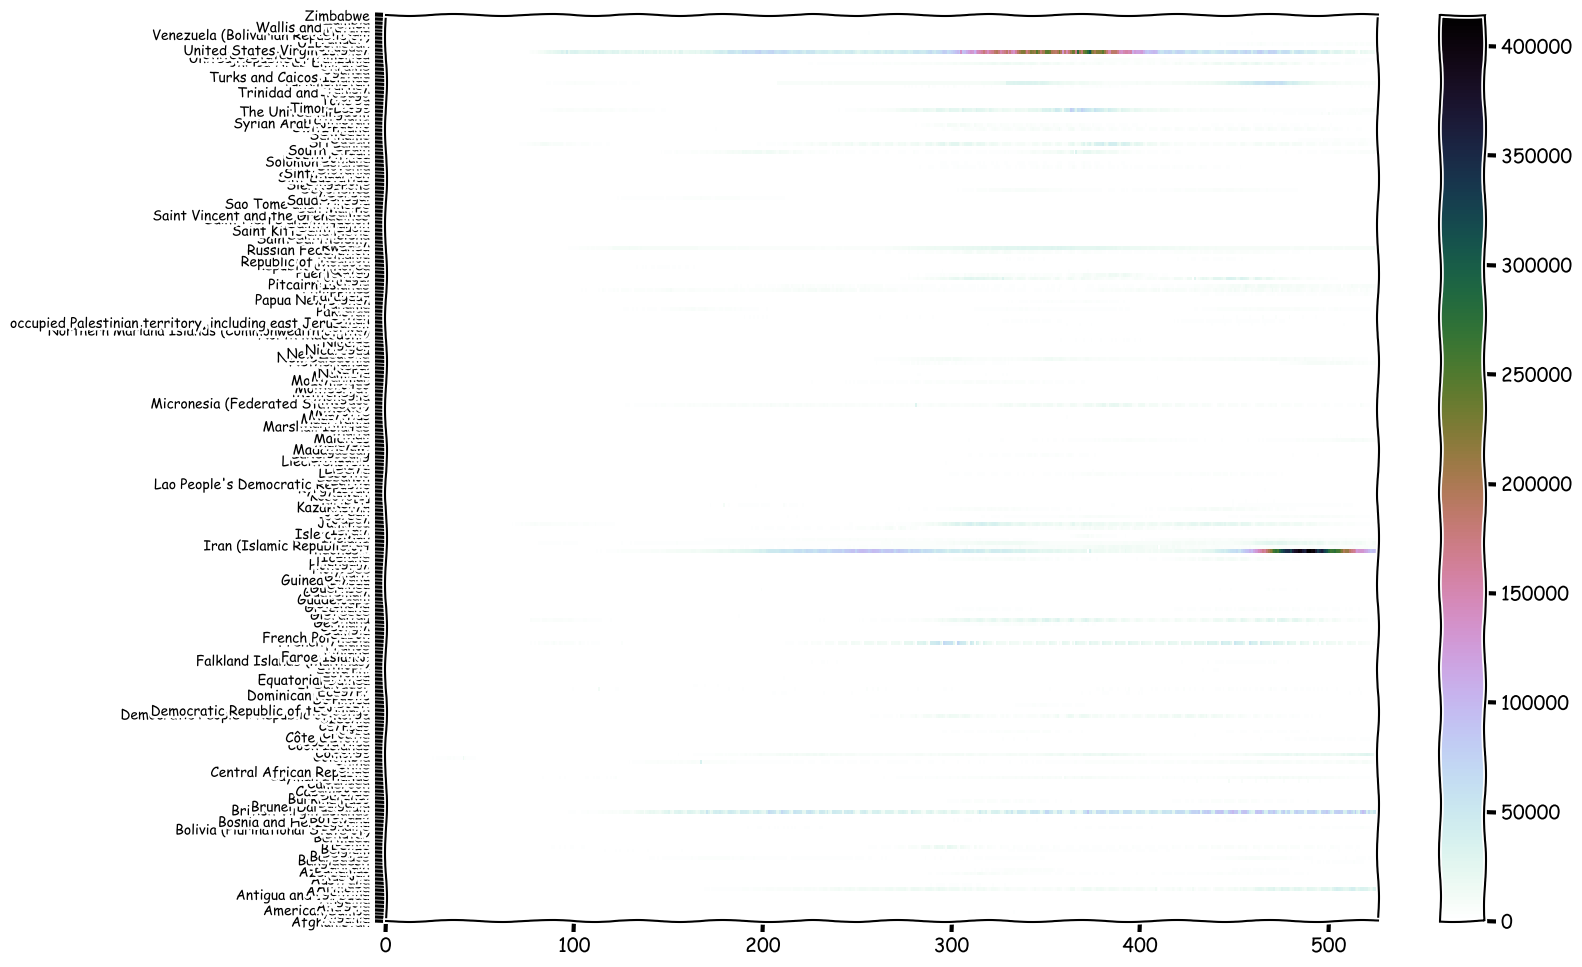

In [15]:
fig,ax = plt.subplots(1,1,figsize=(16,12))
X, Y = np.arange(0,all_country.shape[1]), np.arange(0,all_country.shape[0])
im = ax.pcolormesh(X,Y, all_country, vmin=0, vmax=np.max(all_country), cmap='cubehelix_r')
plt.xlim(0,all_country.shape[1])
plt.yticks(np.arange(0,all_country.shape[0]), countries,rotation=0,fontsize=10)
cbar = fig.colorbar(im, ax=ax)
# cbar.set_label('CUMULATIVE DEATHS',size=13)
# plt.ylabel("COUNTRY",fontsize=13)
# plt.xlabel("DAYS",fontsize=13)
# plt.title('COVID-19 Fatality Spread Across Globe',fontsize=13)
plt.show()



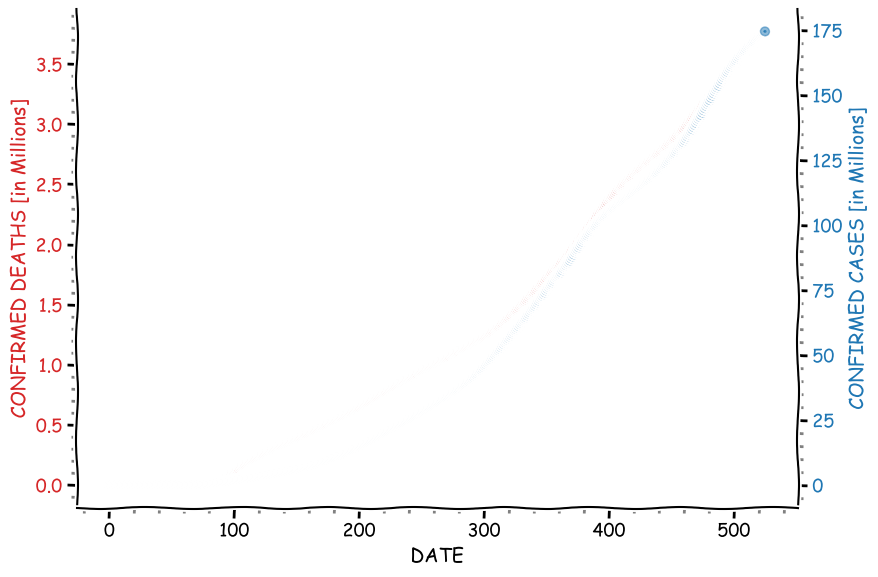

In [16]:
# Create some mock data
fig, ax1 = plt.subplots(figsize=(9,6))

color = 'tab:red'
ax1.set_xlabel('DATE')
ax1.set_ylabel('CONFIRMED DEATHS [in Millions]', color=color, fontsize=14)
ax1.plot(np.array(data_1)/1e6, '-o',color=color,alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color)
ax1.spines['top'].set_visible(False)
ax1.grid(True)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4, color='gray')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
# plt.xticks([0,31,60,91,len(sorteddates)-1],\
#            ['11 Jan','11 Feb','11 Mar','11 Apr','16 May 2020'],rotation=0)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('CONFIRMED CASES [in Millions]', color=color,fontsize=14)  # we already handled the x-label with ax1
ax2.plot(np.array(data_2)/1e6,'-o', color=color,alpha=0.5)
ax2.tick_params(axis='y', labelcolor=color)
ax2.spines['top'].set_visible(False)
ax1.grid(True)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.tick_params(which='both', width=2)
ax2.tick_params(which='major', length=7)
ax2.tick_params(which='minor', length=4, color='gray')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
# plt.xticks([0,31,60,91,len(sorteddates)-1],\
#            ['11 Jan','11 Feb','11 Mar','11 Apr','16 May 2020'],rotation=0)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.savefig(path_store_figure+"IS2020_coswara_covid_who.pdf", bbox_inches='tight')
plt.show()


In [17]:
print(sorteddates[0])
print(sorteddates[31])
print(sorteddates[60])
print(sorteddates[91])
print(sorteddates[121])
print(sorteddates[-1])
xticks = [0,31,60,91,121,len(sorteddates)-1]

2020-01-03
2020-02-03
2020-03-03
2020-04-03
2020-05-03
2021-06-11


In [61]:
import json
import requests
import seaborn as sns
from scipy.signal import savgol_filter


sns.set(style="ticks")

In [19]:
# get COVID data from COVID19india.ORG    
resp = requests.get('https://api.covid19india.org/data.json')
if resp.status_code != 200:
    # This means something went wrong.
    raise ApiError('GET /tasks/ {}'.format(resp.status_code))
    
    
daily_testing = {}
daily_testing['totalsamplestested'] = []
daily_testing['samplereportedtoday'] = []
daily_testing['date'] = []
daily_testing['vaccinated'] = []


for item in resp.json()['tested']:
    if item['totalsamplestested']!='':
        daily_testing['totalsamplestested'].append(int(item['totalsamplestested']))
    else:
        daily_testing['totalsamplestested'].append(0)
        
    if item['totalindividualsvaccinated']!='':
        daily_testing['vaccinated'].append(int(item['totalindividualsvaccinated']))
    else:
        daily_testing['vaccinated'].append(0)
        
#     daily_testing['date'].append(item['updatetimestamp'])

daily_cases = {}
daily_cases['dailyconfirmed'] = []
daily_cases['dailydeceased'] = []
daily_cases['dailyrecovered'] = []
daily_cases['date'] = []


for item in resp.json()['cases_time_series']:
    daily_cases['dailyconfirmed'].append(int(item['dailyconfirmed']))
    daily_cases['dailydeceased'].append(int(item['dailydeceased']))
    daily_cases['dailyrecovered'].append(int(item['dailyrecovered']))
    daily_cases['date'].append(item['date'])
    
total_cases = {}
total_cases['totalconfirmed'] = []
total_cases['totaldeceased'] = []
total_cases['totalrecovered'] = []
total_cases['date'] = []

for item in resp.json()['cases_time_series']:
    total_cases['totalconfirmed'].append(int(item['totalconfirmed']))
    total_cases['totaldeceased'].append(int(item['totaldeceased']))
    total_cases['totalrecovered'].append(int(item['totalrecovered']))
    total_cases['date'].append(item['date'])
    

In [20]:
mpl.rcParams.update(mpl.rcParamsDefault)

/Users/neeks/miniconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: AutoMinorLocator does not work with logarithmic scale


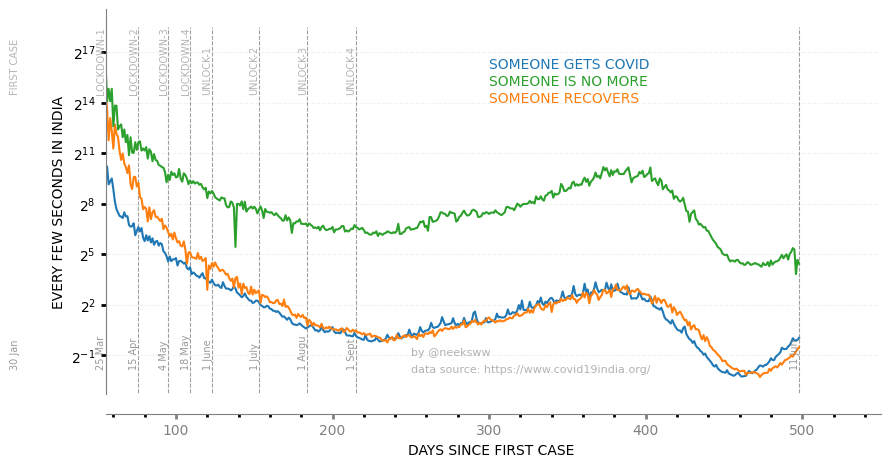

In [22]:
fig = plt.subplots(figsize=(10,5))
clr_1 = "tab:blue"
clr_2 = "tab:orange"
clr_3 = "tab:green"

ax = plt.subplot(1,1,1)
ax.semilogy([24*60*60/i if i>0 else 0 for i in daily_cases['dailyconfirmed']],color=clr_1,label='SOMEONE BECOMES A PATIENT',
           basey=2)
ax.plot([24*60*60/i if i>0 else 0 for i in daily_cases['dailyrecovered']],color=clr_2,label='SOMEONE RECOVERS')
ax.plot([24*60*60/i if i>0 else 0 for i in daily_cases['dailydeceased']],color=clr_3,label='SOMEONE DIES')
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=2)
ax.grid(axis='y', color='gray', linestyle='--', linewidth=.75,alpha=.1)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -.05))
ax.yaxis.set_ticks_position('left')
ax.text(300,2**16,'SOMEONE GETS COVID',fontsize=10,color=clr_1)
ax.text(300,2**15,'SOMEONE IS NO MORE',fontsize=10,color=clr_3)
ax.text(300,2**14,'SOMEONE RECOVERS',fontsize=10,color=clr_2)



xticks = [0,55,76,95,109,123,153,184,215,len(total_cases['totalconfirmed'])-1]
cnt = 0
str_lock = ['FIRST CASE','LOCKDOWN-1','LOCKDOWN-2','LOCKDOWN-3','LOCKDOWN-4','UNLOCK-1','UNLOCK-2','UNLOCK-3'\
            ,'UNLOCK-4',' ']
xlabels = []
ind_1 = 6

for i in xticks:
    ax.vlines(i,min(total_cases['totaldeceased']),max(total_cases['totaldeceased']),
              linestyles ="--", colors ="gray",alpha=0.5,linewidth=.75)
    ax.vlines(i,min(total_cases['totaldeceased']),max(total_cases['totaldeceased']),
              linestyles ="--", colors ="gray",alpha=0.5,linewidth=.75)
    ax.text(x=i-6,y=25000,s=str_lock[cnt],rotation=90,fontsize=7,color='gray',alpha=0.6)
    if  i == len(total_cases['totalconfirmed']):
        xlabels.append(total_cases['date'][-1][:ind_1])
    else:
        xlabels.append(total_cases['date'][xticks[cnt]][:ind_1])
    ax.text(i-6,.3,xlabels[cnt],rotation=90,fontsize=7,color='gray',alpha=0.8)
    cnt = cnt+1
ax.set_ylabel('EVERY FEW SECONDS IN INDIA',fontsize=10)
ax.set_xlabel('DAYS SINCE FIRST CASE ',fontsize=10)
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('gray')
ax.spines["left"].set_color('gray')
ax.tick_params(axis='x', colors='gray')
ax.text(250,.5,'by @neeksww',fontsize=8,color='gray',alpha=0.6)
ax.text(250,.25,'data source: https://www.covid19india.org/',fontsize=8,color='gray',alpha=0.6)

ax.set_xlim(55,550)
fmt = 'png'
plt.savefig('/Users/neeks/Desktop/Documents/work/code/python_codes/notebookCodes/coswara/figures/'\
                  +'covid_status_time_whole_india.'+fmt, dpi=300, format=fmt,transparent=True,bbox_inches='tight')
plt.show()





In [24]:
url = 'http://api.covid19india.org/csv/latest/vaccine_doses_statewise.csv'
df = pd.read_csv(url)
temp = df[df['State']=='Total'].reset_index(drop=True)
vals = []
for key in temp.columns:
    if key !='State':
        vals.append(temp[key].values[0])


In [25]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
df = pd.read_csv(url)
df = df[df['location']=='India'].reset_index(drop=True)
vals = df['total_vaccinations'].values

In [26]:
d_0 = date(2020, 1, 30)
d_1 = date(int(df['date'][0].split('-')[0]), int(df['date'][0].split('-')[1][1]), int(df['date'][0].split('-')[2]))
d_2 = date(int(df['date'][len(df)-1].split('-')[0]), int(df['date'][len(df)-1].split('-')[1][1]), int(df['date'][len(df)-1].split('-')[2]))

delta = d_1 - d_0
delta.days

daily_cases['vaccinations'] = []
cnt = 0
for i in range(len(daily_cases['dailydeceased'])):
    if i < (d_1-d_0).days:
        daily_cases['vaccinations'].append(0)
    elif i < (d_2-d_0).days:
        daily_cases['vaccinations'].append(vals[cnt])
        cnt = cnt+1
    else:
        daily_cases['vaccinations'].append(vals[cnt-1])

daily_cases['vaccinations'] = np.array([0] + list(np.diff(daily_cases['vaccinations'])))
daily_cases['vaccinations'][daily_cases['vaccinations']==0] = np.nan

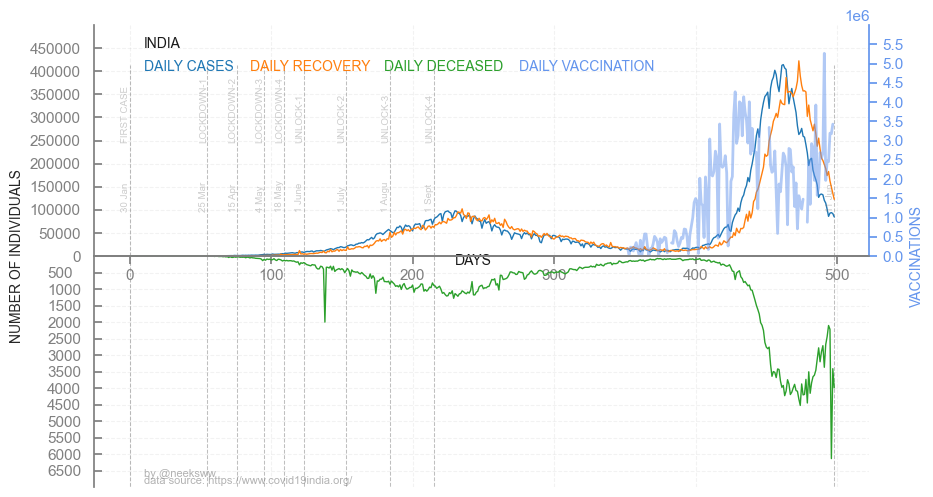

In [85]:
fig = plt.subplots(figsize=(10,6))
clr_1 = "tab:blue"
clr_2 = "tab:orange"
clr_3 = "tab:green"
clr_4 = 'cornflowerblue'
LW = 1.0

ax1 = plt.subplot(1,1,1)
x_11 = np.arange(0,len(daily_cases['dailyconfirmed']),1)
y_11 = daily_cases['dailyconfirmed']
y_12 = daily_cases['dailyrecovered']
y_max = np.ceil(max(y_11)/1e5)*1e5

ax1.plot(x_11,y_11,color=clr_1,label='DAILY CASES', linewidth = LW)
ax1.plot(x_11,y_12,color=clr_2,label='DAILY RECOVERED', linewidth = LW)
ax1.grid(axis='both', color='gray', linestyle='--', linewidth=.75,alpha=.1)
ax1.spines['top'].set_color('none')
ax1.spines['bottom'].set_position('center')
ax1.spines["left"].set_bounds(0, y_max)
ax1.spines["left"].set_color('gray')
ax1.spines["right"].set_bounds(0, 0)
ax1.spines['bottom'].set_color('gray')
ax1.tick_params(axis='y', colors='gray')
ax1.tick_params(axis='x', colors='gray')

ax1.set_yticks(np.arange(0, y_max,50000)) 
ax1.set_ylim([-y_max,y_max])
top_pad_1 = 50000 
top_pad_2 = 100000 

ax1.text(10,y_max-top_pad_1,'INDIA',fontsize=10,color='k')
ax1.text(10,y_max-top_pad_2,'DAILY CASES',fontsize=10,color=clr_1)
ax1.text(85,y_max-top_pad_2,'DAILY RECOVERY',fontsize=10,color=clr_2)
ax1.text(180,y_max-top_pad_2,'DAILY DECEASED',fontsize=10,color=clr_3)
ax1.text(275,y_max-top_pad_2,'DAILY VACCINATION',fontsize=10,color=clr_4)
ax1.text(230,-20000,'DAYS',fontsize=10,color='k')
ax1.tick_params(axis='y', colors='gray',direction='out')


ax2 = ax1.twinx()  
x_21 = np.arange(0,len(daily_cases['dailydeceased']),1)
y_21 = daily_cases['dailydeceased']
y_max = np.ceil(max(y_21)/1e3)*1e3

ax2.plot(x_21,y_21,color=clr_3,label='DAILY DECEASED', linewidth = LW)
ax2.grid(axis='both',color='gray', linestyle='--', linewidth=.75,alpha=.1)
# ax2.xaxis.set_minor_locator(AutoMinorLocator())
# ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.spines['top'].set_color('none')
ax2.spines['bottom'].set_position('center')
ax2.spines["left"].set_bounds(0, y_max)
ax2.spines["left"].set_bounds(0, 0)
ax2.spines["right"].set_bounds(0, y_max)
ax2.spines["right"].set_position(('axes',0))
ax2.spines['bottom'].set_color('gray')
ax2.spines["right"].set_color('gray')
ax2.tick_params(axis='x', colors='gray')

ax2.set_yticks(np.arange(0,y_max,500)[1:]) 
ax2.set_ylim([-y_max,y_max])
plt.gca().invert_yaxis()
ax1.tick_params(axis='y', colors='gray',direction='in', pad=10)
ax2.tick_params(axis='y', colors='gray',direction='out', pad=-40)


xticks = [0,55,76,95,109,123,153,184,215,len(total_cases['totalconfirmed'])-1]
cnt = 0
str_lock = ['FIRST CASE','LOCKDOWN-1','LOCKDOWN-2','LOCKDOWN-3','LOCKDOWN-4','UNLOCK-1','UNLOCK-2','UNLOCK-3'\
            ,'UNLOCK-4',' ']
xlabels = []
ind_1 = 6
for i in xticks:
    ax1.vlines(i,0,max(daily_cases['dailyconfirmed']),
              linestyles ="--", colors ="gray",alpha=0.5,linewidth=.75)
    ax2.vlines(i,min(total_cases['totaldeceased']),max(total_cases['totaldeceased']),
              linestyles ="--", colors ="gray",alpha=0.5,linewidth=.75)
    ax1.text(i-6,250000,str_lock[cnt],rotation=90,fontsize=7,color='gray',alpha=0.4)
    if  i == len(total_cases['totalconfirmed']):
        xlabels.append(total_cases['date'][-1][:ind_1])
    else:
        xlabels.append(total_cases['date'][xticks[cnt]][:ind_1])
    ax1.text(i-6,100000,xlabels[cnt],rotation=90,fontsize=7,color='gray',alpha=0.4)
    cnt = cnt+1
ax1.set_ylabel('NUMBER OF INDIVIDUALS',fontsize=10)
ax2.text(10,y_max-300,'by @neeksww',fontsize=8,color='gray',alpha=0.6)
ax2.text(10,y_max-100,'data source: https://www.covid19india.org/',fontsize=8,color='gray',alpha=0.6)

ax3 = ax1.twinx()  
x_31 = np.arange(0,len(daily_cases['vaccinations']))
# y_31 = savgol_filter(daily_cases['vaccinations'],3,1)
y_31 = daily_cases['vaccinations']
y_max = np.ceil(np.max(np.nan_to_num(np.array(y_31)))/1e6)*1e6
LW = 2
ax3.plot(x_31,y_31,color=clr_4,label='DAILY DECEASED', alpha=.5, linewidth = LW)
ax3.spines['top'].set_color('none')
ax3.spines['bottom'].set_position('center')
ax3.spines["left"].set_bounds(0,0)
ax3.spines["right"].set_color(clr_4)
ax3.spines["left"].set_color('gray')
ax3.spines["right"].set_bounds(0, y_max)
ax3.spines['bottom'].set_color('gray')
ax3.tick_params(axis='y', colors=clr_4)

ax3.set_yticks(np.arange(0, y_max,500000)) 
ax3.set_ylim([-y_max,y_max])
ax3.set_ylabel('VACCINATIONS',fontsize=10,color=clr_4)

fmt = 'png'
plt.savefig('/Users/neeks/Desktop/Documents/work/code/python_codes/notebookCodes/coswara/figures/'\
                  +'covid_status_whole_india.'+fmt, dpi=300, format=fmt,transparent=True,bbox_inches='tight')
plt.show()

In [58]:
y_max

6000000.0

In [19]:
dataset = {}

dataset['month'] = []
dataset['day'] = []
dataset['year'] = []

dataset['dailyconfirmed'] = daily_cases['dailyconfirmed']
dataset['dailyrecovered'] = daily_cases['dailyrecovered']
dataset['dailydeceased'] = daily_cases['dailydeceased']

In [20]:
# date creation
for date in total_cases['date']:
    day = int(date.split(' ' )[0])
    month = date.split(' ')[1]
    if month == 'January':
        month_val = 1
    if month == 'February':
        month_val = 2
    if month == 'March':
        month_val = 3
    if month == 'April':
        month_val = 4
    if month == 'May':
        month_val = 5
    if month == 'June':
        month_val = 6
    if month == 'July':
        month_val = 7
    if month == 'August':
        month_val = 8
    if month == 'September':
        month_val = 9
    if month == 'October':
        month_val = 10
    if month == 'November':
        month_val = 11
    if month == 'December':
        month_val = 12
    year_val = 2020
    day_val = datetime.datetime(year_val, month_val, day).strftime("%A")
    # push into dict
    dataset['day'].append(day_val)
    dataset['month'].append(month_val)
    dataset['year'].append(year_val)

In [21]:
df = pd.DataFrame.from_dict(dataset)

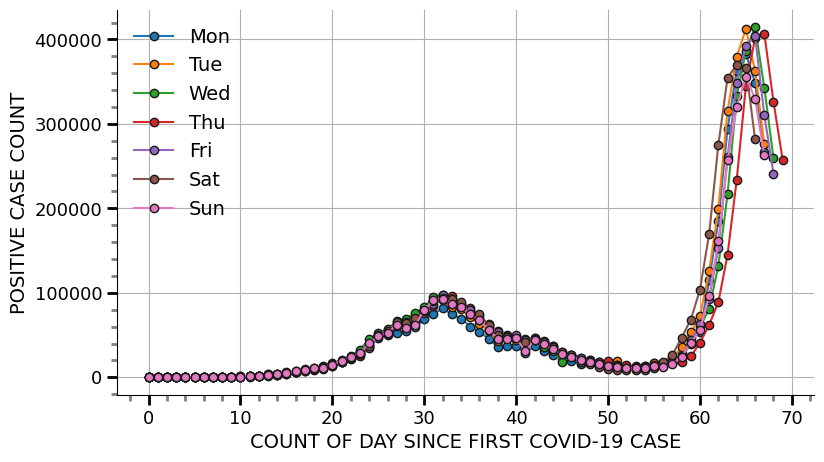

In [22]:
label_day = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

fig = plt.subplots(figsize=[9,5])
ax = plt.subplot(1,1,1)
day_mu = []
for i in label_day:
#     if i == 'Monday' or i == 'Saturday':
        temp = df[df['day']==i]['dailyconfirmed'].values
        ax.plot(temp,'-',label=i[:3],marker='o',markeredgecolor='k')
        day_mu.append(np.mean(df[df['day']==i]['dailyconfirmed']))
        ax.grid(True)
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
ax1.grid(color='gray', linestyle='--', linewidth=1,alpha=.1)
ax.set_xlabel('COUNT OF DAY SINCE FIRST COVID-19 CASE',fontsize=14)
ax.set_ylabel('POSITIVE CASE COUNT',fontsize=14)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4, color='gray')
ax.legend(frameon=False,fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

# ax = plt.subplot(1,3,2)
# for i in label_day:
#     ax.plot(df[df['day']==i]['dailyrecovered'])
#     ax.grid(True)
#     ax.spines['right'].set_color('none')
#     ax.spines['top'].set_color('none')

# ax = plt.subplot(1,3,3)
# for i in label_day:
#     ax.plot(df[df['day']==i]['dailydeceased'])
#     ax.grid(True)
#     ax.spines['right'].set_color('none')
#     ax.spines['top'].set_color('none')


2666.6666666666665


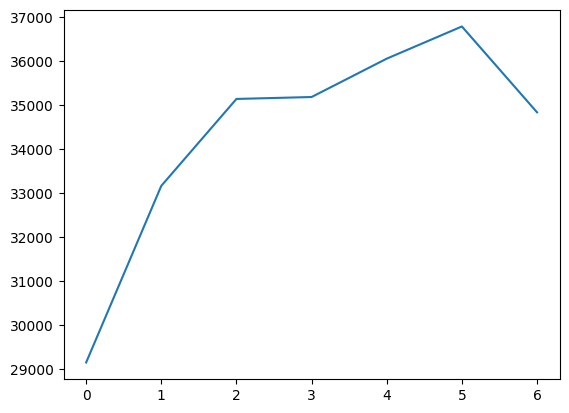

In [69]:
a = df[df['day']==i]['dailyconfirmed']
print(80000/30)
plt.plot(day_mu)

/Users/neeks/miniconda2/envs/py36/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


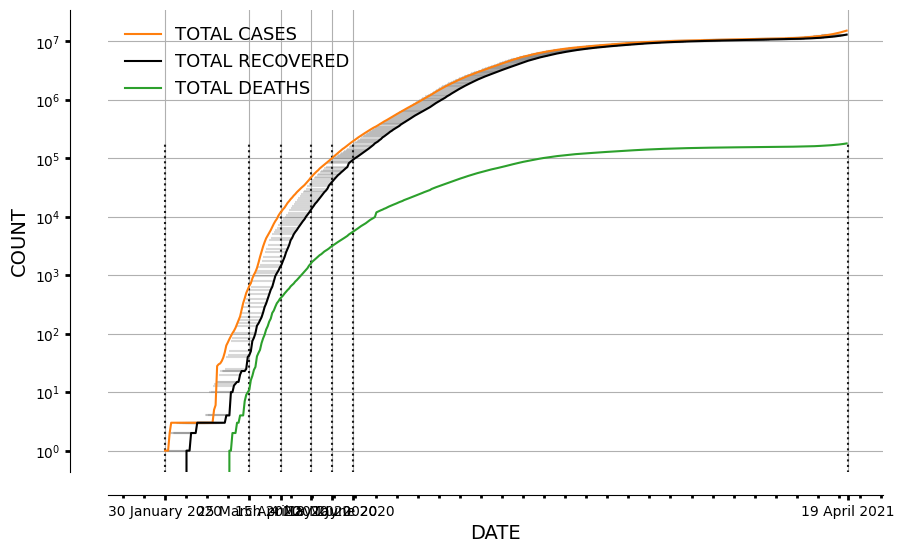

In [70]:
fig = plt.subplots(figsize=(10,6))
ax = plt.subplot(1,1,1)
ax.semilogy(total_cases['totalconfirmed'],color='tab:orange',label='TOTAL CASES')
# ax.plot(total_cases['totalconfirmed'],color='tab:orange',label='TOTAL CASES')
ax.plot(total_cases['totalrecovered'],color='black',label='TOTAL RECOVERED')
ax.plot([i for i in total_cases['totaldeceased']],color='tab:green',label='TOTAL DEATHS')
for i in range(len(total_cases['totalrecovered'])):
    ax.hlines(total_cases['totalrecovered'][i],i-14,i,colors='grey', linestyles='solid',alpha=0.3)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=2)
ax.grid(True)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))  ,       
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('axes', -0.05))
xticks = [0,55,76,95,109,123,len(total_cases['totalconfirmed'])]
for i in xticks:
    ax.vlines(i,min(total_cases['totaldeceased']),max(total_cases['totaldeceased']),linestyles ="dotted", colors ="k")
ax.set_xticks(xticks)
ax.set_xticklabels([total_cases['date'][xticks[0]],total_cases['date'][xticks[1]],
                    total_cases['date'][xticks[2]],total_cases['date'][xticks[3]],
                    total_cases['date'][xticks[4]],total_cases['date'][xticks[5]],
                    total_cases['date'][-1]])
ax.set_xlabel('DATE',fontsize=14)
ax.set_ylabel('COUNT',fontsize=14)
ax.legend(loc='upper left',frameon=False,fontsize=13)
plt.show()


In [71]:
if resp.json()['tested'][-1]['totalindividualstested']!=None:
    print(resp.json()['tested'][-1]['totalindividualstested'])
    
if resp.json()['tested'][-1]['samplereportedtoday']!=None:
    print(resp.json()['tested'][-1]['totalsamplestested'])


269414035


In [72]:
resp.json()['cases_time_series']

[{'dailyconfirmed': '1',
  'dailydeceased': '0',
  'dailyrecovered': '0',
  'date': '30 January 2020',
  'dateymd': '2020-01-30',
  'totalconfirmed': '1',
  'totaldeceased': '0',
  'totalrecovered': '0'},
 {'dailyconfirmed': '0',
  'dailydeceased': '0',
  'dailyrecovered': '0',
  'date': '31 January 2020',
  'dateymd': '2020-01-31',
  'totalconfirmed': '1',
  'totaldeceased': '0',
  'totalrecovered': '0'},
 {'dailyconfirmed': '0',
  'dailydeceased': '0',
  'dailyrecovered': '0',
  'date': '1 February 2020',
  'dateymd': '2020-02-01',
  'totalconfirmed': '1',
  'totaldeceased': '0',
  'totalrecovered': '0'},
 {'dailyconfirmed': '1',
  'dailydeceased': '0',
  'dailyrecovered': '0',
  'date': '2 February 2020',
  'dateymd': '2020-02-02',
  'totalconfirmed': '2',
  'totaldeceased': '0',
  'totalrecovered': '0'},
 {'dailyconfirmed': '1',
  'dailydeceased': '0',
  'dailyrecovered': '0',
  'date': '3 February 2020',
  'dateymd': '2020-02-03',
  'totalconfirmed': '3',
  'totaldeceased': '0',
 

In [73]:
resp = requests.get('https://api.covid19api.com/countries')
if resp.status_code != 200:
    # This means something went wrong.
    raise ApiError('GET /tasks/ {}'.format(resp.status_code))

    

In [74]:
resp.json()

[{'Country': 'French Guiana', 'Slug': 'french-guiana', 'ISO2': 'GF'},
 {'Country': 'Holy See (Vatican City State)',
  'Slug': 'holy-see-vatican-city-state',
  'ISO2': 'VA'},
 {'Country': 'Macedonia, Republic of', 'Slug': 'macedonia', 'ISO2': 'MK'},
 {'Country': 'Maldives', 'Slug': 'maldives', 'ISO2': 'MV'},
 {'Country': 'Réunion', 'Slug': 'réunion', 'ISO2': 'RE'},
 {'Country': 'Togo', 'Slug': 'togo', 'ISO2': 'TG'},
 {'Country': 'Viet Nam', 'Slug': 'vietnam', 'ISO2': 'VN'},
 {'Country': 'Cape Verde', 'Slug': 'cape-verde', 'ISO2': 'CV'},
 {'Country': 'Eritrea', 'Slug': 'eritrea', 'ISO2': 'ER'},
 {'Country': 'Libya', 'Slug': 'libya', 'ISO2': 'LY'},
 {'Country': 'Northern Mariana Islands',
  'Slug': 'northern-mariana-islands',
  'ISO2': 'MP'},
 {'Country': 'Swaziland', 'Slug': 'swaziland', 'ISO2': 'SZ'},
 {'Country': 'British Indian Ocean Territory',
  'Slug': 'british-indian-ocean-territory',
  'ISO2': 'IO'},
 {'Country': 'Cuba', 'Slug': 'cuba', 'ISO2': 'CU'},
 {'Country': 'Guernsey', 'Sl

In [75]:
df = pd.read_csv('./my_data/covid/tested_numbers_icmr_data.csv')

In [76]:
dates = df["Tested As Of"].values

In [77]:
daily_RTPCR_tets = df["Daily RTPCR tests"].values

In [78]:
temp = df["Total Samples Tested"].values
temp = df["Total Positive Cases"].values

In [79]:
df = pd.read_csv('./my_data/covid/state_wise_daily.csv')
df = pd.read_csv('https://api.covid19india.org/csv/latest/state_wise_daily.csv')

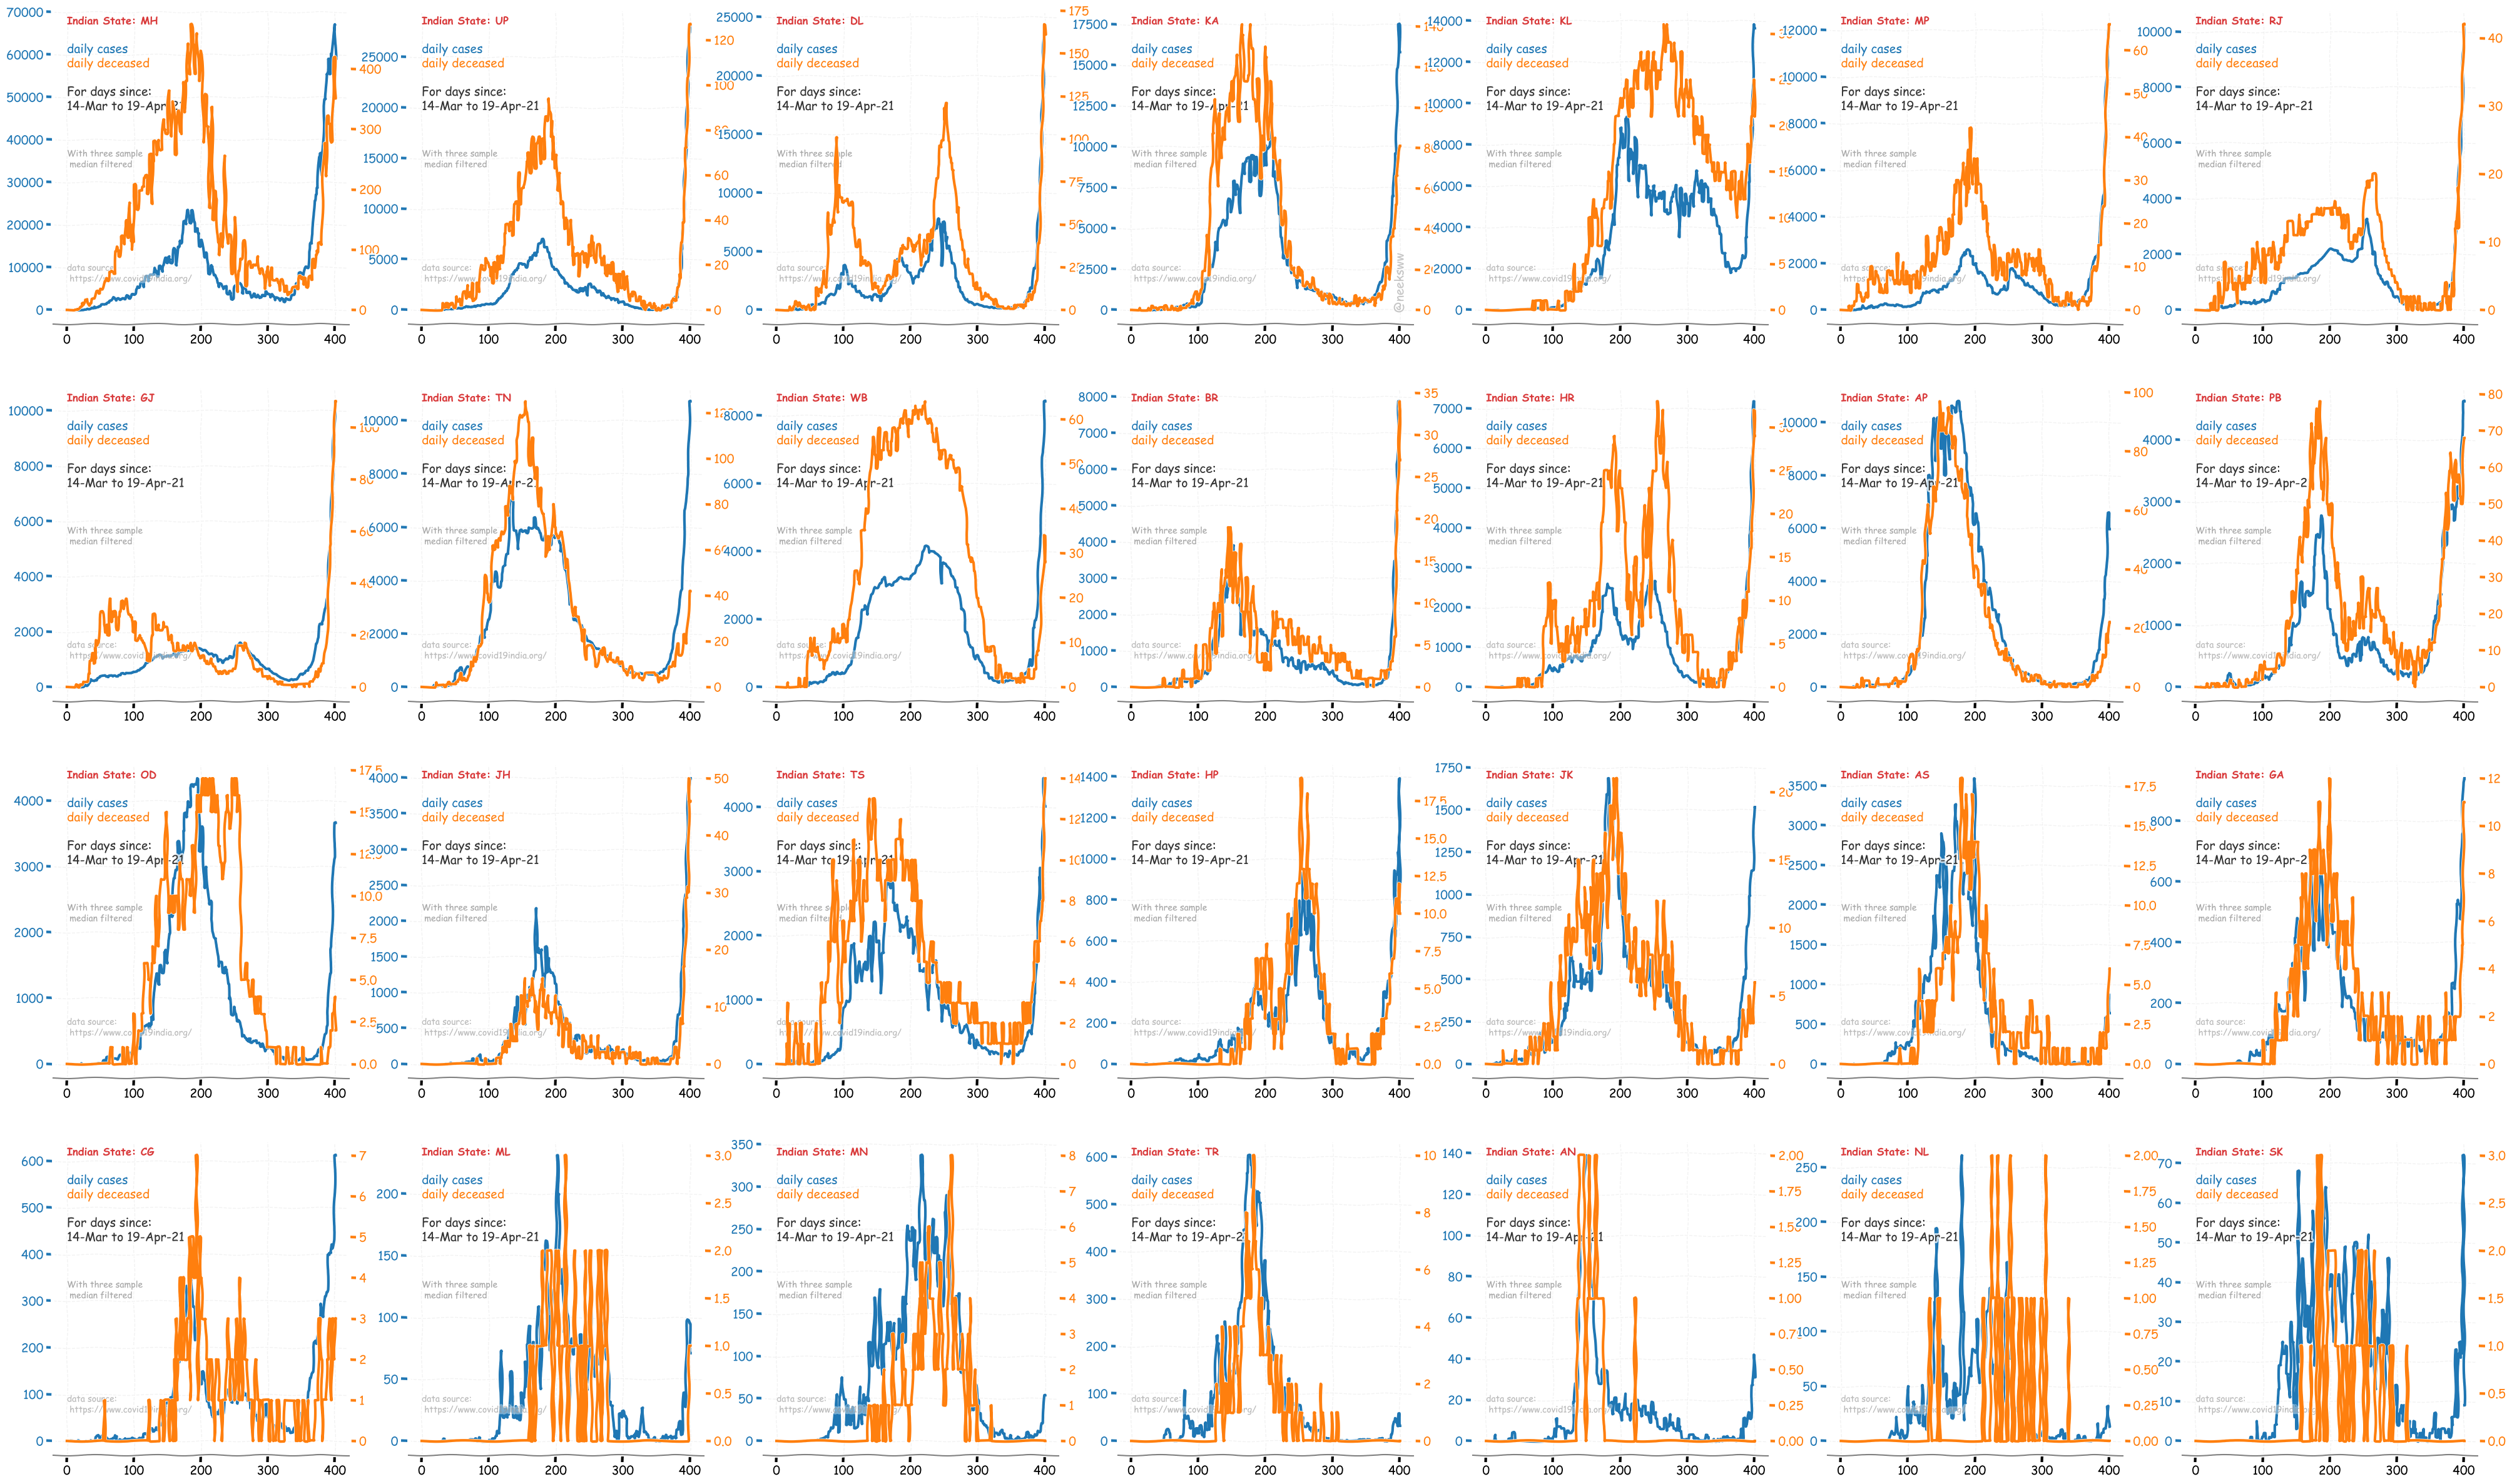

In [80]:
# temp_1 = normalize(temp_1,norm='max', axis=0)
state_labels = ['KA','TN','MH','DL','GJ','KL']
state_labels = ['MH','KA','AP','UP','TN','RJ','TG','AS','CH','KL','DL','BR',\
                'GJ','OR','WB','HR','JK','HP','MP','PB','NL','GA','JH','AN',\
                'MN','ML','SK','TR',
               ]
state_labels_= ['MH','KA','AP','UP','TN','RJ','TS','AS','CG','KL','DL','BR',\
                'GJ','OD','WB','HR','JK','HP','MP','PB','NL','GA','JH','AN',\
                'MN','ML','SK','TR'
               ]


clr_1 = 'tab:blue'
clr_2 = 'tab:orange'

cnt = 0
start_cases = []
start_decea = []
current_cases = []

for i in state_labels:
    cnt+= 1
    start_cases.append(np.where(np.cumsum(df[df['Status']=='Confirmed'][i].values)>5)[0][0])
    start_decea.append(np.where(np.cumsum(df[df['Status']=='Deceased'][i].values)>5)[0][0])
    current_cases.append(df[df['Status']=='Confirmed'][i].values[-1])

indx = np.argsort(current_cases)[::-1]   

fig = plt.subplots(figsize=[50,30])
cnt = 0
all_states_cases = []
all_states_decea = []

plt.xkcd()
for i in indx:
    cnt+= 1
    ax1 = plt.subplot(4,7,cnt)
    ax2 = ax1.twinx()  
    
    temp_1 = medfilt(df[df['Status']=='Confirmed'][state_labels[i]].values,3)
    all_states_cases.append(temp_1/max(temp_1))
#     temp_1 = savgol_filter(df[df['Status']=='Confirmed'][state_labels[i]].values,window_length=7, polyorder=1,\
#                            deriv=0, delta=1.0, axis=0, mode='nearest')
    
    temp_2 = medfilt(df[df['Status']=='Deceased'][state_labels[i]].values,3)
    all_states_decea.append(temp_2/(max(temp_2)))
#     temp_2 = savgol_filter(df[df['Status']=='Deceased'][state_labels[i]].values,window_length=7, polyorder=1,\
#                            deriv=0, delta=1.0, axis=0, mode='nearest')

    ax1.plot(np.arange(0,len(temp_1),1),temp_1,color=clr_1, linewidth=3)
    ax1.spines['right'].set_color('none')
    ax1.spines['left'].set_color('none')
    ax1.spines['top'].set_color('none')
    ax1.spines['bottom'].set_color('gray')
    ax1.tick_params(axis='y', colors=clr_1)
    ax2.tick_params(axis='x', colors='gray')
    ax1.text(0,max(temp_1)-0.0*max(temp_1),'Indian State: '+state_labels_[i],fontsize=12,color='tab:red',alpha=0.9,
            fontweight='bold')
#     ,\bbox=dict(facecolor='gray', alpha=0.2))
    ax1.text(0,max(temp_1)-0.1*max(temp_1),'daily cases',fontsize=14,color=clr_1)
    ax1.text(0,max(temp_1)-0.15*max(temp_1),'daily deceased',fontsize=14,color=clr_2)
    ax1.text(0,max(temp_1)-0.3*max(temp_1),'For days since:\n'+ df['Date'][0].split('-20')[0] +' to '+\
             df['Date'][len(df)-1].split('-20')[0],fontsize=14,color='black',alpha=0.75)
    ax1.text(0,max(temp_1)-0.5*max(temp_1),'With three sample\n median filtered',fontsize=10,color='gray',
                 rotation=0,alpha=0.6)
    ax1.text(0,max(temp_1)-0.9*max(temp_1),'data source:\n https://www.covid19india.org/',fontsize=10,color='gray',
                 rotation=0,alpha=0.4)
    if cnt == 4:
        ax1.text(len(temp_1)-10,0,'@neeksww',fontsize=14,color='gray',
                 rotation=90,alpha=0.3)
    ax1.grid(color='gray', linestyle='--', linewidth=1,alpha=.1)
    
    ax2.plot(np.arange(0,len(temp_2),1),temp_2,color=clr_2, linewidth=3)
    ax2.tick_params(axis='x', labelcolor=clr_2)    
    ax2.spines['top'].set_color('none')
    ax2.spines['right'].set_color('none')
    ax2.spines['left'].set_color('none')
    ax2.spines['bottom'].set_color('gray')
    ax2.tick_params(axis='y', colors=clr_2)

#     clr_face = (79/256,178/256,151/256)
#     ax1.set_facecolor(clr_face)
#     ax2.set_facecolor(clr_face)


fmt = 'png'
plt.savefig('/Users/neeks/Desktop/Documents/work/code/python_codes/notebookCodes/coswara/figures/'\
                  +'covid_status_india.'+fmt, dpi=300, format=fmt,transparent=False,bbox_inches='tight')
plt.show()

-5
(803,)


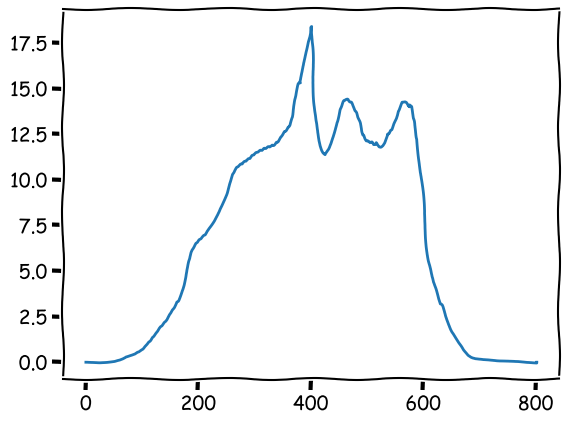

In [81]:
len(all_states_cases[0])
x = signal.correlate(all_states_cases[0],all_states_cases[4])
print(396-np.argmax(x))
print(x.shape)
plt.plot(x.T)
plt.show()

In [82]:
len(all_states_cases)

28

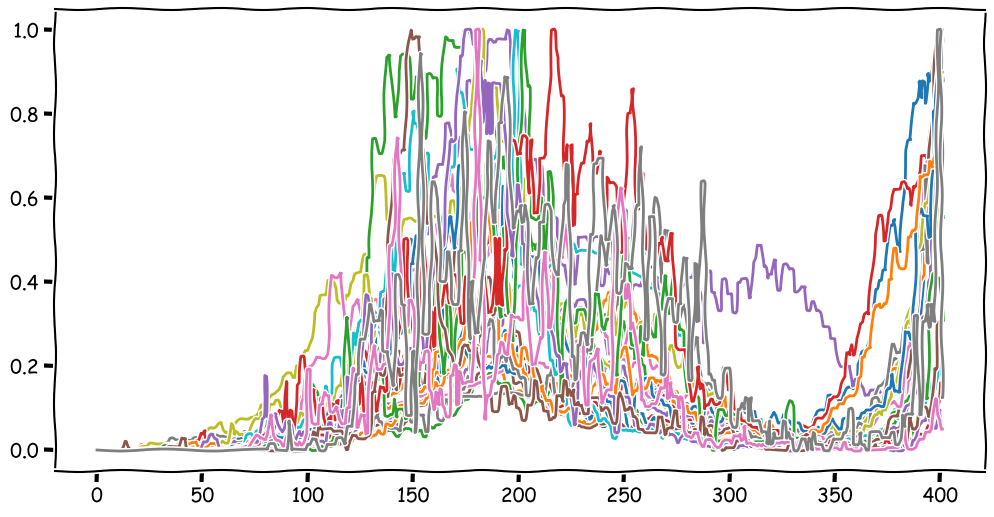

In [83]:
fig, ax = plt.subplots(figsize=[12,6])
for i in range(len(all_states_cases)):
    plt.plot(all_states_cases[i])
plt.show()

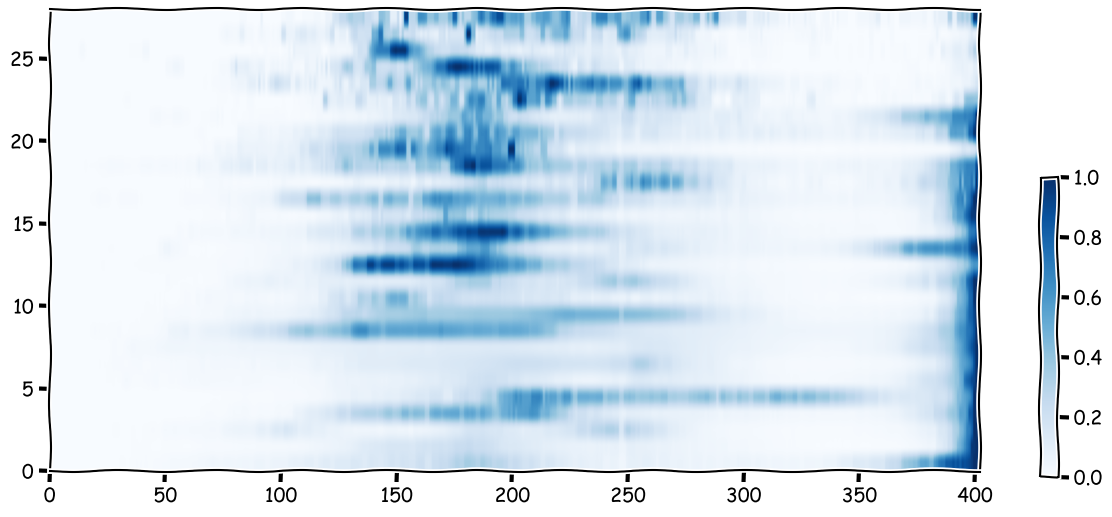

In [84]:
fig, ax = plt.subplots(figsize=[12,6])
im = ax.imshow(all_states_cases,origin='lower',aspect='auto',extent =\
               [0,temp_1.shape[0], 0, len(all_states_cases)],
               cmap='Blues',vmin = 0, vmax =1)
divider = make_axes_locatable(ax)
colorbar_ax = fig.add_axes([.95, 0.1, 0.015, 0.5])
fig.colorbar(im, cax=colorbar_ax)
plt.show()

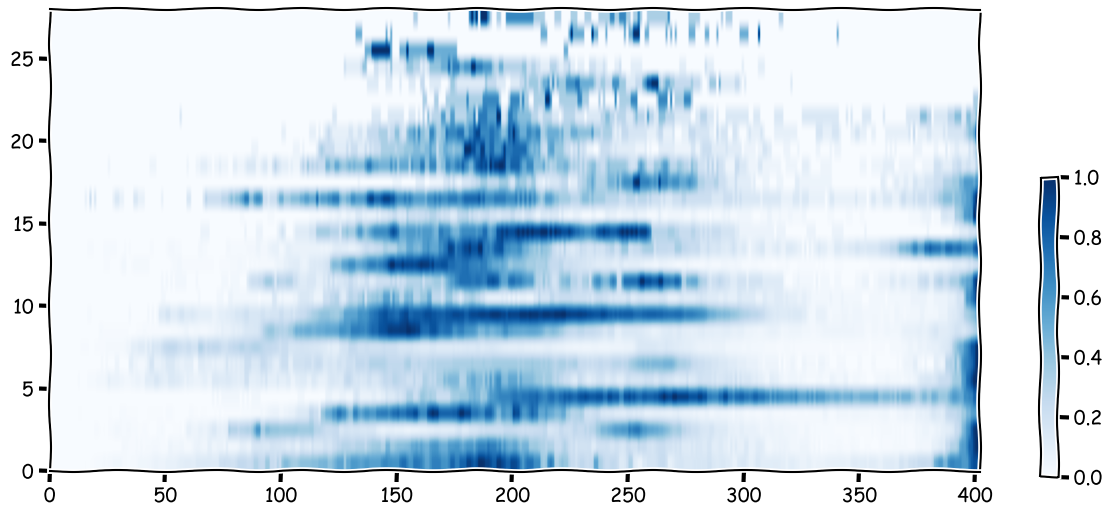

In [85]:
fig, ax = plt.subplots(figsize=[12,6])
im = ax.imshow(all_states_decea,origin='lower',aspect='auto',extent =\
               [0,temp_1.shape[0], 0, len(all_states_cases)],
               cmap='Blues',vmin = 0, vmax =1)
divider = make_axes_locatable(ax)
colorbar_ax = fig.add_axes([.95, 0.1, 0.015, 0.5])
fig.colorbar(im, cax=colorbar_ax)
plt.show()

In [34]:
df

Date    Date_YMD     Status     TT  AN    AP   AR    AS    BR  CH  \
0    14-Mar-20  2020-03-14  Confirmed     81   0     1    0     0     0   0   
1    14-Mar-20  2020-03-14  Recovered      9   0     0    0     0     0   0   
2    14-Mar-20  2020-03-14   Deceased      2   0     0    0     0     0   0   
3    15-Mar-20  2020-03-15  Confirmed     27   0     0    0     0     0   0   
4    15-Mar-20  2020-03-15  Recovered      4   0     0    0     0     0   0   
..         ...         ...        ...    ...  ..   ...  ...   ...   ...  ..   
679  26-Oct-20  2020-10-26  Recovered  63734  14  3972  231  2832  1087  63   
680  26-Oct-20  2020-10-26   Deceased    485   0    19    2     2     9   4   
681  27-Oct-20  2020-10-27  Confirmed  43034  21  2901   81   403   678  67   
682  27-Oct-20  2020-10-27  Recovered  58428  22  4352  115  2443  1237  49   
683  27-Oct-20  2020-10-27   Deceased    517   0    19    1     6     7   1   

     ...   PB    RJ  SK    TN    TG   TR    UP   UT    WB  UN  
0    ...    1     3   0     1     1    0    12    0     0   0  
1    ...    0     1   0     0     0    0     4    0     0   0  
2    ...    0     0   0     0     0    0     0    0     0   0  
3    ...    0     1   0     0     2    0     1    0     0   0  
4    ...    0     2   0     0     1    0     0    0     0   0  
..   ...  ...   ...  ..   ...   ...  ...   ...  ...   ...  ..  
679  ...  326  2226   5  4014  1432  183  2441  700  3889   0  
680  ...    8    14   1    32     4    0    20    8    59   0  
681  ...  346  1796  23  2522   837   36  1986  213  3957   0  
682  ...  463  2066   4  4029  1554   84  2335  422  3917   0  
683  ...   13    14   2    27     4    1    38    6    58   0  

[684 rows x 42 columns]

In [35]:
print(indx[::-1])
print(indx)

[23 26 27 20  8 25 24 21 17 22 19  7 16 18 11  6 12 13 15  5  3  4  2  1
 14 10  0  9]
[ 9  0 10 14  1  2  4  3  5 15 13 12  6 11 18 16  7 19 22 17 21 24 25  8
 20 27 26 23]


NameError: name 'XdB' is not defined

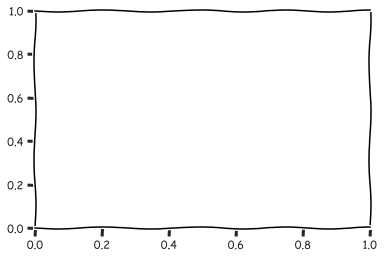

In [36]:
fig, ax = plt.subplots(figsize=(6,4))
im = ax.imshow(XdB,origin='lower',aspect='auto',extent = [times[0], times[-1], 0, fs/2/1e3],
               cmap='RdBu_r',vmin = 0, vmax =-100)
divider = make_axes_locatable(ax)
colorbar_ax = fig.add_axes([.95, 0.1, 0.015, 0.5])
fig.colorbar(im, cax=colorbar_ax)
ax.set_xlim(times[0],times[-1])
# ax.set_xlim(.2,3)
ax.set_ylim(-.1,4)
ax.set_xlabel('TIME [in s]')
ax.set_ylabel('FREQ [in kHz]')
sns.despine(offset = 0.01,trim=False)
plt.show()

In [ ]:
# fatalities per-day

data = [710000/365, 420000/365, 180000/365, 140000/365, 7665/7]
label = ['Infants', 'TB', 'Traffic\n Accident', 'Suicide', 'COVID-19']

fig = plt.subplots(figsize=[9,5])

# Example data
ax = plt.subplot(1,1,1)
ax.barh(np.arange(0,len(label)), data, hatch="\\\\",color='None',edgecolor='tab:red',height=.35)
ax.barh(np.arange(0,len(label)), data, color='None',edgecolor='gray',height=.35)
ax.set_yticks(y_pos)
ax.set_yticklabels(label)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('NUMBER OF CASUALTIES PER DAY')
ax.set_title('COMPARING VARIOUS CAUSES OF PER-DAY CASUALTIES IN INDIA')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.text(1150,4.25,'*Computed only over\n week ending 27/09',color='gray')
ax.grid(color='gray', linestyle='--', linewidth=2,alpha=.1)
fmt = 'png'
plt.savefig('/Users/neeks/Desktop/Documents/work/code/python_codes/notebookCodes/coswara/figures/'\
                  +'covid_status_india_casuality_per_day.'+fmt, dpi=300, format=fmt,transparent=False,bbox_inches='tight')
plt.show()


In [17]:
for i in range(2):
    for i in range(3):
        print('a')
    print(i)

a
a
a
2
a
a
a
2


In [23]:
import shapefile

In [24]:
 sf = shapefile.Reader("/Users/neeks/Downloads/cytracks/cy_tracks.shp")

In [50]:
for i in range(len(sf.records())):
    print(sf.record(i)[11])

NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
PAUL
PAUL
PAUL
PAUL
PAUL
PAUL
PAUL
PAUL
SUBTROP
NADINE
NADINE
NADINE
MICHAEL
MICHAEL
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
LESLIE
LESLIE
LESLIE
LESLIE
LESLIE
OLIVIA
OLIVIA
OLIVIA
OLIVIA
KEITH
KEITH
KEITH
KEITH
KEITH
KEITH
JOYCE
JOYCE
JOYCE
ISAAC
ISAAC
NORMAN
NORMAN
NORMAN
MIRIAM
MIRIAM
MIRIAM
MIRIAM
HELENE
HELENE
HELENE
HELENE
HELENE
HELENE
HELENE
HELENE
HELENE
HELENE
HELENE
HELENE
HELENE
HELENE
HELENE
GORDON
GORDON
GORDON
GORDON
GORDON
FLORENCE
FLORENCE
FLORENCE
NOT NAMED
LANE
LANE
ERNESTO
ERNESTO
KRISTY
KRISTY
KRISTY
KRISTY
KRISTY
KRISTY
KRISTY
JOHN
JOHN
JOHN
PRAPIROON
PRAPIROON
DEBBY
DEBBY
CHRIS
CHRIS
BERYL
BERYL
BERYL
ILEANA
ILEANA
HECTOR
HECTOR
HECTOR
EWINIAR
EWINIAR
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
GILMA
GILMA
GILMA
GILMA
GILMA
GILMA
GILMA
GILMA
ALBERTO
A

NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
HENRIETTE
HENRIETTE
HENRIETTE
HENRIETTE
HENRIETTE
HENRIETTE
LUIS
LUIS
KAREN
KAREN
KAREN
KAREN
KAREN
KAREN
KAREN
KAREN
KAREN
KENT
KENT
LOIS
JERRY
JERRY
JERRY
JERRY
JERRY
JERRY
JERRY
JERRY
JERRY
JERRY
IRIS
HUMBERTO
GIL
GIL
GABRIELLE
GABRIELLE
GABRIELLE
FELIX
FELIX
FELIX
FLOSSIE
FLOSSIE
FLOSSIE
FLOSSIE
FLOSSIE
FLOSSIE
FLOSSIE
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
ERICK
ERICK
ERICK
ERICK
ERICK
ERICK
ERICK
ERICK
ERICK
DEAN
DEAN
DEAN
DEAN
DEAN
DEAN
DEAN
DEAN
DALILA
DALILA
DALILA
DALILA
COSME
COSME
COSME
COSME
COSME
FAYE
FAYE
FAYE
CHANTAL
CHANTAL
CHANTAL
CHANTAL
CHANTAL
BARBARA
BARBARA
BARBARA
BARBARA
BARBARA
BARBARA
BARRY
BARRY
BARRY
ADOLPH
ADOLPH
ADOLPH
ALLISON
ALLISON
ALLISON
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAM

MARIE
MARIE
MARIE
MARIE
MARIE
ISIDORE
ISIDORE
ISIDORE
DOT:DOT(-)1
HORTENSE
HORTENSE
HORTENSE
HORTENSE
HORTENSE
HORTENSE
HORTENSE
GUSTAV
GUSTAV
ABE
ABE
BECKY
LOWELL
LOWELL
LOWELL
LOWELL
LOWELL
KENNA
KENNA
KENNA
KENNA
KENNA
JULIO
JULIO
JULIO
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
FRAN
FRAN
FRAN
FRAN
YANCY
AKA
DIANA
DIANA
EDOUARD
EDOUARD
EDOUARD
EDOUARD
EDOUARD
EDOUARD
EDOUARD
EDOUARD
EDOUARD
EDOUARD
EDOUARD
EDOUARD
EDOUARD
EDOUARD
EDOUARD
EDOUARD
EDOUARD
EDOUARD
EDOUARD
CESAR
CESAR
CESAR
CESAR
TASHA
TASHA
TASHA
TASHA
TASHA
BERTHA
BERTHA
BERTHA
ARTHUR
ARTHUR
ARTHUR
ISELLE
ISELLE
ISELLE
ISELLE
HERNAN
HERNAN
HERNAN
HERNAN
HERNAN
HERNAN
GENEVIEVE
GENEVIEVE
GENEVIEVE
FAUSTO
FAUSTO
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
ELIDA
ELIDA
ELIDA
ELIDA
PERCY
PERCY
DOUGLAS
DOUGLAS
OFELIA
OFELIA
OFELIA
CRISTINA
CRISTINA
CRISTINA
CRISTINA
BORIS
BORIS
BORIS
BORIS
ALMA
ALMA
ALMA
NOT NAME

NORRIS
NORRIS
NORRIS
NORRIS
NORRIS
NORRIS
NORRIS
NORRIS
NORRIS
NORRIS
NORRIS
NORRIS
NORRIS
NORRIS
JAVIER
JAVIER
JAVIER
JAVIER
CHARLEY
CHARLEY
BONNIE
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
ISIS
ALLEN
ALLEN
ALLEN
ALLEN
ALLEN
HOWARD
HOWARD
GEORGETTE
GEORGETTE
GEORGETTE
GEORGETTE
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
FRANK
FRANK
FRANK
FRANK
FRANK
FRANK
FRANK
FRANK
FRANK
FRANK
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
JOE
JOE
DARBY
DARBY
DARBY
DARBY
DARBY
DARBY
CELIA
CELIA
BLAS
AGATHA
AGATHA
AGATHA
AGATHA
AGATHA
AGATHA
FORREST
FORREST
FORREST
FORREST
28P:WALLY
28P:WALLY
28P:WALLY
28P:WALLY
28P:WALLY
28P:WALLY
28P:WALLY
28P:WALLY
28P:WALLY
28P:WALLY
28P:WALLY
28P:WALLY
28P:WALLY
28P:WALLY
26P:VAL
26P:VAL
26P:VAL
23P:TIA
23P:TIA
23P:TIA
23P:TIA
23P:TIA
21S:24S:DORIS-GLORIA
20P:SINA
17P:SIMON
15S:ENID
15S:ENID
14P:RUTH
14P:RUTH
14P:RUTH
13P:RAE
13P:RAE
13P:RAE
13P:RAE
13P:RAE
13P:RA

PRISCILLA
PRISCILLA
PRISCILLA
HALLIE
HALLIE
HALLIE
HALLIE
HALLIE
HALLIE
HALLIE
HALLIE
GRACE
GRACE
GRACE
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
NANETTE
NANETTE
NANETTE
NANETTE
MONICA
MONICA
MONICA
MONICA
GLADYS
GLADYS
GLADYS
GLADYS
FAYE
FAYE
FAYE
FAYE
FAYE
LILY
ELOISE
ELOISE
ELOISE
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
KATRINA
CAROLINE
CAROLINE
JEWEL
JEWEL
JEWEL
JEWEL
JEWEL
JEWEL
JEWEL
JEWEL
JEWEL
ILSA
ILSA
HILARY
HILARY
HILARY
HILARY
HILARY
GEORGETTE
GEORGETTE
GEORGETTE
GEORGETTE
GEORGETTE
GEORGETTE
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
MAMIE
MAMIE
MAMIE
MAMIE
MAMIE
MAMIE
BLANCHE
BLANCHE
BLANCHE
BLANCHE
BLANCHE
BLANCHE
ELEANOR
DENISE
DENISE
DENISE
DENISE
DENISE
DENISE
CARLOTTA
CARLOTTA
BRIDGET
BRIDGET
BRIDGET
BRIDGET
BRID

14P:RUTH
14P:RUTH
11S:DEAN
10S:CLARA
10S:CLARA
06P:PAUL
06P:PAUL
04S:DANITZA:WILF:WIL
02S:CLAUDETTE:VIOLA:
NANCY
NANCY
NANCY
NANCY
NANCY
NANCY
LOLA
LOLA
LOLA
LOLA
LOLA
ELLIS
DOT
27S:KEVIN
27S:KEVIN
26S:JANE
26S:JANE
20S:IVAN
19S:HAZEL
19S:HAZEL
13P:KERRY
13P:KERRY
16P:ROSA
16P:ROSA
16P:ROSA
16P:ROSA
06P:GORDON
05P:PETER
HESTER
FAYE
ELAINE
ELAINE
14W:TD0818
14W:TD0818
14W:TD0818
14W:TD0818
14W:TD0818
14W:TD0818
14W:TD0818
14W:TD0818
32P:HAL
31S:BRENDA
31S:BRENDA
29S:30S:ALBY
29S:30S:ALBY
29S:30S:ALBY
27S:WINNIE
23P:GWEN
23P:GWEN
16S:VERN
06S:CELIMENE:SAM:SAM
NOT NAMED
AMY
AMY
AMY
AMY
RUTH
25S:VERNA
25S:VERNA
19S:KAREN
19S:KAREN
19S:KAREN
14S:IO:JACK:JACK/IO
14S:IO:JACK:JACK/IO
18P:NANCY
18P:NANCY
16P:MILES
12P:KEITH
12P:KEITH
12P:KEITH
06S:IRENE
03S:HARRY
03S:HARRY
MARGE
DOT
DOT
DOT
DOT
ANITA
ANITA
ANITA
THERESE
OLGA
OLGA
OLGA
OLGA
OLGA
27S:CAROL
26P:WATOREA
LINDA
LINDA
18S:ALICE
16S:WALLY
16S:WALLY
16S:WALLY
16S:WALLY
13P:ALAN
13P:ALAN
13P:ALAN
13P:ALAN
11S:VANESSA
11S:VANESSA
11S:VANE

MARGE
MARGE
MARGE
MARGE
LEX
IDA
IDA
GEORGIA
FORREST
DOM
DOM
DOM
DOM
DOM
DOM
DOM
DOM
DOM
DOM
DOM
DOM
DOM
TD0902
VERA
VERA
VERA
VERA
TIP
TIP
TIP
GEORGETTE
ROGER
ROGER
ROGER
ROGER
ROGER
ROGER
OWEN
OWEN
LOLA
LOLA
LOLA
KEN
HECTOR
HECTOR
HECTOR
GORDON
GORDON
FAY:FAYE
FAY:FAYE
FAY:FAYE
FAY:FAYE
ELLIS
ELLIS
ELLIS
ELLIS
ELLIS
ELLIS
ELLIS
ELLIS
ELLIS
ELLIS
ELLIS
ELLIS
ELLIS
ELLIS
ELLIS
CECIL
CECIL
ANDY
ANDY
ANDY
ANDY
ANDY
ANDY
ANDY
ANDY
ANDY
ANDY
ANDY
ANDY
ANDY
ANDY
ANDY
ANDY
ANDY
ANDY
ANDY
ANDY
VAL
PAT
ODESSA
ODESSA
KIT
KIT
GRETEL
GRETEL
GRETEL
GRETEL
MARGOT
MARGOT
LINDSAY
HUBERT
WARREN
THAD
SUSAN
SUSAN
SUSAN
ROY
ROY
ROY
PHYLLIS
PHYLLIS
PHYLLIS
MAURY
MAURY
FREDA
FREDA
FREDA
CARY
BETTY
BETTY
BETTY
ALEX:ALEX(-)1
KATHY
DARYL
FERDINAND
CHLOE
INGRID
ANNETTE:ANNETTE/JAMI
ANNETTE:ANNETTE/JAMI
WILLY
GRACE
GRACE
GRACE
ESTHER
ESTHER
ESTHER
ESTHER
THELMA
SPERRY
SPERRY
SPERRY
SPERRY
SPERRY
SPERRY
RUTH:TD1121
RUTH:TD1121
RUTH:TD1121
RUTH:TD1121
RUTH:TD1121
RUTH:TD1121
RUTH:TD1121
RUTH:TD1121
RUTH:TD1121
RUT

LOLA
LOLA
KEN
GORDON
FAYE
FAYE
FAYE
FAYE
FAYE
FAYE
FAYE
FAYE
FAYE
FAYE
FAYE
FAYE
FAYE
CECIL
CECIL
ANDY:ANDY(-)1
WINONA
TESS:TESS/VAL:VAL
NELSON
NELSON
NELSON
NELSON
IAN
HARRIET
ELECTRE
GRAHAM
ABIGAIL
BRUNO:HSK1482
BRUNO:HSK1482
BRUNO:HSK1482
DAPHNE-FIFI:DAPHNE/F
DAPHNE-FIFI:DAPHNE/F
LEE
LEE
LEE
LEE
BENEDICTE
AMELIA
CLARA
CLARA
CLARA
CLARA
CLARA
CLARA
CLARA
CLARA
CLARA
BILL
SUSAN
SUSAN
OGDEN
OGDEN
KELLY
KELLY
JUNE
JUNE
IKE
IKE
IKE
IKE
GERALD:GERALD(-)1
GERALD:GERALD(-)1
GERALD:GERALD(-)1
OLGA
OLGA
NEIL
MABEL
06S:FELIX
EDNA
DAN
04S:CAROL
BELLY:BETTY
BELLY:BETTY
ALEX
ALEX
ALEX
ALEX
VERNON
SPERRY
SPERRY
LEX
LEX
LEX
DOM
DOM
DOM
DOM
21S:24S:DORIS-GLORIA
21S:24S:DORIS-GLORIA
21S:24S:DORIS-GLORIA
21S:24S:DORIS-GLORIA
17P:SIMON
15S:ENID
14P:RUTH
14P:RUTH
11S:DEAN
11S:DEAN
10S:CLARA
10S:CLARA
10S:CLARA
07S:AMY
06P:PAUL
06P:PAUL
02S:CLAUDETTE:VIOLA:
VERA:VERA(-)1
KEN
KEN
KEN
KEN
KEN
KEN
KEN
05W:TD0521
05W:TD0521
05W:TD0521
27S:KEVIN
26S:JANE
25S:IDYLLE
25S:IDYLLE
20S:IVAN
20S:IVAN
19S:HAZEL
13P:K

ANN
ANN
ANN
TD0228
TD0228
TD0228
TD0228
TD0228
TD0228
TD0228
TD0228
JACOB
JACOB
JACOB
JACOB
JACOB
JACOB
JACOB
ANGELA
ANGELA
ANGELA
ANGELA
WARD
SIBYL
NINA
NINA
NINA
KENT
LOIS
JANIS
JANIS
JANIS
HELEN
DEANNA
CHUCK
CHUCK
CHUCK
CHUCK
CHUCK
CHUCK
CHUCK
AXEL
AXEL
AXEL
AXEL
AXEL
AXEL
WILDA
VERNE
VERNE
VERNE
VERNE
VERNE
VERNE
VERNE
VERNE
VERNE
VERNE
VERNE
VERNE
VERNE
LUKE
LUKE
JOEL
JOEL
JOEL
JOEL
FRED
FRED
FRED
FRED
FRED
CAITLIN
CAITLIN
CAITLIN
BRENDAN
YUNYA
YUNYA
WALT
WALT
SHARON
SHARON
SHARON
SHARON
SHARON
SHARON
SHARON
SHARON
SHARON
SHARON
SHARON
SHARON
SHARON
SHARON
SHARON
SHARON
PAGE
PAGE
NADIA
GERALDA
GERALDA
NELL
NELL
IRA
HATTIE
HATTIE
HATTIE
HATTIE
HATTIE
HATTIE
HATTIE
HATTIE
HATTIE
GENE
GENE
DOT
ABE
WINONA
WINONA
WINONA
WINONA
WINONA
WINONA
WINONA
WINONA
TASHA
KEONI
ROBYN
ROBYN
OFELIA
OFELIA
OFELIA
KORYN
KORYN
KORYN
KORYN
KORYN
KORYN
IONIA
IONIA
IONIA
IONIA
IONIA
IONIA
IONIA
IONIA
IONIA
IONIA
HUNT
HUNT
HUNT
HUNT
HUNT
HUNT
GAY
GAY
GAY
BRIAN
BRIAN
BRIAN
TED
TED
OMAR
OMAR
OMAR
OMAR
OMAR
O

35S:36S:MARCELLE
35S:36S:MARCELLE
30S:NELLIE
30S:NELLIE
30S:NELLIE
27P:MADGE
27P:MADGE
25P:28S:LEAH:LEAH (R
25P:28S:LEAH:LEAH (R
25P:28S:LEAH:LEAH (R
25P:28S:LEAH:LEAH (R
25P:28S:LEAH:LEAH (R
25P:28S:LEAH:LEAH (R
25P:28S:LEAH:LEAH (R
25P:28S:LEAH:LEAH (R
25P:28S:LEAH:LEAH (R
25P:28S:LEAH:LEAH (R
25P:28S:LEAH:LEAH (R
25P:28S:LEAH:LEAH (R
23P:KIRSTY
23P:KIRSTY
18S:MAUD
18S:MAUD
13S:KERRY
09S:JEAN
VIOLET
VIOLET
VIOLET
VIOLET
THERESE
THERESE
17B:SALLY
PAMELA
PAMELA
PAMELA
PAMELA
OLGA
LORNA
LORNA
IDA
GRACE
GRACE
HELEN
HELEN
HELEN
HELEN
HELEN
HELEN
HELEN
FLOSSIE
FLOSSIE
FLOSSIE
FLOSSIE
FLOSSIE
FLOSSIE
FLOSSIE
FLOSSIE
FLOSSIE
FLOSSIE
FLOSSIE
FLOSSIE
FLOSSIE
FLOSSIE
FLOSSIE
FLOSSIE
FLOSSIE
FLOSSIE
FLOSSIE
FLOSSIE
FLOSSIE
FLOSSIE
ELSIE
CORA
CORA
BETTY
ALICE
ALICE
ALICE
ALICE
ALICE
ALICE
VIOLA
VIOLA
VIOLA
VIOLA
VIOLA
VIOLA
SUSAN
SUSAN
SUSAN
SUSAN
SUSAN
SUSAN
SUSAN
SUSAN
RITA
PHYLLIS
PHYLLIS
PHYLLIS
PHYLLIS
ORA
MAMIE:NINA
MAMIE:NINA
MAMIE:NINA
MAMIE:NINA
MAMIE:NINA
MAMIE:NINA
MAMIE:NINA
LOLA
LOLA

KIKO
KIKO
KIKO
FIFTEEN
LINGLING
LINGLING
LINGLING
LINGLING
LINGLING
LINGLING
LINGLING
INVEST
PODUL
PODUL
KROSA
KROSA
KROSA
KROSA
KROSA
KROSA
KROSA
KROSA
KROSA
KROSA
KROSA
KROSA
KROSA
KROSA
HAIYAN
HAIYAN
JULIETTE
JULIETTE
JULIETTE
JULIETTE
LEKIMA
LEKIMA
LEKIMA
MELISSA
MELISSA
MELISSA
MELISSA
KAREN
KAREN
KAREN
KAREN
KAREN
KAREN
JERRY
JERRY
JERRY
JERRY
JERRY
FRANCISCO
FRANCISCO
FRANCISCO
FRANCISCO
FRANCISCO
FRANCISCO
FRANCISCO
IVO
WIPHA
WIPHA
WIPHA
HUMBERTO
HUMBERTO
INGRID
INGRID
INGRID
INGRID
INGRID
INGRID
INGRID
INGRID
NARI
NARI
NARI
NARI
GABRIELLE
GABRIELLE
DANAS
DANAS
DANAS
FELIX
HENRIETTE
GIL
GIL
GIL
GIL
GIL
FITOW
FITOW
FITOW
ERIN
ERIN
ERIN
ERIN
DEAN
SEPAT
SEPAT
SEPAT
SEPAT
SEPAT
FLOSSIE
FLOSSIE
WUTIP
WUTIP
WUTIP
WUTIP
WUTIP
WUTIP
WUTIP
PABUK
PABUK
PABUK
ERICK
ERICK
ERICK
ERICK
CHANTAL
NONAME
USAGI
USAGI
USAGI
USAGI
USAGI
USAGI
USAGI
USAGI
USAGI
USAGI
USAGI
USAGI
DALILA
DALILA
DALILA
COSME
COSME
COSME
COSME
COSME
MAN-YI
MAN-YI
TORAJI
TORAJI
TORAJI
TORAJI
TORAJI
TORAJI
TORAJI
TORAJI
T

ANA
ANA
ANA
ANA
FILI
KUJIRA
KUJIRA
KUJIRA
KUJIRA
KUJIRA
INIGO
INIGO
INIGO
INIGO
INIGO
INIGO
INIGO
INIGO
INIGO
INIGO
INIGO
INIGO
ESETA
CRAIG
CRAIG
CRAIG
CRAIG
CRAIG
CRAIG
CRAIG
CRAIG
CRAIG
CRAIG
CRAIG
CRAIG
CRAIG
CRAIG
CRAIG
CRAIG
KALUNDE
HARRIET
HARRIET
HARRIET
HARRIET
ERICA
ERICA
ERICA
ERICA
GRAHAM
JAPHET
JAPHET
ISHA
ISHA
ISHA
ISHA
HAPE
HAPE
HAPE
HAPE
GERRY
GERRY
GERRY
GERRY
GERRY
GERRY
GERRY
DOVI
DOVI
DOVI
FIONA
FIONA
CILLA
CILLA
CILLA
CILLA
CILLA
CILLA
CILLA
CILLA
CILLA
CILLA
CILLA
FARI
FARI
FARI
FARI
FARI
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
BENI
BENI
YANYAN
YANYAN
YANYAN
YANYAN
YANYAN
YANYAN
YANYAN
YANYAN
YANYAN
YANYAN
YANYAN
AMI
AMI
AMI
EBULA
EBULA
NOT NAMED
NOT NAMED
NOT NAMED
DELFINA
DELFINA
DELFINA
DELFINA
DELFINA
DELFINA
DELFINA
ZOE
CRYSTAL
CRYSTAL
CRYSTAL
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
YOLANDE
YOLANDE
YOLANDE
YOLANDE
PONGSONA
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED

LES
LES
LES
LES
LES
LES
LES
LES
LES
LES
LES
LES
LES
LES
LES
LES
LES
LES
LES
LES
LES
LES
LES
LES
LES
LES
LES
LES
SELWYN
SELWYN
SID
SID
SID
SID
SID
SID
SID
SID
SID
SID
SID
SID
SID
SID
PAM
PAM
PAM
PAKA:PAKA -
PAKA:PAKA -
PAKA:PAKA -
PAKA:PAKA -
PAKA:PAKA -
PAKA:PAKA -
PAKA:PAKA -
OSEA
OSEA
NUTE
MORT
MORT
MORT
RICK
MARTIN
MARTIN
MARTIN
LINDA
LINDA
LINDA
LINDA
LINDA
LINDA
LINDA
LINDA
LINDA
LINDA
LINDA
LINDA
LINDA
LINDA
LINDA
LINDA
LINDA
LINDA
LINDA
LINDA
LINDA
LINDA
LINDA
LINDA
LINDA
LINDA
LINDA
LINDA
LINDA
LINDA
LINDA
LINDA
LINDA
LINDA
LINDA
LINDA
LINDA
LINDA
LINDA
LINDA
LINDA
GRACE
GRACE
GRACE
GRACE
GRACE
GRACE
GRACE
JOAN
JOAN
IVAN
IVAN
IVAN
IVAN
IVAN
IVAN
LUSI
LUSI
LUSI
PAULINE
FABIAN
FABIAN
FABIAN
FABIAN
FABIAN
FABIAN
FABIAN
FABIAN
FABIAN
FABIAN
FABIAN
FABIAN
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
GINGER
FRITZ
FRITZ
FRITZ
FRITZ
FRITZ
NORA
MARTY
MARTY
MARTY
DAVID
LINDA
LINDA
LINDA
LINDA
KEVIN
KEVIN
ERIKA
ERIKA
OLIWA
OLIWA
OLIWA

KAREN
KAREN
KAREN
KAREN
KAREN
IRMA
HUNT
HUNT
PEDRO
PEDRO
GAY
FORREST
FORREST
FORREST
FORREST
FORREST
FORREST
ELSIE
ELSIE
JERRY
JERRY
DAN
COLLEEN:COLLEN
BRIAN
BRIAN
BRIAN
ANGELA
ANGELA
ANGELA
RAYMOND
RAYMOND
RAYMOND
RAYMOND
PRISCILLA
PRISCILLA
IRIS
IRIS
IRIS
IRIS
WAYNE
WAYNE
VERA
VERA
VERA
VERA
VERA
VERA
VERA
HUGO
HUGO
HUGO
HUGO
HUGO
HUGO
HUGO
HUGO
HUGO
OCTAVE
OCTAVE
OCTAVE
TIP
TIP
SARAH:SARAH(-)1
SARAH:SARAH(-)1
SARAH:SARAH(-)1
SARAH:SARAH(-)1
SARAH:SARAH(-)1
SARAH:SARAH(-)1
NARDA
NARDA
NARDA
NARDA
NARDA
NARDA
GABRIELLE
GABRIELLE
GABRIELLE
GABRIELLE
GABRIELLE
MANUEL
MANUEL
MANUEL
MANUEL
MANUEL
LORENA
LORENA
LORENA
FELIX
FELIX
FELIX
FELIX
FELIX
FELIX
FELIX
FELIX
FELIX
KIKO
TS0826
TS0826
TS0826
TS0826
ROGER
ROGER
JULIETTE
JULIETTE
ERIN
ERIN
PEGGY
PEGGY
PEGGY
PEGGY
PEGGY
PEGGY
PEGGY
HENRIETTE
HENRIETTE
ISMAEL
ISMAEL
OWEN
OWEN
OWEN
OWEN
OWEN
OWEN
OWEN
DEAN
CHANTAL
CHANTAL
MAC
GIL
KEN:KEN-LOLA:KEN/LOL
FLOSSIE
FLOSSIE
FLOSSIE
FLOSSIE
FLOSSIE
FLOSSIE
JUDY
IRVING
IRVING
IRVING
IRVING
IRVING
ER

HANA
HANA
HANA
HANA
HANA
HANA
LOLA
LOLA
KEN
KEN
KEN
KEN
KEN
KEN
KEN
KEN
KEN
KEN
DEBBY
NORMAN
NORMAN
NORMAN
CHRIS
JUDY
IRVING
IRVING
AKONI
AKONI
AKONI
AKONI
AKONI
MIRIAM
MIRIAM
BERYL
BERYL
BERYL
GORDON
FAYE
FAYE
FAYE
FAYE
ELLIS
ELLIS
ELLIS
LANE
KRISTY
KRISTY
DOT
DOT
DOT
CECIL
JOHN
JOHN
JOHN
JOHN
IVA
IVA
IVA
IVA
HECTOR
HECTOR
HECTOR
HECTOR
GILMA
GILMA
GILMA
GILMA
GILMA
BESS
BESS
BESS
BESS
ANDY:ANDY(-)1
ANDY:ANDY(-)1
FABIO
FABIO
EMILIA
EMILIA
EMILIA
EMILIA
WINONA
WINONA
DANIEL
DANIEL
DANIEL
DANIEL
DANIEL
DANIEL
DANIEL
DANIEL
DANIEL
DANIEL
DANIEL
DANIEL
DANIEL
CARLOTTA
CARLOTTA
CARLOTTA
CARLOTTA
CARLOTTA
SKIP
TESS:TESS/VAL:VAL
TESS:TESS/VAL:VAL
RUBY
RUBY
RUBY
RUBY
ALETTA
ALETTA
ALETTA
ALETTA
ALETTA
ALETTA
ALETTA
PAT
CLAUDIA
CLAUDIA
DOMINIC
BERNIE
ODESSA
ODESSA
ODESSA
ODESSA
NELSON
NELSON
MAMIE:MIMIE
ISAAC
IAN
HARRIET
GRAHAM
GRAHAM
HETTIE
HETTIE
ABIGAIL
ABIGAIL
BRUNO:HSK1482
BRUNO:HSK1482
DAPHNE-FIFI:DAPHNE/F
DAPHNE-FIFI:DAPHNE/F
DAPHNE-FIFI:DAPHNE/F
DAPHNE-FIFI:DAPHNE/F
DAPHNE-FIFI:DAPHNE/

JEWEL
ILSA
ILSA
ILSA
ILSA
ILSA
HILARY
GEORGETTE
GEORGETTE
GEORGETTE
(NAMELESS)(-)1:RITA:
(NAMELESS)(-)1:RITA:
NINA
NINA
FRANCENE
MAMIE
MAMIE
BLANCHE
BLANCHE
ELEANOR
ELEANOR
ELEANOR
ELEANOR
ELEANOR
ELEANOR
ELEANOR
DENISE
DENISE
CARLOTTA
CARLOTTA
CARLOTTA
BRIDGET
AMY
AGATHA
DENISE
32S:CLARA
32S:CLARA
32S:CLARA
CLARA
CLARA
28S:BEVERLEY
28S:BEVERLEY
28S:BEVERLEY
28S:BEVERLEY
27S:VIDA
25S:WILMA
25S:WILMA
25S:WILMA
25S:WILMA
25S:WILMA
SHIRLEY
SHIRLEY
SHIRLEY
14S:DEBORAH:ROBYN:RO
03S:SELMA
03S:SELMA
03S:SELMA
03S:SELMA
03S:SELMA
03S:SELMA
03S:SELMA
03S:SELMA
03S:SELMA
03S:SELMA
IRMA
IRMA
PENNY
PENNY
NORAH
NORAH
NORAH
NORAH
NORAH
ROSALIE
ROSALIE
ROSALIE
ROSALIE
MARCIA
MARCIA
PATRICIA
SUBTROP:SUBTROP 4
SUBTROP:SUBTROP 4
GERTRUDE
GERTRUDE
GERTRUDE
GERTRUDE
GERTRUDE
WENDY
FIFI
FIFI
FIFI
FIFI
ELAINE
TRIX
SHIRLEY
SHIRLEY
SHIRLEY
SHIRLEY
SHIRLEY
SHIRLEY
SHIRLEY
SHIRLEY
SHIRLEY
SHIRLEY
CARMEN
BECKY
MAGGIE
ROSE
ROSE
ROSE
ROSE
ROSE
ROSE
LORRAINE
LORRAINE
LORRAINE
LORRAINE
LORRAINE
LORRAINE
KIRSTEN
KIRS

ALEXANDRA
ALEXANDRA
ALEXANDRA
ALEXANDRA
ALEXANDRA
ALEXANDRA
A49192:HSK0491
A49192:HSK0491
A49192:HSK0491
VERNE
VERNE
VERNE
THELMA
THELMA
RUTH
RUTH
RUTH
RUTH
RUTH
RUTH
RUTH
RUTH
PAT
MIREILLE
MIREILLE
MIREILLE
MIREILLE
TD0827
GLADYS
AMY
AMY
ZEKE
ZEKE
ZEKE
ZEKE
ZEKE
ZEKE
GRITELLE
GRITELLE
GRITELLE
LISA
MARIAN
ERROL
ERROL
DEBRA
DEBRA
DEBRA
DEBRA
DEBRA
DEBRA
DEBRA
DEBRA
DAPHNE
DAPHNE
DAPHNE
DAPHNE
DAPHNE
DAPHNE
BELLA
BELLA
BELLA
BELLA
BELLA
BELLA
OWEN
OWEN
OWEN
OWEN
OWEN
MIKE
MIKE
LOLA
LOLA
LOLA
KYLE
IRA
IRA
DOT:DOT(-)1
DOT:DOT(-)1
ABE
ABE
YANCY
WINONA
WINONA
WINONA
WINONA
ROBYN
ROBYN
ROBYN
ROBYN
MARIAN
MARIAN
IKONJO
IKONJO
IKONJO
IKONJO
IKONJO
IKONJO
IKONJO
IKONJO
IKONJO
IKONJO
IKONJO
IKONJO
IKONJO
IKONJO
IKONJO
IKONJO
IKONJO
IKONJO
IKONJO
HANTA
HANTA
HANTA
HANTA
HANTA
IVOR
FELANA
FELANA
FELANA
FELANA
FELANA
FELANA
FELANA
FELANA
FELANA
FELANA
FELANA
FELANA
FELANA
FELANA
FELANA
FELANA
FELANA
FELANA
FELANA
HILDA
GREGOARA:WALTER
GREGOARA:WALTER
GREGOARA:WALTER
GREGOARA:WALTER
GREG
GREG
EDISOA

FAVIO
ENOK
DORA
DURIAN
DURIAN
BEBINCA
BEBINCA
BEBINCA
SONAMU
SONAMU
SONAMU
WUKONG
WUKONG
SAOMAI
SAOMAI
KAEMI
BILIS
BILIS
BILIS
BILIS
CARINA
BOLOETSE
ALVIN:BERTIE
BOLAVEN
BOLAVEN
VICENTE
NABI
GUCHOL
SANVN:SANVU
MATSA
MATSA
MATSA
MATSA
MATSA
MATSA
MATSA
MATSA
MATSA
MATSA
MATSA
MATSA
BANYAN
SONCA
NOT NAMED
ISANG
ISANG
ISANG
DAREN
CHAMBO
NORU
NORU
TALAS
TALAS
TALAS
TALAS
TALAS
TALAS
AROLA
AROLA
AROLA
MEARI
MEARI
HAIMA
HAIMA
HAIMA
HAIMA
HAIMA
HAIMA
CHABA
CHABA
CHABA
CHABA
RANANIM
RANANIM
RANANIM
MALOU
MALOU
MALOU
KOMPASU
MINDULE:MINDULLE
MINDULE:MINDULLE
MINDULE:MINDULLE
MINDULE:MINDULLE
MINDULE:MINDULLE
MINDULE:MINDULLE
NIDA
JUBA
SUDAL
SUDAL
GAFILO
ELITA
ELITA
ELITA
ELITA
ELITA
ELITA
ELITA
ELITA
ELITA
ELITA
ELITA
ELITA
NEPARTAK
BENI
BENI
BENI
MELOR
PARMA
PARMA
CHOI-WAN
MAEMI
VAMCO
VAMCO
MORAKOT
IMBUDO:LMBUDO
IMBUDO:LMBUDO
IMBUDO:LMBUDO
IMBUDO:LMBUDO
IMBUDO:LMBUDO
IMBUDO:LMBUDO
EPI
NANGKA
NANGKA
NANGKA
NANGKA
MANOU
JAPHET
GERRY
EBULA
EBULA
DELFINA
DELFINA
DELFINA
HAGUPIT
HAGUPIT
ELE
ELE
PHA

JEAN
JEAN
JEAN
JEAN
JEAN
JEAN
JEAN
JEAN
JEAN
JEAN
JEAN
JEAN
JEAN
JEAN
JEAN
JEAN
JEAN
JEAN
JEAN
JEAN
JEAN
JEAN
JEAN
JEAN
JEAN
JEAN
HARRIET
HARRIET
GILDA
GILDA
GILDA
GILDA
GILDA
GILDA
GILDA
GILDA
EMMA
EMMA
EMMA
EMMA
EMMA
EMMA
DINAH
DINAH
DINAH
DINAH
BABE
BABE
30P:31S:JENNY:JENNY
29S:JESSIE
AMY
AMY
AMY
AMY
AMY
AMY
AMY
AMY
AMY
AMY
AMY
AMY
AMY
28S:ISOBEL
27P:ZOE
WANDA
WANDA
WANDA
WANDA
WANDA
WANDA
14S:FIONA-GWENDA:FIO
11S:DALIDA:DEIDRE:DE
10P:UNA
10P:UNA
10P:UNA
10P:UNA
10P:UNA
10P:UNA
10P:UNA
10P:UNA
CECILY
ANNIE
ANNIE
ANNIE
ANNIE
VERA
VERA
VERA
VERA
VERA
06S:INES
06S:INES
06S:INES
06S:INES
06S:INES
06S:INES
RUTH
RUTH
PATSY
PATSY
PATSY
PATSY
PATSY
PATSY
OPAL
NORA
MARGE
MARGE
LOUISE
KATE
KATE
KATE
KATE
KATE
KATE
JOAN:JOAN(1):JOAN(2)
IRIS
IRIS
IRIS
IRIS
GEORGIA
GEORGIA
GEORGIA
GEORGIA
GEORGIA
GEORGIA
FRAN
ELLEN
ELLEN
ELLEN
ELLEN
ELLEN
ELLEN
ELLEN
ELLEN
ELLEN
ELLEN
ELLEN
ELLEN
ELLEN
DOT
DOT
BILLIE
ANITA
WILDA
WILDA
WILDA
35S:36S:MARCELLE
35S:36S:MARCELLE
30S:NELLIE
27P:MADGE
27P:MADGE
27P:MAD

HOPE
HOPE
HOPE
HOPE
HOPE
HOPE
ELLEN
SALLY
RUBY:RUBY(1):RUBY(2)
OLGA
OLGA
OLGA
OLGA
OLGA
OLGA
OLGA
OLGA
17P:FLORENCE
17P:FLORENCE
17P:FLORENCE
17P:FLORENCE
16P:DAWN
16P:DAWN
16P:DAWN
15S:HSK1770:JUDY
05P:ADA
MUIFA
MUIFA
MUIFA
MUIFA
MUIFA
NAMTHEUN
NIDA
MELOR
MELOR
PARMA
CHOI-WAN
ETAU
SOUDELOR
SOUDELOR
SOUDELOR
SOUDELOR
SOUDELOR
SOUDELOR
SOUDELOR
SOUDELOR
HIGOS
HIGOS
HIGOS
HIGOS
HIGOS
HIGOS
HIGOS
HIGOS
HIGOS
MEKKHALA:MEKKHLA
HAGUPIT
SINLAKU
SINLAKU
SINLAKU
SINLAKU
FRANCISCO
WIPHA
SEPAT
SEPAT
WUTIP
WUTIP
MAN-YI
MAN-YI
TORAJI
TORAJI
BEBINCA
BEBINCA
BOPHA
BOPHA
BOPHA
BOPHA
BOPHA
BOPHA
BOPHA
KAEMI
BOLAVEN
VICENTE
GUCHOL
SANVN:SANVU
SANVN:SANVU
SANVN:SANVU
SANVN:SANVU
SANVN:SANVU
MATSA
MATSA
MATSA
MATSA
BANYAN
NORU
NOCK-TEN
TOKAGE
MA-ON
MA-ON
MA-ON
HAIMA
HAIMA
RANANIM
RANANIM
RANANIM
RANANIM
TINGTING
TINGTING
TINGTING
TINGTING
TINGTING
TINGTING
TINGTING
TINGTING
TINGTING
TINGTING
TINGTING
TINGTING
TINGTING
TINGTING
TINGTING
MINDULE:MINDULLE
DIANMU
DIANMU
DIANMU
DIANMU
DIANMU
SUDAL
SUDAL
PARMA


ANTHONY
WILMA
ZELIA
ZELIA
VANIA
VANIA
VINCE
VINCE
VINCE
TASHA
TASHA
TASHA
TASHA
TASHA
ABELE
ABELE
JAL
JAL
JAL
ANGGREK
ANGGREK
ANGGREK
ANGGREK
SHARY
INVEST:TOMAS
INVEST:TOMAS
INVEST:TOMAS
INVEST:TOMAS
INVEST:TOMAS
INVEST:TOMAS
RICHARD
RICHARD
RICHARD
RICHARD
GIRI
MEGI
MEGI
PAULA
OTTO
OTTO
OTTO
NICOLE
NICOLE
NICOLE
NICOLE
NICOLE
NICOLE
NICOLE
NICOLE
NICOLE
NICOLE
NICOLE
NICOLE
NICOLE
NICOLE
NICOLE
NICOLE
NICOLE
NICOLE
NICOLE
NICOLE
NICOLE
NICOLE
NICOLE
NICOLE
NICOLE
NICOLE
NICOLE
NICOLE
NICOLE
NICOLE
MATTHEW
MALAKAS
LISA
LISA
LISA
LISA
LISA
FANAPI
FANAPI
KARL
KARL
KARL
JULIA
JULIA
JULIA
JULIA
JULIA
JULIA
JULIA
IGOR
IGOR
IGOR
IGOR
MERANTI
MERANTI
ELEVEN:HERMINE
ELEVEN:HERMINE
MALOU
MALOU
MALOU
MALOU
MALOU
FIONA
FIONA
FIONA
LIONROCK
LIONROCK
EARL
EARL
EARL
EARL
EARL
EARL
EARL
EARL
MINDULLE
MINDULLE
MINDULLE
FRANK
DANIELLE
DANIELLE
DANIELLE
DANIELLE
DANIELLE
DIANMU
DIANMU
DIANMU
DIANMU
DIANMU
DIANMU
DIANMU
DIANMU
DIANMU
DIANMU
ESTELLE
ESTELLE
COLIN
COLIN
COLIN
COLIN
COLIN
COLIN
COLIN
COLIN


KROVANH
GUILLERMO
GUILLERMO
GUILLERMO
ETAU
ETAU
ETAU
ETAU
ETAU
ETAU
ETAU
ETAU
MORAKOT
MORAKOT
FELICIA
FELICIA
FELICIA
FELICIA
DANNY
KONI
KONI
KONI
KONI
KONI
IMBUDO:LMBUDO
IMBUDO:LMBUDO
IMBUDO:LMBUDO
ENRIQUE
CLAUDETTE
CLAUDETTE
CLAUDETTE
CLAUDETTE
BILL
BLANCA
SOUDELOR
SOUDELOR
SOUDELOR
SOUDELOR
SOUDELOR
SOUDELOR
SOUDELOR
SOUDELOR
SOUDELOR
SOUDELOR
SOUDELOR
SOUDELOR
SOUDELOR
SOUDELOR
SOUDELOR
SOUDELOR
NANGKA
NANGKA
NANGKA
NANGKA
LINFA
LINFA
LINFA
LINFA
LINFA
LINFA
LINFA
ANDRES
ANDRES
CHAN-HOM
CHAN-HOM
MANOU
MANOU
MANOU
ANA
ANA
ANA
ANA
ANA
ANA
ANA
ANA
KUJIRA
KUJIRA
INIGO
ESETA
CRAIG
CRAIG
CRAIG
CRAIG
CRAIG
CRAIG
CRAIG
CRAIG
CRAIG
CRAIG
CRAIG
CRAIG
CRAIG
CRAIG
CRAIG
KALUNDE
KALUNDE
KALUNDE
KALUNDE
KALUNDE
HARRIET
HARRIET
HARRIET
HARRIET
HARRIET
HARRIET
HARRIET
HARRIET
HARRIET
HARRIET
ERICA
ERICA
ERICA
ERICA
ERICA
ERICA
GRAHAM
GRAHAM
JAPHET
JAPHET
HAPE
HAPE
GERRY
GERRY
GERRY
GERRY
DOVI
DOVI
FIONA
CILLA
FARI
FARI
FARI
FARI
FARI
BENI
BENI
BENI
BENI
BENI
BENI
BENI
BENI
BENI
AMI
EBULA
EBULA
NOT

WILLIAM
WILLIAM
WILLIAM
CHRISTELLE
CHRISTELLE
BOBBIE
BOBBIE
BOBBIE
BOBBIE
AXEL
AXEL
AXEL
ANNETTE
ALBERTINE
ALBERTINE
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
VANIA
VANIA
VANIA
GORDON
GORDON
GORDON
GORDON
GORDON
GORDON
GORDON
GORDON
GORDON
GORDON
GORDON
GORDON
GORDON
FLORENCE
ZELDA
YURI
YURI
YURI
WILDA
WILDA
TERESA
VERNE
VERNE
VERNE
VERNE
SETH
SETH
PAUL
PAUL
PAUL
OLIVIA
OLIVIA
PAT:RUTH
PAT:RUTH
PAT:RUTH
PAT:RUTH
PAT:RUTH
ERNESTO
PAT
PAT
PAT
ORCHID
ORCHID
ORCHID
MIRIAM
MIRIAM
NAT
NAT
NAT
NAT
NAT
NAT
NAT
NAT
NAT
NAT
MELISSA
MELISSA
MELISSA
MELISSA
LUKE
LUKE
LUKE
LUKE
LUKE
LUKE
LUKE
LUKE
LUKE
KINNA
KINNA
LANE
JOEL
JOEL
JOEL
JOEL
JOEL
JOEL
JOEL
JOEL
JOEL
JOEL
JOEL
JOEL
JOEL
JOEL
JOEL
JOEL
JOEL
JOEL
JOEL
JOEL
JOEL
JOEL
KRISTY
KRISTY
IVY
IVY
HARRY
HARRY
GLADYS
GLADYS
GLADYS
GLADYS
GLADYS
CHRIS
CHRIS
CHRIS
CHRIS
CHRIS
FRED
JOHN
JOHN
JOHN
JOHN
JOHN
JOHN
JOHN
JOHN
JOHN
JOHN
JOHN
JOHN
JOHN
JOHN
JOHN
JOHN
JOHN
JOHN
JOHN
JOHN
ILEANA
HECTOR
HECTOR
ELLIE
ELLIE
ELLIE
ELLIE
DOUG:DOUS
DOUG:DOUS

OWEN
OWEN
OWEN
OWEN
OWEN
CELIA
BONNIE
ANDREW
ANDREW
AGATHA
AGATHA
MAC
MAC
MAC
MAC
MAC
MAC
MAC
MAC
MAC
MAC
MAC
MAC
NAMU
NAMU
LOLA
LOLA
LOLA
BILLY-LILA:BILLY/LIL
KEN
KEN
KEN
KEN
MARTIN
MARTIN
MARTIN
LUSI
LUSI
LUSI
LUSI
LUSI
LUSI
LUSI
LUSI
LUSI
ALFRED
ALFRED
ALFRED
ALFRED
VICTOR
VICTOR
VICTOR
RHONDA
KELI
KELI
KELI
KELI
KELI
KELI
KELI
KELI
KELI
IMA
IMA
JUNE
JUNE
JUNE
JUNE
JUDY
JUDY
JUDY
JUDY
JUDY
WINIFRED
VERNON
VERNON
GORDON
GORDON
GORDON
GORDON
GORDON
GORDON
GORDON
GORDON
GORDON
GORDON
GORDON
GORDON
GORDON
GORDON
KATE
JUAN
JUAN
NELE
NELE
FAY:FAYE
FAY:FAYE
FAY:FAYE
FAY:FAYE
FAY:FAYE
FAY:FAYE
FAY:FAYE
FAY:FAYE
FAY:FAYE
FAY:FAYE
FAY:FAYE
FAY:FAYE
FAY:FAYE
FAY:FAYE
FAY:FAYE
FAY:FAYE
FAY:FAYE
ELLIS
ELLIS
ELLIS
ELLIS
CECIL
CECIL
ISABEL
ISABEL
ISABEL
ISABEL
BRENDA:BRENDAN
BRENDA:BRENDAN
ANDY
ANDY
ANDY
ANDY
HENRI
WINONA
WINONA
WINONA
WINONA
GLORIA
FABIAN
TERRY
TERRY
VAL
VAL
SANDRA
RICK
RICK
RICK
TESS
SKIP:TWO-C / TROPICA
SKIP:TWO-C / TROPICA
SKIP:TWO-C / TROPICA
SKIP:TWO-C / TROPICA
PAULINE
PAUL

31S:BRENDA
31S:BRENDA
29S:30S:ALBY
29S:30S:ALBY
27S:WINNIE
27S:WINNIE
21P:ERNIE
21P:ERNIE
21P:ERNIE
21P:ERNIE
21P:ERNIE
21P:ERNIE
21P:ERNIE
21P:ERNIE
22P:DIANA
22P:DIANA
22P:DIANA
22P:DIANA
22P:DIANA
22P:DIANA
22P:DIANA
20P:CHARLES
20P:CHARLES
20P:CHARLES
20P:CHARLES
18S:IRENA
18S:IRENA
BOB
BOB
BOB
BOB
BOB
BOB
BOB
BOB
16S:VERN
16S:VERN
16S:VERN
16S:VERN
SUBTROP:SUBTROP 1
SUBTROP:SUBTROP 1
SUBTROP:SUBTROP 1
SUBTROP:SUBTROP 1
SUBTROP:SUBTROP 1
SUBTROP:SUBTROP 1
13S:FLEUR
12S:TRUDY
NADINE
NADINE
NADINE
NADINE
NADINE
NADINE
NADINE
10S:ESTHER
08P:ANNE
08P:ANNE
08P:ANNE
08P:ANNE
08P:ANNE
MARY
MARY
MARY
MARY
MARY
MARY
MARY
MARY
MARY
MARY
MARY
MARY
MARY
MARY
MARY
MARY
MARY
MARY
MARY
MARY
05P:TESSA
05P:TESSA
05P:TESSA
LUCY
LUCY
LUCY
03P:STEVE
03P:STEVE
03P:STEVE
03P:STEVE
03P:STEVE
03P:STEVE
01P:TOM
01P:TOM
01P:TOM
KIM
KIM
KIM
KIM
KIM
JEAN
JEAN
JEAN
JEAN
JEAN
JEAN
JEAN
JEAN
JEAN
IVY
IVY
FRIEDA
FRIEDA
HARRIET
EVELYN
NOT NAMED
NOT NAMED
NOT NAMED
GILDA
GILDA
GILDA
GILDA
DOROTHY
FLORENCE
EMMA
EMMA

KYLE
KYLE
HATTIE
KORYN
ROGER
ROGER
ROGER
MAC
NELSON
NELSON
CHARLIE
ROY
IAN
THELMA
THELMA
THELMA
SPERRY
RUTH
ORCHID
ORCHID
ORCHID
ORCHID
ORCHID
KIM
KIM
KIM
KIM
HERBERT
FORREST
FORREST
FORREST
BEN
TD0902
WAYNE
WAYNE
WAYNE
WAYNE
WAYNE
WAYNE
WAYNE
WAYNE
WAYNE
WAYNE
SARAH:SARAH(1):SARAH
OWEN
OWEN
NANCY
NANCY
NANCY
NANCY
NANCY
NANCY
MAC
MAC
MAC
MAC
MAC
MAC
MAC
MAC
MAC
MAC
MAC
MAC
MAC
LOLA
LOLA
BRENDA:BRENDAN
TESS
TD0617
TD0617
TD0617
TD0617
SUSAN
FREDA
FREDA
FREDA
ED
CARY
CARY
BETTY
WYNNE
WYNNE
DARYL
FERDINAND
ANNETTE:ANNETTE/JAMI
ANNETTE:ANNETTE/JAMI
ESTHER
ESTHER
MARGE
WAYNE
LENA
ELINOR
KEN
JUDY
ELLIS
ELLIS
ELLIS
ELLIS
ELLIS
ELLIS
ELLIS
ELLIS
ELLIS
ELLIS
ELLIS
ELLIS
BESS
ANDY:ANDY(-)1
SKIP
SKIP
JUSTINE
IAN
BRUNO:HSK1482
BRUNO:HSK1482
BRUNO:HSK1482
BRUNO:HSK1482
BRUNO:HSK1482
BRUNO:HSK1482
BRUNO:HSK1482
BRUNO:HSK1482
BRUNO:HSK1482
DAPHNE-FIFI:DAPHNE/F
HSK0782
HSK0782
HSK0782
KIT:KIT(-)1
KIT:KIT(-)1
IRMA
ARMELLE:BESSI/ARMELL
VANESSA
VANESSA
VANESSA
VANESSA
WARREN
WARREN
WARREN
WARREN
WARREN


25P:28S:LEAH:LEAH (R
23P:KIRSTY
23P:KIRSTY
13S:KERRY
09S:JEAN
THERESE
THERESE
THERESE
THERESE
THERESE
THERESE
RUBY
RUBY
RUBY
PAMELA
PAMELA
PAMELA
OLGA
OLGA
OLGA
NANCY
KATHY
KATHY
KATHY
GRACE
FLOSSIE
DORIS
DORIS
DORIS
BETTY
WINNIE
VIOLA
TESS
TESS
TESS
TESS
TESS
SUSAN
PHYLLIS
ORA
MAMIE:NINA
30P:HANNAH
CAROL
25S:BELINDA
21S:VICKY
21S:VICKY
16P:DAISY
16P:DAISY
16P:DAISY
16P:DAISY
12P:CARLOTTA
12P:CARLOTTA
09P:ALTHEA
09P:ALTHEA
09P:ALTHEA
09P:ALTHEA
IRMA
IRMA
IRMA
HESTER
HESTER
FAYE:FAYE(1):FAYE(2)
FAYE:FAYE(1):FAYE(2)
ELAINE
ELAINE
ELAINE
ELAINE
ELAINE
ELAINE
ELAINE
ELAINE
ELAINE
ELAINE
ELAINE
DELLA
DELLA
DELLA
DELLA
VIRGINIA
VIRGINIA
25W:TS0824
25W:TS0824
25W:TS0824
25W:TS0824
25W:TS0824
TRIX
TRIX
SHIRLEY
SHIRLEY
SHIRLEY
MARY
LUCY
LUCY
LUCY
LUCY
LUCY
LUCY
LUCY
KIM
KIM
IVY
IVY
HARRIET
HARRIET
HARRIET
HARRIET
GILDA
FREDA
WANDA
WANDA
WANDA
WANDA
WANDA
WANDA
WANDA
WANDA
WANDA
WANDA
WANDA
WANDA
WANDA
WANDA
WANDA
WANDA
WANDA
WANDA
WANDA
WANDA
WANDA
WANDA
WANDA
WANDA
WANDA
WANDA
WANDA
WANDA
WAND

IRENE
HARVEY
HARVEY
HARVEY
GREG
GREG
FERNANDA
FERNANDA
FERNANDA
FERNANDA
FERNANDA
FERNANDA
MERBOK
MERBOK
MERBOK
MERBOK
MERBOK
EMILY
EMILY
EMILY
EMILY
EMILY
EMILY
EMILY
EMILY
EMILY
EMILY
EMILY
EMILY
EMILY
EMILY
EMILY
EUGENE
EUGENE
DON
DON
DON
DON
DON
DON
DON
DON
DON
DON
DON
DON
DON
MUIFA
MUIFA
MUIFA
NOCK-TEN
NOCK-TEN
NOCK-TEN
NOCK-TEN
NOCK-TEN
NOCK-TEN
NOCK-TEN
NOCK-TEN
NOCK-TEN
NOCK-TEN
NOCK-TEN
CINDY
CINDY
CINDY
CINDY
DORA
DORA
DORA
BRET
BRET
BRET
BRET
BRET
BRET
BRET
BRET
BRET
BRET
MA-ON
MA-ON
MA-ON
MA-ON
MA-ON
MA-ON
MA-ON
MA-ON
MA-ON
MA-ON
MA-ON
MA-ON
MA-ON
MA-ON
MA-ON
MA-ON
CALVIN
ARLENE
ARLENE
ARLENE
ARLENE
MEARI
MEARI
BEATRIZ
ADRIAN
SONGDA
SONGDA
SONGDA
SONGDA
SONGDA
AERE
ERROL
ERROL
ERROL
BUNE
BUNE
CHERONO
CHERONO
CHERONO
CHERONO
CHERONO
CHERONO
ATU
ATU
DIANNE
DIANNE
DIANNE
CARLOS
CARLOS
BINGIZA
BINGIZA
BINGIZA
BINGIZA
BINGIZA
BINGIZA
BINGIZA
ZAKA
ZAKA
ZAKA
YASI
BIANCA
BIANCA
WILMA
WILMA
WILMA
WILMA
ZELIA
VANIA
VANIA
VANIA
VINCE
VINCE
VINCE
VINCE
VINCE
OMEKA:TD1219
OMEKA:TD1219
A

OLIVIA
KEITH
KEITH
KEITH
KEITH
JOYCE
ISAAC
ISAAC
ISAAC
ISAAC
ISAAC
ISAAC
ISAAC
ISAAC
NORMAN
SHANSHAN
HELENE
HELENE
HELENE
HELENE
SONAMU
SONAMU
SONAMU
SONAMU
SONAMU
SONAMU
SONAMU
SONAMU
SONAMU
SONAMU
SONAMU
SONAMU
FLORENCE
FLORENCE
FLORENCE
FLORENCE
FLORENCE
FLORENCE
LANE
LANE
LANE
LANE
LANE
LANE
LANE
BOPHA
BOPHA
BOPHA
BOPHA
BOPHA
BOPHA
BOPHA
BOPHA
BOPHA
BOPHA
BOPHA
BOPHA
BOPHA
BOPHA
BOPHA
BOPHA
BOPHA
BOPHA
BOPHA
BOPHA
BOPHA
BOPHA
BOPHA
BOPHA
WUKONG
WUKONG
SAOMAI
SAOMAI
SAOMAI
SAOMAI
SAOMAI
SAOMAI
SAOMAI
SAOMAI
SAOMAI
SAOMAI
SAOMAI
SAOMAI
SAOMAI
SAOMAI
JOHN
JOHN
MARI:MARIA
PRAPIROON
DEBBY
BILIS
BILIS
WENE
WENE
BERYL
BERYL
BERYL
BERYL
BERYL
BERYL
BERYL
BERYL
BERYL
BERYL
BERYL
BERYL
HECTOR
HECTOR
EWINIAR
EWINIAR
EWINIAR
EWINIAR
EWINIAR
GILMA
GILMA
ALBERTO
ALBERTO
ALBERTO
ALBERTO
ALBERTO
ALBERTO
ALBERTO
ALBERTO
ALBERTO
FABIO
FABIO
JELAWAT
EMILIA
EMILIA
EMILIA
BOLAVEN
BOLAVEN
BOLAVEN
BOLAVEN
BOLAVEN
BOLAVEN
BOLAVEN
BOLAVEN
BOLAVEN
BOLAVEN
BOLAVEN
BOLAVEN
BOLAVEN
BOLAVEN
BOLAVEN
BOLAVEN
BOLA

ZOLA
ZOLA
ZOLA
ZOLA
JOVA
YANCY
DENNIS
DENNIS
DENNIS
DENNIS
DENNIS
DENNIS
DENNIS
EMILY
VERNON
VERNON
IRWIN
HILARY
HILARY
HILARY
GREG
GREG
GREG
GREG
TASHA
TASHA
TASHA
TASHA
FERNANDA
FERNANDA
KEONI
KEONI
STEVE
STEVE
BRET
BRET
BRET
BRET
BRET
BRET
ROBYN
ROBYN
ROBYN
ROBYN
PERCY
PERCY
OFELIA
OFELIA
OFELIA
OFELIA
OFELIA
OFELIA
OFELIA
OFELIA
NATHAN
NATHAN
NATHAN
NATHAN
NATHAN
NATHAN
NATHAN
NATHAN
NATHAN
NATHAN
NATHAN
NATHAN
NATHAN
NATHAN
NATHAN
NATHAN
NATHAN
NATHAN
NATHAN
NATHAN
NATHAN
NATHAN
NATHAN
NATHAN
NATHAN
EUGENE
EUGENE
DORA
LEWIS
LEWIS
BEATRIZ
KORYN
KORYN
ADRIAN
ADRIAN
ADRIAN
ADRIAN
ADRIAN
ADRIAN
ADRIAN
ADRIAN
IRMA
IRMA
IRMA
IRMA
IRMA
IRMA
IRMA
IRMA
POLLY
NISHA
JONI
HUNT
GAY
GAY
GAY
GAY
GAY
GAY
GAY
FARREST:FORREST
FARREST:FORREST
FARREST:FORREST
FARREST:FORREST
FARREST:FORREST
FARREST:FORREST
FARREST:FORREST
FARREST:FORREST
FARREST:FORREST
FARREST:FORREST
FARREST:FORREST
FARREST:FORREST
FARREST:FORREST
FARREST:FORREST
FARREST:FORREST
FARREST:FORREST
FARREST:FORREST
FARREST:FORREST
FARRE

BOLA
BOLA
BOLA
CHARLIE
CHARLIE
CHARLIE
CHARLIE
CHARLIE
CHARLIE
CHARLIE
EZENINA:GWENDA:GWEND
EZENINA:GWENDA:GWEND
EZENINA:GWENDA:GWEND
EZENINA:GWENDA:GWEND
EZENINA:GWENDA:GWEND
FREDERIC
ROY
ROY
ROY
ANNE
ANNE
ANNE
PHYLLIS
PHYLLIS
PHYLLIS
PHYLLIS
PHYLLIS
PHYLLIS
NINA
NINA
MAURY:MAURY(1):MAURY
MAURY:MAURY(1):MAURY
MAURY:MAURY(1):MAURY
LYNN
LYNN
LYNN
LYNN
FLOYD
FLOYD
KELLY
KELLY
RAMON
RAMON
JUNE
JUNE
JUNE
JUNE
JUNE
JUNE
IAN
IAN
IAN
IAN
IAN
IAN
PEKE
PEKE
PEKE
EMILY
EMILY
EMILY
EMILY
EMILY
OTIS
NORMA
NORMA
NORMA
MAX
MAX
MAX
DENNIS
DENNIS
DENNIS
CINDY
CINDY
CINDY
HOLLY
HOLLY
HOLLY
HOLLY
HOLLY
FREDA
FREDA
FREDA
FREDA
GERALD
LIDIA
LIDIA
LIDIA
LIDIA
OKA
DINAH
DINAH
BRET
BRET
BRET
JOVA
CARY
CARY
CARY
CARY
ARLENE
ARLENE
ARLENE
ARLENE
ARLENE
ARLENE
ARLENE
ARLENE
ARLENE
ARLENE
ARLENE
BETTY
BETTY
BETTY
IRWIN
IRWIN
IRWIN
IRWIN
IRWIN
IRWIN
HILARY
HILARY
GREG
GREG
GREG
GREG
FERNANDA
FERNANDA
FERNANDA
FERNANDA
FERNANDA
FERNANDA
EUGENE
ALEX
ALEX
ALEX
ALEX
ALEX
ALEX
ALEX
ALEX
ALEX
WYNNE
VERNON
DORA
DORA
THE

IRMA
HAZEN
HAZEN
HAZEN
HAZEN
HAZEN
HAZEN
SUBTROP:SUBTROP 3
SUBTROP:SUBTROP 3
ARMELLE:BESSI/ARMELL
KATRINA
KATRINA
KATRINA
JOSE
JOSE
OTIS
OTIS
GAY
FABIAN
FABIAN
NORMA
NORMA
MAX
LIDIA
LIDIA
IRENE
IRENE
IRENE
IRENE
IRENE
IRENE
KNUT
KNUT
DOYLE
CLARA
CLARA
CLARA
CLARA
CLARA
HARVEY
GERT
GERT
GERT
FLOYD
FLOYD
BILL
BILL
BILL
EMILY
EMILY
IRWIN
IRWIN
AGNES
AGNES
AGNES
AGNES
AGNES
HILARY
HILARY
HILARY
VANESSA
VANESSA
VANESSA
VANESSA
VANESSA
VANESSA
VANESSA
VANESSA
VANESSA
VANESSA
VANESSA
VANESSA
THAD
GREG
GREG
GREG
GREG
GREG
GREG
DENNIS
DENNIS
SUSAN
SUSAN
CINDY
ROY
ROY
ROY
ROY
ROY
PHYLLIS
PHYLLIS
PHYLLIS
PHYLLIS
PHYLLIS
PHYLLIS
PHYLLIS
PHYLLIS
PHYLLIS
PHYLLIS
OGDEN
OGDEN
OGDEN
OGDEN
OGDEN
OGDEN
OGDEN
OGDEN
OGDEN
OGDEN
OGDEN
OGDEN
OGDEN
OGDEN
OGDEN
OGDEN
OGDEN
OGDEN
MAURY
MAURY
MAURY
MAURY
MAURY
MAURY
MAURY
MAURY
MAURY
MAURY
EUGENE
EUGENE
EUGENE
EUGENE
CALVIN
LYNN
LYNN
LYNN
LYNN
LYNN
LYNN
LYNN
LYNN
LYNN
LYNN
LYNN
LYNN
BRET
BEATRIZ
BEATRIZ
KELLY
KELLY
JUNE
JUNE
JUNE
JUNE
JUNE
JUNE
JUNE
JUNE
JUNE
JU

IRNA:JANE:JANE/IRNA
IAN
IAN
HARRIET:HARRIET/HEAT
GRAHAM
GRAHAM
FIFI
FIFI
MARIAN
ERROL
ELMA
ELMA
ELMA
ELMA
DAPHNE
CHRIS
CHRIS
JOY
PAGE
PAGE
PAGE
WINONA
WINONA
WINONA
WINONA
BESSI
BESSI
BESSI
IVOR
IVOR
IVOR
IVOR
GREGOARA:WALTER
GREGOARA:WALTER
SAM
ROSITA
ROSITA
ROSITA
ALIBERA
PEDRO
TIP
ROGER
ERNIE
ERNIE
ORSON
AIVU
NED
KIRRILY
KIRRILY
KIRRILY
ILONA
BARISAONA
ULEKI
ULEKI
ULEKI
ULEKI
ULEKI
AGNES
EZENINA:GWENDA:GWEND
FREDA
WYNNE
WYNNE
WYNNE
THELMA
WINI
ELSIE
ELSIE
JASON
DAMIEN
DAMIEN
CONNIE
CONNIE
SARAH:SARAH(1):SARAH
BILLY-LILA:BILLY/LIL
BILLY-LILA:BILLY/LIL
BILLY-LILA:BILLY/LIL
BILLY-LILA:BILLY/LIL
ALISON:ALISON/KRISO:
ALISON:ALISON/KRISO:
VICTOR
VICTOR
VICTOR
TIFFANY
SELWYN
SELWYN
SELWYN
RHONDA
WINIFRED
PANCHO
HECTOR
HECTOR
HECTOR
HECTOR
HECTOR
HECTOR
HECTOR
NICHOLAS
BRENDA:BRENDAN
BRENDA:BRENDAN
TESS
RUBY
RUBY
LEE
LEE
LEE
LEE
GAY
MARGOT
MARGOT
MARGOT
MARGOT
MARGOT
MARGOT
LINDSAY
KIRSTY
JACOB
ISOBEL
ISOBEL
HUBERT
HUBERT
HUBERT
GERTIE
GERTIE
ODETTE
FRANK
EMMA
THAD
THAD
HOLLY
HOLLY
HOLLY
FR

CARLA
BABE
BABE
BABE
BABE
BABE
BABE
BABE
BABE
29S:JESSIE
26S:HELEN
26S:HELEN
14S:FIONA-GWENDA:FIO
14S:FIONA-GWENDA:FIO
14S:FIONA-GWENDA:FIO
12S:ERICA
12S:ERICA
11S:DALIDA:DEIDRE:DE
11S:DALIDA:DEIDRE:DE
11S:DALIDA:DEIDRE:DE
11S:DALIDA:DEIDRE:DE
11S:DALIDA:DEIDRE:DE
11S:DALIDA:DEIDRE:DE
CECILY
CECILY
07S:BERYL
ANNIE
ANNIE
IRIS
IRIS
IRIS
IRIS
IRIS
IRIS
IRIS
IRIS
IRIS
ELLEN
CLARA
CLARA
BILLIE
BILLIE
WILDA
35S:36S:MARCELLE
35S:36S:MARCELLE
35S:36S:MARCELLE
30S:NELLIE
30S:NELLIE
23P:KIRSTY
23P:KIRSTY
RUBY
OLGA
OLGA
NANCY
MARIE
MARIE
KATHY
KATHY
KATHY
KATHY
KATHY
KATHY
IDA
IDA
HELEN
DORIS
DORIS
DORIS
DORIS
DORIS
BETTY
BETTY
BETTY
BETTY
BETTY
BETTY
ALICE
ALICE
ALICE
VIOLA
VIOLA
TESS
TESS
TESS
TESS
TESS
TESS
PHYLLIS
PHYLLIS
PHYLLIS
PHYLLIS
PHYLLIS
PHYLLIS
PHYLLIS
LOLA
LOLA
LOLA
25S:BELINDA
25S:BELINDA
16P:DAISY
12P:CARLOTTA
12P:CARLOTTA
BESS
AGNES
AGNES
WENDY
WENDY
WENDY
WENDY
WENDY
WENDY
WENDY
WENDY
WENDY
VIRGINIA
TRIX
TRIX
TRIX
TRIX
TRIX
TRIX
TRIX
TRIX
TRIX
TRIX
TRIX
TRIX
TRIX
TRIX
TRIX
TRIX


NOCK-TEN
TOKAGE
TOKAGE
MA-ON
MA-ON
LISA
LISA
LISA
LISA
LISA
LISA
LISA
MEARI
MEARI
MEARI
MEARI
MEARI
MEARI
MEARI
MEARI
MEARI
MEARI
MEARI
MEARI
MEARI
MEARI
MEARI
MEARI
MEARI
MEARI
MEARI
MEARI
KARL
JEANNE
JEANNE
JEANNE
JEANNE
JEANNE
JEANNE
JEANNE
JEANNE
JAVIER
ISIS
SARIKA
SARIKA
SARIKA
SARIKA
SARIKA
IVAN
IVAN
IVAN
IVAN
HOWARD
HOWARD
HERMINE
GASTON
GEORGETTE
GEORGETTE
GEORGETTE
GEORGETTE
SONGDA
FRANCES
FRANCES
FRANCES
FRANK
ESTELLE
CHABA
CHABA
CHABA
CHABA
CHABA
CHABA
AERE
AERE
AERE
AERE
AERE
AERE
AERE
AERE
MEGI
MEGI
MEGI
RANANIM
BONNIE
BONNIE
MERANTI
ALEX
ALEX
ALEX
NAMTHCUN:NAMTHEUN
CELIA
CELIA
CELIA
CELIA
BLAS
BLAS
TINGTING
TINGTING
TINGTING
TINGTING
TINGTING
MINDULE:MINDULLE
MINDULE:MINDULLE
MINDULE:MINDULLE
MINDULE:MINDULLE
MINDULE:MINDULLE
MINDULE:MINDULLE
MINDULE:MINDULLE
DIANMU
DIANMU
CONSON
CONSON
CONSON
AGATHA
OMAIS
OMAIS
NIDA
NIDA
NIDA
NIDA
JUBA
JUBA
SUDAL
SUDAL
SUDAL
ITSENG:OSCAR:OSCAR-I
ITSENG:OSCAR:OSCAR-I
ITSENG:OSCAR:OSCAR-I
GRACE
GRACE
GRACE
GRACE
GRACE
GRACE
FAY
HELMA:NICKY

JOSEPHINE
JOSEPHINE
JOSEPHINE
HERNAN
ISIDORE
ISIDORE
ZANE
ZANE
YATES
YATES
WILLIE
WILLIE
WILLIE
WILLIE
TOM
TOM
TOM
TOM
VIOLET
VIOLET
VIOLET
VIOLET
SALLY
HORTENSE
HORTENSE
HORTENSE
ELIDA
ELIDA
FRAN
ORSON
ORSON
ORSON
ORSON
ORSON
ORSON
ORSON
ORSON
ORSON
EDOUARD
EDOUARD
EDOUARD
EDOUARD
EDOUARD
EDOUARD
EDOUARD
EDOUARD
DOLLY
NIKI
NIKI
NIKI
NIKI
NIKI
NIKI
KIRK
KIRK
KIRK
KIRK
KIRK
KIRK
KIRK
KIRK
KIRK
KIRK
KIRK
KIRK
KIRK
KIRK
KIRK
JOY
JOY
JOY
JOY
DOUGLAS
CESAR
CESAR
CESAR
CESAR
CESAR
CESAR
HERB
GLORIA
GLORIA
FRANKIE
FRANKIE
EVE
EVE
BERTHA
BERTHA
BERTHA
BERTHA
BERTHA
BERTHA
BERTHA
BERTHA
BERTHA
BERTHA
BERTHA
BERTHA
BERTHA
BERTHA
BERTHA
BERTHA
BERTHA
BERTHA
BERTHA
BERTHA
BERTHA
BERTHA
BERTHA
DAN
DAN
DAN
DAN
ALMA
BART
BART
ITELLE
ITELLE
HANSELLA
HANSELLA
BETI
BETI
BETI
FLOSSY
FLOSSY
FLOSSY
EDWIGE
EDWIGE
DOLORESSE
CELESTE
CORYNA:HUBERT:HUBERT
BONITA
BONITA
BONITA
BONITA
DAN
DAN
TANYA
TANYA
ANGELA
ANGELA
ANGELA
ANGELA
ZACK
ZACK
ZACK
ZACK
ZACK
ZACK
ZACK
YVETTE
YVETTE
YVETTE
YVETTE
YVETTE
YVETTE
SEBAS

ERIN
ISMAEL
NANCY
NANCY
OWEN
OWEN
OWEN
OWEN
DEAN
CHANTAL
CHANTAL
MAC
MAC
MAC
MAC
GIL
GIL
KEN:KEN-LOLA:KEN/LOL
KEN:KEN-LOLA:KEN/LOL
KEN:KEN-LOLA:KEN/LOL
KEN:KEN-LOLA:KEN/LOL
KEN:KEN-LOLA:KEN/LOL
KEN:KEN-LOLA:KEN/LOL
KEN:KEN-LOLA:KEN/LOL
KEN:KEN-LOLA:KEN/LOL
KEN:KEN-LOLA:KEN/LOL
KEN:KEN-LOLA:KEN/LOL
KEN:KEN-LOLA:KEN/LOL
JUDY
IRVING
DALILIA
GORDON
GORDON
FAYE
FAYE
FAYE
ELLIS
ELLIS
ELLIS
ELLIS
ELLIS
ELLIS
ELLIS
ELLIS
ELLIS
ELLIS
ELLIS
ELLIS
BARBARA
DOT
DOT
DOT
ADOLPH
ADOLPH
ADOLPH
ADOLPH
ADOLPH
ADOLPH
CECIL
CECIL
CECIL
CECIL
BRENDA
BRENDA
BRENDA
BRENDA
BRENDA
BRENDA
BRENDA
BRENDA
MEENA
ORSON
ORSON
ANDY
ANDY
LILI
LILI
AIVU
AIVU
KERRY
KERRY
KERRY
KERRY
KERRY
KERRY
KERRY
NED
IVY
IVY
IVY
JUDY
HINANO
HINANO
HINANO
HINANO
HARRY
HARRY
HARRY
HARRY
HARRY
HARRY
HARRY
FILI
FILI
FILI
FILI
FILI
DELILAH
DELILAH
ESETA
ESETA
ESETA
ESETA
ESETA
ESETA
ESETA
ESETA
ESETA
ESETA
ESETA
ESETA
ESETA
ESETA
ESETA
KEITH
KEITH
KEITH
KEITH
SKIP
SKIP
SKIP
SKIP
SKIP
SKIP
TESS
TESS
RUBY
RUBY
RUBY
RUBY
RUBY
PAT
PAT
PAT
PAT


DELLA
CARMEN
CARMEN
CARMEN
CARMEN
CARMEN
BESS
BESS
BESS
BESS
BESS
PATRICIA
ORLENE
ORLENE
ORLENE
WENDY
WENDY
FIFI
ELAINE
ELAINE
ELAINE
ELAINE
SHIRLEY
SHIRLEY
SHIRLEY
SHIRLEY
SHIRLEY
SHIRLEY
CARMEN
CARMEN
CARMEN
CARMEN
BECKY
MAGGIE
KIRSTEN
KIRSTEN
IONE
NADINE
NADINE
ALMA
MARY:MARY(-)1:MARY(-
SUBTROP:SUBTROP 3
SUBTROP:SUBTROP 3
IVY
IVY
GRETCHEN
FRANCESCA
FRANCESCA
FRANCESCA
FRANCESCA
GILDA
DOLORES
DOLORES
CONNIE
CONNIE
CONNIE
DINAH
DINAH
DINAH
DINAH
DINAH
BLANCA
BLANCA
ALETTA
ALETTA
ALETTA
ALETTA
ALETTA
CARLA
29S:JESSIE
29S:JESSIE
28S:ISOBEL
27P:ZOE
26S:HELEN
26S:HELEN
11S:DALIDA:DEIDRE:DE
CECILY
CECILY
07S:BERYL
07S:BERYL
07S:BERYL
SARAH
SARAH
SARAH
GILDA
GILDA
GILDA
GILDA
GILDA
GILDA
GILDA
GILDA
GILDA
GILDA
GILDA
GILDA
GILDA
GILDA
GILDA
GILDA
GILDA
GILDA
GILDA
GILDA
RUTH
RUTH
RUTH
RUTH
RUTH
RUTH
RUTH
RUTH
RUTH
RUTH
RUTH
PATSY
PATSY
LILLIAN
LILLIAN
OPAL
KATHERINE
KATHERINE
KATHERINE
KATHERINE
KATHERINE
KATHERINE
IRAH
IRAH
ELLEN
ELLEN
ELLEN
ELLEN
MARGE
DELIA
DELIA
DELIA
DELIA
DELIA
LOUISE

CALIDERA:CALIDERO
CALIDERA:CALIDERO
THELMA
THELMA
ELIZABETA
ELIZABETA
DAODO
DAODO
DAODO
DAODO
DAODO
DAODO
DAODO
DAODO
DAODO
DAODO
DAODO
DAODO
DAODO
DAODO
DAODO
DAODO
DAODO
DAODO
DAODO
DAODO
DAODO
DAODO
DAODO
DAODO
DAODO
DAODO
DAODO
ELSIE
CLOTILDA
CLOTILDA
CLOTILDA
CLOTILDA
CLOTILDA
CLOTILDA
CLOTILDA
CLOTILDA
ALININA
ALININA
JEFOTRA
JEFOTRA
JEFOTRA
JEFOTRA
JEFOTRA
HONORININA
HONORININA
HONORININA
VICTOR
VICTOR
VICTOR
SELWYN
GISTA
GISTA
GISTA
GISTA
ERINESTA
ERINESTA
ERINESTA
ERINESTA
ERINESTA
WINIFRED
HECTOR
HECTOR
DELIFINA
DELIFINA
DELIFINA
DELIFINA
DELIFINA
COSTA
COSTA
COSTA
COSTA
OPHELIA
OPHELIA
OPHELIA
NICHOLAS
IRMA
IRMA
HELISAONIN:HELISAONI
HELISAONIN:HELISAONI
MARGOT
KIRSTY
KIRSTY
FELIKSA:FELISKA
ISOBEL
ISOBEL
HUBERT
DITRA
DITRA
DITRA
GERTIE
CELESTINA
FRANK
FRANK
KAMISY
KAMISY
KAMISY
FERDINAND
IMBOA
HAJA
HAJA
ANNETTE:ANNETTE/JAMI
ANNETTE:ANNETTE/JAMI
DOMOINA
DOMOINA
DOMOINA
DOMOINA
DOMOINA
DOMOINA
DOMOINA
DOMOINA
DOMOINA
DOMOINA
DOMOINA
BAKOLY
BAKOLY
BAKOLY
BAKOLY
BAKOLY
MARGE
FORR

ELAINE
ELAINE
DELLA
DELLA
CARMEN
CARMEN
CARMEN
CARMEN
CARMEN
CARMEN
CARMEN
CARMEN
CARMEN
CARMEN
BESS
BESS
BESS
BESS
BESS
BESS
BESS
BESS
AGNES
NADINE
IVY
IVY
IVY
IVY
IVY
IVY
GILDA
GILDA
DINAH
DINAH
DINAH
DINAH
DINAH
DINAH
DINAH
DINAH
DINAH
DINAH
DINAH
DINAH
DINAH
DINAH
DINAH
DINAH
DINAH
DINAH
CARLA
28S:ISOBEL
28S:ISOBEL
26S:HELEN
26S:HELEN
26S:HELEN
26S:HELEN
12S:ERICA
12S:ERICA
11S:DALIDA:DEIDRE:DE
RUTH
RUTH
RUTH
RUTH
RUTH
RUTH
RUTH
RUTH
RUTH
RUTH
RUTH
RUTH
PATSY
PATSY
OPAL
NORA
MARGE
MARGE
MARGE
MARGE
LOUISE
LOUISE
LOUISE
LOUISE
LOUISE
LOUISE
LOUISE
KATE
KATE
KATE
KATE
KATE
KATE
KATE
KATE
KATE
KATE
KATE
KATE
KATE
KATE
KATE
KATE
KATE
KATE
KATE
KATE
KATE
KATE
KATE
IRIS
IRIS
GEORGIA
GEORGIA
GEORGIA
GEORGIA
GEORGIA
GEORGIA
GEORGIA
DOT
DOT
DOT
DOT
DOT
DOT
DOT
DOT
ANITA
ANITA
ANITA
WILDA
WILDA
35S:36S:MARCELLE
35S:36S:MARCELLE
35S:36S:MARCELLE
30S:NELLIE
23P:KIRSTY
23P:KIRSTY
13S:KERRY
THERESE
THERESE
THERESE
THERESE
PAMELA
OLGA
KATHY
KATHY
KATHY
IDA
IDA
IDA
HELEN
HELEN
HELEN
FLOSSIE
FLOSSI

BINDU
ANDO
SOULIK
NOT NAMED
NOT NAMED
NOT NAMED
ROSA
ROSA
ROSA
ROSA
BEBINCA
BEBINCA
BEBINCA
BEBINCA
BEBINCA
BEBINCA
BEBINCA
BEBINCA
BEBINCA
BEBINCA
BEBINCA
BEBINCA
BEBINCA
BEBINCA
SUBTROP
SUBTROP
SUBTROP
SUBTROP
XANGSANE
XANGSANE
XANGSANE
XANGSANE
XANGSANE
YAGI
YAGI
YAGI
MICHAEL
LESLIE
OLIVIA
OLIVIA
OLIVIA
OLIVIA
OLIVIA
OLIVIA
OLIVIA
OLIVIA
KEITH
JOYCE
JOYCE
ISAAC
ISAAC
ISAAC
ISAAC
ISAAC
ISAAC
ISAAC
ISAAC
ISAAC
ISAAC
ISAAC
SHANSHAN
HELENE
HELENE
GORDON
SONAMU
SONAMU
SONAMU
SONAMU
SONAMU
FLORENCE
FLORENCE
LANE
LANE
WUKONG
WUKONG
WUKONG
SAOMAI
SAOMAI
SAOMAI
SAOMAI
SAOMAI
SAOMAI
JOHN
JOHN
JOHN
JOHN
JOHN
JOHN
JOHN
JOHN
PRAPIROON
PRAPIROON
PRAPIROON
PRAPIROON
PRAPIROON
PRAPIROON
PRAPIROON
PRAPIROON
PRAPIROON
PRAPIROON
DEBBY
BILIS
ILEANA
ILEANA
HECTOR
HECTOR
HECTOR
EWINIAR
EWINIAR
EWINIAR
EWINIAR
EWINIAR
EWINIAR
GILMA
GILMA
GILMA
GILMA
ALBERTO
ALBERTO
ALBERTO
ALBERTO
ALBERTO
ALBERTO
EMILIA
EMILIA
DANIEL
DANIEL
DANIEL
DANIEL
KAI-TAK
KAI-TAK
KIROGI
KIROGI
CARLOTTA
CARLOTTA
ALETTA
DAMRCY:DAMREY

POLLY
NISHA
HUNT
HUNT
GAY
GAY
GAY
GAY
GAY
FARREST:FORREST
NOT NAMED
NOT NAMED
ELSIE
DAN
DAN
FRANCES
FRANCES
FRANCES
COLLEEN
COLLEEN
COLLEEN
COLLEEN
COLLEEN
COLLEEN
COLLEEN
COLLEEN
COLLEEN
COLLEEN
COLLEEN
COLLEEN
COLLEEN
COLLEEN
COLLEEN
COLLEEN
COLLEEN
COLLEEN
COLLEEN
COLLEEN
COLLEEN
COLLEEN
COLLEEN
BRIAN
BRIAN
BRIAN
BRIAN
BRIAN
BRIAN
BRIAN
BRIAN
YOLANDA
YOLANDA
YOLANDA
YOLANDA
ANGELA
ANGELA
ANGELA
ANGELA
ANGELA
YVETTE
YVETTE
YVETTE
WARD
WARD
WARD
EARL
EARL
DANIELLE
DANIELLE
DANIELLE
DANIELLE
CHARLEY
CHARLEY
CHARLEY
BONNIE
BONNIE
BONNIE
BONNIE
BONNIE
BONNIE
SEYMORE:SEYMOUR
SEYMORE:SEYMOUR
SEYMORE:SEYMOUR
SEYMORE:SEYMOUR
SEYMORE:SEYMOUR
TINA
TINA
TINA
TINA
TINA
TINA
TINA
TINA
TINA
TINA
TINA
TINA
TINA
TINA
TINA
ROSLYN
ROSLYN
ROSLYN
ROSLYN
ROSLYN
ROSLYN
ROSLYN
ROSLYN
ROSLYN
ROSLYN
ROSLYN
ROSLYN
ROSLYN
PAINE
PAINE
SIBYL
SIBYL
SIBYL
ORLENE
POLLY:POLLY(-)1:POLL
POLLY:POLLY(-)1:POLL
POLLY:POLLY(-)1:POLL
POLLY:POLLY(-)1:POLL
POLLY:POLLY(-)1:POLL
POLLY:POLLY(-)1:POLL
POLLY:POLLY(-)1:POLL
POLLY:P

AGNES
SIMON
SIMON
SIMON
SIMON
WARREN
WARREN
WARREN
WARREN
WARREN
THAD
THAD
THAD
PHYLLIS
RACHEL
RACHEL
RACHEL
RACHEL
RACHEL
JOSEPHINE
JOSEPHINE
OGDEN
OGDEN
POLO
POLO
HORTENSE
ODILE
ODILE
FRAN
FRAN
FRAN
FRAN
EDOUARD
DIANA
DIANA
DIANA
MARIE
MARIE
LOWELL
LOWELL
IKE
IKE
IKE
IKE
IKE
HOLLY
HOLLY
HOLLY
HOLLY
JULIO
GERALD
GERALD
ISELLE
ISELLE
ED
ED
ED
ED
ED
DINAH
DINAH
GENEVIEVE
CARY
CARY
FAUSTO
FAUSTO
ELIDA
DOUGLAS
DOUGLAS
WYNNE
WYNNE
WYNNE
WYNNE
WYNNE
WYNNE
CRISTINA
CRISTINA
CRISTINA
CRISTINA
BORIS
KATHY
INGRID
HARVEY
HARVEY
HARVEY
HARVEY
HARVEY
ANNETTE:ANNETTE/JAMI
FANJA:VIVIENNE:VIVIE
GRACE
THELMA
THELMA
PERCY
ORCHID
TICO
JOE
JOE
JOE
JOE
JOE
JOE
RAYMOND
IDA
IDA
IDA
IDA
IDA
IDA
IDA
PRISCILLA
PRISCILLA
DEAN
DEAN
DEAN
DEAN
DEAN
DEAN
DEAN
DEAN
DEAN
DEAN
DEAN
DEAN
DEAN
DEAN
NARDA
NARDA
FORREST
MANUEL
MANUEL
MANUEL
CHANTAL
CHANTAL
CHANTAL
LORENA
LORENA
KIKO
KIKO
ELLEN
ELLEN
ELLEN
ALICIA
BEN
ISMAEL
ISMAEL
ISMAEL
ISMAEL
ABBY
ABBY
HENRIETTE
HENRIETTE
GIL
GIL
ERICK
ERICK
ERICK
ERICK
ERICK
VERA
VERA
V

PAMELA
PAMELA
OLGA
OLGA
OLGA
OLGA
MARIE
MARIE
MARIE
MARIE
MARIE
MARIE
MARIE
16S:WALLY
KATHY
KATHY
KATHY
11S:VANESSA
04S:JOAN
02S:RAY
02S:RAY
JUNE
IDA
18W:FLOSSIE
18W:FLOSSIE
ELSIE
BETTY
BETTY
BETTY
TESS
PHYLLIS
(NAMELESS)(-)1:RITA:
ORA
ORA
NINA
28S:BEVERLEY
28S:BEVERLEY
21S:TRIXIE
LOLA
IRMA
IRMA
IRMA
IRMA
GLORIA
ELAINE
ELAINE
ELAINE
ELAINE
ELAINE
DELLA
DELLA
DELLA
DELLA
DELLA
DELLA
DELLA
CARMEN
CARMEN
CARMEN
CARMEN
BESS
BESS
BESS
SHIRLEY
SHIRLEY
SHIRLEY
SHIRLEY
SHIRLEY
POLLY
POLLY
MARY:MARY(-)1:MARY(-
MARY:MARY(-)1:MARY(-
MARY:MARY(-)1:MARY(-
MARY:MARY(-)1:MARY(-
MARY:MARY(-)1:MARY(-
MARY:MARY(-)1:MARY(-
MARY:MARY(-)1:MARY(-
MARY:MARY(-)1:MARY(-
MARY:MARY(-)1:MARY(-
MARY:MARY(-)1:MARY(-
MARY:MARY(-)1:MARY(-
MARY:MARY(-)1:MARY(-
MARY:MARY(-)1:MARY(-
MARY:MARY(-)1:MARY(-
MARY:MARY(-)1:MARY(-
MARY:MARY(-)1:MARY(-
MARY:MARY(-)1:MARY(-
MARY:MARY(-)1:MARY(-
MARY:MARY(-)1:MARY(-
MARY:MARY(-)1:MARY(-
IVY
IVY
GILDA
DINAH
DINAH
DINAH
DINAH
DINAH
CARLA
29S:JESSIE
29S:JESSIE
29S:JESSIE
29S:JESSIE


NARI
NARI
NARI
GIL
GIL
DANAS
DANAS
DANAS
DANAS
ERIN
ERIN
ERIN
FLOSSIE
WUTIP
WUTIP
WUTIP
WUTIP
WUTIP
DEAN
DEAN
CHANTAL
CHANTAL
CHANTAL
CHANTAL
CHANTAL
CHANTAL
CHANTAL
PABUK
PABUK
PABUK
PABUK
BARRY
BARRY
BARRY
BARRY
BARRY
BARRY
BARRY
BARRY
BARRY
MAN-YI
MAN-YI
TORAJI
KONG-REY
KONG-REY
KONG-REY
KONG-REY
DALILA
DALILA
DALILA
DALILA
DALILA
DALILA
UTOR
UTOR
UTOR
UTOR
UTOR
UTOR
UTOR
UTOR
UTOR
UTOR
UTOR
DURIAN
DURIAN
DURIAN
DURIAN
DURIAN
DURIAN
DURIAN
CHEBI
CHEBI
ADOLPH
ALISTAIR
ALISTAIR
ALISTAIR
SOSE
SOSE
SOSE
SOSE
EVARISTE
EVARISTE
EVARISTE
EVARISTE
WALTER
DERA
PAULA
PAULA
PAULA
PAULA
PAULA
PAULA
PAULA
ABIGAIL
ABIGAIL
TERRI
TERRI
TERRI
TERRI
TERRI
CHARLY
CHARLY
CHARLY
CHARLY
BINDU
BINDU
BINDU
ANDO
ANDO
SOULIK
SAM
SAM
SAM
SAM
SAM
BEBINCA
BEBINCA
XANGSANE
XANGSANE
XANGSANE
XANGSANE
XANGSANE
XANGSANE
XANGSANE
YAGI
YAGI
YAGI
YAGI
KEITH
KEITH
KEITH
KEITH
KEITH
KEITH
JOYCE
ISAAC
ISAAC
ISAAC
ISAAC
ISAAC
ISAAC
HELENE
HELENE
HELENE
GORDON
GORDON
GORDON
FLORENCE
FLORENCE
FLORENCE
FLORENCE
FLORENCE
LANE

PERCY
PERCY
PERCY
PERCY
PERCY
EUGENE
LEWIS
LEWIS
LEWIS
LEWIS
LEWIS
LEWIS
LEWIS
LEWIS
CALVIN
CALVIN
CALVIN
CALVIN
CALVIN
CALVIN
CALVIN
CALVIN
CALVIN
CALVIN
KORYN
KORYN
JOURDANNE
PREMA
ROGER
ROGER
OLIVER
LENA
LENA
LENA
LENA
LENA
LENA
NINA
NINA
NINA
NINA
NINA
NINA
NINA
HUNT
GAY
GAY
ELSIE
ELSIE
ELSIE
ELSIE
DAN
FRANCES
FRANCES
FRANCES
FRANCES
FRANCES
BRIAN
BRIAN
BRIAN
BRIAN
BRIAN
ANGELA
ANGELA
ANGELA
ANGELA
ANGELA
ANGELA
YVETTE
YVETTE
WINIFRED
WARD
WARD
WARD
WARD
CHARLEY
CHARLEY
BONNIE
BONNIE
BONNIE
BONNIE
BONNIE
SEYMORE:SEYMOUR
SEYMORE:SEYMOUR
SEYMORE:SEYMOUR
TINA
TINA
TINA
TINA
TINA
TINA
ROSLYN
ROSLYN
ROSLYN
ROSLYN
ROSLYN
ROSLYN
ROSLYN
PAINE
PAINE
PAINE
PAINE
INIKI
SIBYL
SIBYL
SIBYL
SIBYL
ORLENE
RYAN
RYAN
RYAN
OMAR
OMAR
OMAR
OMAR
OMAR
OMAR
OMAR
OMAR
OMAR
OMAR
OMAR
OMAR
LESTER
KENT
KENT
KENT
KENT
KENT
KENT
KENT
KENT
KENT
KENT
KENT
KENT
KENT
KENT
JANIS
JANIS
JANIS
JANIS
JANIS
JAVIER
JAVIER
JAVIER
FRANK
ESTELLE
ELI
ELI
ELI
ELI
ELI
ELI
ELI
ELI
ELI
ELI
DARBY
DARBY
CHUCK
CHUCK
CHUCK
BOBBIE
BOBB

CARRIE
HYACINTH
HYACINTH
HYACINTH
HYACINTH
BETTY
BETTY
FERNANDA
FERNANDA
FERNANDA
ESTELLE
ESTELLE
ESTELLE
ESTELLE
ESTELLE
ESTELLE
ESTELLE
DIANA
DIANA
DIANA
DIANA
DIANA
DIANA
DIANA
DIANA
DIANA
DIANA
DIANA
DIANA
DIANA
DIANA
CELESTE
CELESTE
CELESTE
CELESTE
AGNES
AGNES
AGNES
ANNETTE
ANNETTE
ANNETTE
ALPHA
30P:HANNAH
30P:HANNAH
21S:VICKY
21S:VICKY
16P:DAISY
LAURA
LAURA
LAURA
LAURA
LAURA
LAURA
LAURA
LAURA
LAURA
LAURA
LAURA
LAURA
LAURA
LAURA
LAURA
LAURA
LAURA
LAURA
LAURA
LAURA
LAURA
LAURA
PRISCILLA
PRISCILLA
IRENE:OLIVIA
IRENE:OLIVIA
GINGER
EDITH
EDITH
EDITH
EDITH
EDITH
EDITH
EDITH
EDITH
EDITH
EDITH
EDITH
EDITH
EDITH
EDITH
FERN
FERN
FERN
FERN
NANETTE
MONICA
BETH
BETH
BETH
BETH
BETH
JEWEL
JEWEL
UNNAMED
FRANCENE
FRANCENE
FRANCENE
DENISE
DENISE
DENISE
DENISE
DENISE
CARLOTTA
CARLOTTA
CARLOTTA
23S:MAGGIE:MAGGIE-MU
SELMA
SELMA
SELMA
SELMA
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
PATRICIA
FELICE
FELICE
FELICE
FELICE
FELICE
FELICE
FELICE
FELICE
DOT
DOT
DO

DARBY
DARBY
NAMTHCUN:NAMTHEUN
NAMTHCUN:NAMTHEUN
NAMTHCUN:NAMTHEUN
NAMTHCUN:NAMTHEUN
NAMTHCUN:NAMTHEUN
NAMTHCUN:NAMTHEUN
CELIA
TINGTING
TINGTING
TINGTING
TINGTING
TINGTING
TINGTING
TINGTING
MINDULE:MINDULLE
DIANMU
CONSON
CONSON
NOT NAMED
NOT NAMED
NIDA
NIDA
SUDAL
SUDAL
CATARINA
GAFILO
GAFILO
GAFILO
IVY
IVY
IVY
FRANK
FRANK
FRANK
FRANK
FRANK
ELITA
ELITA
ELITA
ELITA
ELITA
ELITA
ELITA
ELITA
DEBBIE
DEBBIE
DEBBIE
DEBBIE
DEBBIE
DEBBIE
CELA
CELA
CELA
CELA
CELA
CELA
CELA
CELA
CELA
LUPIT
NEPARTAK
BENI
BENI
PATRICIA
PATRICIA
PATRICIA
PARMA
PARMA
PARMA
PARMA
PARMA
KETSANA
OLAF
NORA
NORA
KATE
KATE
KATE
KATE
KATE
KATE
KATE
KATE
JUAN
JUAN
JUAN
JUAN
JUAN
JUAN
JUAN
JUAN
KOPPU
KOPPU
KOPPU
KOPPU
MARTY
MARTY
MARTY
MARTY
CHOI-WAN
CHOI-WAN
CHOI-WAN
LINDA
LINDA
ISABEL
ISABEL
MAEMI
JIMENA
JIMENA
DUJUAN
DUJUAN
FABIAN
FABIAN
FABIAN
IGNACIO
IGNACIO
ERIKA
ERIKA
ERIKA
ERIKA
KROVANH
KROVANH
KROVANH
KROVANH
KROVANH
KROVANH
KROVANH
KROVANH
KROVANH
KROVANH
KROVANH
KROVANH
KROVANH
KROVANH
DANNY
DANNY
DANNY
DANNY
IMBUDO:

LANE
LANE
HELENE
HELENE
GILBERT
HAL
HAL
HAL
FLORENCE
DEBBY
DEBBY
DEBBY
KRISTY
KRISTY
ULEKI
ULEKI
ULEKI
ULEKI
ULEKI
ULEKI
ULEKI
DOYLE
DOYLE
DOYLE
DOYLE
DOYLE
IVA
IVA
IVA
HECTOR
HECTOR
HECTOR
HECTOR
HECTOR
FABIO
FABIO
FABIO
WARREN
WARREN
WARREN
WARREN
CARLOTTA
CARLOTTA
CARLOTTA
CARLOTTA
THAD
THAD
SUSAN
SUSAN
SUSAN
SUSAN
SUSAN
CILLA
CILLA
BOLA
BOLA
BOLA
BOLA
BOLA
BOLA
BOLA
BOLA
FREDERIC
ROY
ROY
ROY
PHYLLIS
PHYLLIS
PHYLLIS
PHYLLIS
PHYLLIS
PHYLLIS
PHYLLIS
PHYLLIS
PHYLLIS
PHYLLIS
PHYLLIS
NINA
NINA
NINA
NINA
NINA
LYNN
LYNN
LYNN
LYNN
LYNN
LYNN
LYNN
FLOYD
FLOYD
FLOYD
FLOYD
FLOYD
FLOYD
FLOYD
FLOYD
FLOYD
FLOYD
FLOYD
FLOYD
FLOYD
FLOYD
FLOYD
FLOYD
FLOYD
FLOYD
FLOYD
FLOYD
FLOYD
FLOYD
FLOYD
FLOYD
FLOYD
FLOYD
FLOYD
FLOYD
FLOYD
FLOYD
FLOYD
FLOYD
FLOYD
FLOYD
FLOYD
FLOYD
FLOYD
FLOYD
FLOYD
FLOYD
KELLY
RAMON
IAN
IAN
EMILY
OTIS
NORMA
NORMA
MAX
MAX
HOLLY
FREDA
FREDA
FREDA
GERALD
GERALD
GERALD
LIDIA
DINAH
DINAH
JOVA
JOVA
CARY
CARY
CARY
CARY
CARY
CARY
ARLENE
ARLENE
ARLENE
ARLENE
ARLENE
ARLENE
ARLENE
BETTY
BETT

NALGAE
PHILIPPE
NESAT
NESAT
HILARY
HILARY
OPHELIA
SONCA
SONCA
SONCA
SONCA
ROKE
ROKE
ROKE
MARIA
MARIA
MARIA
MARIA
KATIA
KATIA
KATIA
NANMADOL
IRENE
IRENE
IRENE
IRENE
IRENE
IRENE
IRENE
IRENE
IRENE
IRENE
IRENE
IRENE
GREG
GREG
MUIFA
MUIFA
DORA
DORA
MA-ON
MA-ON
CALVIN
BEATRIZ
BEATRIZ
ADRIAN
SONGDA
SONGDA
BUNE
BUNE
BUNE
BUNE
BUNE
BUNE
BUNE
ATU
DIANNE
BINGIZA
BIANCA
BIANCA
WILMA
WILMA
WILMA
WILMA
WILMA
ZELIA
INVEST:TOMAS
INVEST:TOMAS
INVEST:TOMAS
CHABA
CHABA
CHABA
CHABA
CHABA
CHABA
GIRI
GIRI
MEGI
MEGI
PAULA
OTTO
OTTO
MALAKAS
MALAKAS
MALAKAS
LISA
FANAPI
FANAPI
KARL
JULIA
JULIA
IGOR
IGOR
IGOR
IGOR
KOMPASU
KOMPASU
KOMPASU
EARL
FRANK
FRANK
FRANK
DANIELLE
DANIELLE
DANIELLE
DANIELLE
DANIELLE
CHANTHU
CHANTHU
CHANTHU
CHANTHU
CHANTHU
CHANTHU
CHANTHU
CHANTHU
CHANTHU
CONSON
ALEX
DARBY
DARBY
CELIA
CELIA
PHET
PHET
PHET
IMANI
IMANI
ULUI
TOMAS
TOMAS
TOMAS
GELANE
GELANE
GELANE
GELANE
RENE
RENE
RENE
RENE
PAT
OLI
MAGDA
EDZANI
EDZANI
LAURENCE
CLEO
NIDA
NIDA
IDA
IDA
MIRINAE
MIRINAE
NEKI
RICK
LUPIT
LUPIT
LUPIT
LUP

QUENTON
QUENTON
FARAH:PEARL:PEARL/FA
FARAH:PEARL:PEARL/FA
FARAH:PEARL:PEARL/FA
FARAH:PEARL:PEARL/FA
FARAH:PEARL:PEARL/FA
FARAH:PEARL:PEARL/FA
FARAH:PEARL:PEARL/FA
FARAH:PEARL:PEARL/FA
FARAH:PEARL:PEARL/FA
DAISY
DAISY
REWA
REWA
REWA
REWA
NAOMI
NAOMI
LOLA
LOLA
LOLA
LOLA
LOLA
LOLA
LOLA
LOLA
LOLA
LOLA
KYLE
KYLE
IRA
IRA
IRA
IRA
IRA
ED
ED
ED
ED
ED
CECIL
CECIL
CECIL
DOT
DOT
LIDIA
FLOYD
FLOYD
KENNETH
KENNETH
JOVA
YANCY
EMILY
EMILY
EMILY
EMILY
EMILY
EMILY
EMILY
VERNON
VERNON
VERNON
VERNON
VERNON
VERNON
HILARY
HILARY
GREG
GREG
GREG
GREG
FERNANDA
KEONI
KEONI
KEONI
KEONI
KEONI
KEONI
KEONI
KEONI
ROBYN
ROBYN
ROBYN
ROBYN
DORA
DORA
CALVIN
KORYN
KORYN
KORYN
ADRIAN
ADRIAN
KONITA
KONITA
JOURDANNE
JOURDANNE
JOURDANNE
POLLY
POLLY
OLIVER
OLIVER
OLIVER
OLIVER
NINA
NINA
NINA
NINA
HUNT
GAY
GAY
GAY
ELSIE
ELSIE
ELSIE
ELSIE
ELSIE
ELSIE
DAN
DAN
FRANCES
FRANCES
BRIAN
YVETTE
YVETTE
YVETTE
WINIFRED
VIRGIL
WARD
WARD
WARD
WARD
WARD
WARD
WARD
WARD
WARD
CHARLEY
BONNIE
SEYMORE:SEYMOUR
SEYMORE:SEYMOUR
SEYMORE:SEYMOUR
TINA


16P:VAL
PATRICIA
AGNES
AGNES
FIFI
CARMEN
BECKY
MAGGIE
POLLY
POLLY
POLLY
KIRSTEN
KIRSTEN
JOYCE
JOYCE
JOYCE
JOYCE
JOYCE
JOYCE
IONE
IONE
IONE
GRETCHEN
GRETCHEN
GILDA
GILDA
GILDA
GILDA
DOLORES
DOLORES
DOLORES
DOLORES
DOLORES
20P:PAM
20P:PAM
08P:LOTTIE:NATALIE:N
FRAN
FRAN
FRAN
FRAN
LILLIAN
LILLIAN
LILLIAN
KATHERINE
KATHERINE
IRAH
IRAH
IRAH
ELLEN
BRENDA
FLORENCE
DOREEN
DOREEN
DOREEN
DOREEN
ELLEN
BILLIE
ALICE
ALICE
AVA
AVA
27P:MADGE
13S:KERRY
04P:DIANA
04P:DIANA
RUBY
RUBY
01P:BEBE
01P:BEBE
01P:BEBE
NANCY
NANCY
MARIE
MARIE
JOANNE
IDA
HELEN
HELEN
HELEN
HELEN
HELEN
HELEN
HELEN
HELEN
HELEN
HELEN
HELEN
HELEN
HELEN
HELEN
HELEN
DAWN
DAWN
DAWN
HYACINTH
BETTY
GWEN
FERNANDA
ESTELLE
ESTELLE
DIANA
DIANA
DIANA
DIANA
DIANA
BETTY
BETTY
CELESTE
CELESTE
CELESTE
TESS
TESS
TESS
TESS
TESS
RITA
RITA
RITA
RITA
RITA
RITA
RITA
RITA
RITA
RITA
RITA
RITA
RITA
RITA
RITA
RITA
RITA
RITA
PHYLLIS
PHYLLIS
PHYLLIS
ANNETTE
ANNETTE
ANNETTE
31P:IDA
LOLA
LOLA
LOLA
LOLA
LOLA
LOLA
29P:GAIL
26P:AGATHA
24P:YOLANDE
21S:VICKY
19S:20S:G

SAOMAI
SAOMAI
SAOMAI
SAOMAI
SAOMAI
SAOMAI
SAOMAI
SAOMAI
SAOMAI
SAOMAI
SAOMAI
SAOMAI
SAOMAI
SAOMAI
SAOMAI
DEBBY
DEBBY
ALBERTO
ALBERTO
ALBERTO
ALBERTO
ALBERTO
ALBERTO
ALBERTO
ALBERTO
JELAWAT
JELAWAT
JELAWAT
JELAWAT
JELAWAT
JELAWAT
JELAWAT
JELAWAT
JELAWAT
JELAWAT
JELAWAT
DANIEL
KAI-TAK
KAI-TAK
KAI-TAK
KIROGI
KIROGI
KIROGI
KIROGI
KIROGI
KIROGI
KIROGI
KIROGI
KIROGI
CARLOTTA
CARLOTTA
ALETTA
DAMRCY:DAMREY
DAMRCY:DAMREY
DAMRCY:DAMREY
DAMRCY:DAMREY
ROSITA
ROSITA
PAUL
VAUGHAN
TESSI
HUDAH
HUDAH
HUDAH
HUDAH
HUDAH
HUDAH
HUDAH
HR19S(MONA):MONA
HR19S(MONA):MONA
NORMAN
STEVE
KIM
ELINE:LEON:LEONE/ELI
ELINE:LEON:LEONE/ELI
ELINE:LEON:LEONE/ELI
ELINE:LEON:LEONE/ELI
ELINE:LEON:LEONE/ELI
ELINE:LEON:LEONE/ELI
ELINE:LEON:LEONE/ELI
CONNIE
BABIOLA
JOHN
JOHN
LENNY
LENNY
LENNY
LENNY
LENNY
LENNY
JOSE
DAN
DAN
DAN
DAN
DAN
DAN
BART
BART
BART
GERT
GERT
GERT
DENNIS
DENNIS
BRET
EUGENE
EUGENE
EUGENE
EUGENE
EUGENE
EUGENE
EUGENE
DORA
DORA
DORA
DORA
BEATRIZ
BEATRIZ
ADRIAN
MAGGIE
MAGGIE
MAGGIE
GWENDA
GWENDA
EVRINA:FREDERIC:F

KIRRILY
SKIP
SKIP
SKIP
RUBY
RUBY
RUBY
RUBY
RUBY
RUBY
RUBY
JOAN:MIRIAM
JOAN:MIRIAM
NELSON
NELSON
LANE
LANE
LANE
HELENE
HELENE
HAL
HAL
HAL
HAL
KRISTY
KRISTY
ULEKI
ULEKI
ULEKI
ULEKI
ULEKI
ULEKI
ULEKI
DOYLE
HECTOR
HECTOR
HECTOR
HECTOR
FABIO
FABIO
FABIO
WARREN
WARREN
BOLA
BOLA
BOLA
BOLA
BOLA
BOLA
ROY
ROY
ROY
ROY
ROY
ROY
ANNE
ANNE
PHYLLIS
PHYLLIS
PHYLLIS
NINA
NINA
NINA
NINA
NINA
NINA
NINA
NINA
NINA
LYNN
LYNN
LYNN
LYNN
KELLY
KELLY
KELLY
KELLY
KELLY
KELLY
KELLY
KELLY
KELLY
KELLY
KELLY
KELLY
KELLY
RAMON
RAMON
IAN
IAN
IAN
IAN
IAN
IAN
IAN
IAN
IAN
IAN
PEKE
PEKE
PEKE
PEKE
PEKE
EMILY
OTIS
MAX
HOLLY
HOLLY
HOLLY
HOLLY
HOLLY
FREDA
FREDA
FREDA
FREDA
FREDA
FREDA
FREDA
FREDA
FREDA
FREDA
FREDA
FREDA
FREDA
GERALD
GERALD
GERALD
GERALD
LIDIA
LIDIA
DINAH
DINAH
DINAH
DINAH
JOVA
JOVA
JOVA
JOVA
JOVA
JOVA
CARY
BETTY
BETTY
BETTY
HILARY
HILARY
EUGENE
WYNNE
THELMA
THELMA
THELMA
THELMA
THELMA
THELMA
THELMA
THELMA
THELMA
THELMA
THELMA
THELMA
THELMA
THELMA
ELSIE
TUSI
CONNIE
ORCHID
SALLY
SALLY
SALLY
SALLY
SALLY
SALLY
RAJ

QUENTON
QUENTON
QUENTON
ELINOR
ELINOR
DOMINIC
BERNIE
ELSIE
ELSIE
ELSIE
OLGA
MABEL
06S:FELIX
06S:FELIX
04S:CAROL
16S:FRED
15S:ENID
11S:DEAN
09S:BRIAN
19S:HAZEL
13P:KERRY
13P:KERRY
16P:ROSA
29S:30S:ALBY
12S:TRUDY
04P:TED
FRAN
11S:VANESSA
11S:VANESSA
JUNE
IDA
IDA
CORA
CORA
TESS
TESS
PHYLLIS
21S:TRIXIE
POLLY
POLLY
27P:MADGE
MARIE
IDA
IDA
27P:EMILY:EMILY (NEW
19S:20S:GIGI:GIGI/TE
19S:20S:GIGI:GIGI/TE
06S:SALLY
WENDY
WENDY
WENDY
WENDY
TRIX
OLIVE
OLIVE
OLIVE
OLIVE
OLIVE
OLIVE
OLIVE
OLIVE
OLIVE
OLIVE
HOPE
HOPE
HOPE
HOPE
ANITA
ANITA
GLENDA
GLENDA
FLOYD
ITSENG:OSCAR:OSCAR-I
FAY
FAY
FAY
FAY
FAY
FAY
FAY
FAY
MONTY
MONTY
MONTY
JANA
JANA
JANA
INIGO
FIONA
FIONA
CHRIS
WALTER
SAM
SAM
PAUL
PAUL
PAUL
PAUL
PAUL
PAUL
PAUL
PAUL
PAUL
NORMAN
GWENDA
EVRINA:FREDERIC:FRED
ELAINE
ELAINE
ELAINE
VANCE
VANCE
VANCE
VANCE
BIRENDA:DAMIEN:DAMIE
BIRENDA:DAMIEN:DAMIE
BIRENDA:DAMIEN:DAMIE
BIRENDA:DAMIEN:DAMIE
BIRENDA:DAMIEN:DAMIE
BIRENDA:DAMIEN:DAMIE
ALISON
ALISON
ALISON
TIFFANY
TIFFANY
TIFFANY
TIFFANY
TIFFANY
TIFFANY
KATRI

GLADYS
GLADYS
GLADYS
FRED
FRED
FRED
JOHN
JOHN
JOHN
DOUG:DOUS
DOUG:DOUS
GILMA
EMILIA
WALT
TIM
TIM
CARLOTTA
ODILLE
ODILLE
ODILLE
NADIA
LITANNE
HOLLANDA
HOLLANDA
HOLLANDA
GERALDA
DAISY
LOLA
IRA
IRA
IRA
IRA
ED
ED
ED
ED
ED
ED
CECIL
CECIL
CECIL
CECIL
CECIL
CECIL
GERT
ABE
ABE
ABE
ABE
ABE
ABE
LIDIA
KENNETH
JOVA
JOVA
JOVA
JOVA
YANCY
YANCY
EMILY
EMILY
HILARY
GREG
GREG
GREG
GREG
GREG
FERNANDA
FERNANDA
KEONI
KEONI
KEONI
KEONI
KEONI
ROBYN
ROBYN
ROBYN
ROBYN
DORA
CALVIN
KORYN
KORYN
JOURDANNE
JOURDANNE
POLLY
EDWINA
EDWINA
HUNT
HUNT
HUNT
GAY
GAY
GAY
GAY
GAY
GAY
ELSIE
ELSIE
DAN
DAN
DAN
DAN
DAN
DAN
BRIAN
BRIAN
BRIAN
YVETTE
YVETTE
YVETTE
WINIFRED
WARD
WARD
WARD
WARD
WARD
BONNIE
BONNIE
TINA
TINA
ROSLYN
INIKI
INIKI
INIKI
SIBYL
SIBYL
SIBYL
SIBYL
ORLENE
ORLENE
RYAN
RYAN
RYAN
RYAN
OMAR
OMAR
ANDREW
ANDREW
KENT
KENT
KENT
KENT
JANIS
JANIS
JANIS
JANIS
JANIS
JANIS
JANIS
GEORGETTE
GEORGETTE
GEORGETTE
GEORGETTE
FRANK
FRANK
ESTELLE
BOBBIE
BOBBIE
BOBBIE
BOBBIE
BOBBIE
CELIA
CELIA
CELIA
CELIA
NEVILLE
NEVILLE
NEVILLE
FRAN

NOCK-TEN
NOCK-TEN
NOCK-TEN
NOCK-TEN
NOCK-TEN
NOCK-TEN
NOCK-TEN
TOKAGE
TOKAGE
TOKAGE
TOKAGE
TOKAGE
TOKAGE
TOKAGE
TOKAGE
TOKAGE
MA-ON
MEARI
MEARI
MEARI
MEARI
MEARI
MEARI
MEARI
MEARI
MEARI
MEARI
KARL
JEANNE
JEANNE
JEANNE
JEANNE
JEANNE
JEANNE
JEANNE
IVAN
SONGDA
SONGDA
SONGDA
SONGDA
SONGDA
SONGDA
SONGDA
SONGDA
SONGDA
SONGDA
SONGDA
FRANCES
FRANCES
CHABA
CHABA
CHABA
CHABA
CHABA
CHABA
CHABA
CHABA
DANIELLE
DANIELLE
ALEX
ALEX
ALEX
NAMTHCUN:NAMTHEUN
NAMTHCUN:NAMTHEUN
NAMTHCUN:NAMTHEUN
NAMTHCUN:NAMTHEUN
NAMTHCUN:NAMTHEUN
MINDULE:MINDULLE
MINDULE:MINDULLE
MINDULE:MINDULLE
MINDULE:MINDULLE
DIANMU
DIANMU
DIANMU
DIANMU
NIDA
NIDA
SUDAL
SUDAL
SUDAL
SUDAL
SUDAL
SUDAL
SUDAL
SUDAL
SUDAL
SUDAL
SUDAL
SUDAL
SUDAL
SUDAL
ITSENG:OSCAR:OSCAR-I
ITSENG:OSCAR:OSCAR-I
MONTY
MONTY
MONTY
IVY
FRANK
FRANK
FRANK
FRANK
FRANK
FRANK
FRANK
FRANK
JANA
LUPIT
LUPIT
LUPIT
LUPIT
LUPIT
LUPIT
PARMA
PARMA
PARMA
KETSANA
KETSANA
KETSANA
KETSANA
KETSANA
KETSANA
KETSANA
KETSANA
KETSANA
NORA
KATE
JUAN
JUAN
JUAN
JUAN
JUAN
JUAN
JUAN
JUAN
MA

29S:30S:ALBY
29S:30S:ALBY
27S:WINNIE
04S:JOAN
04S:JOAN
28S:BEVERLEY
27P:EMILY:EMILY (NEW
THEODORE
EDWINA
EDWINA
NED
NED
HELENE
ELSIE
ELSIE
LINDSAY
JACOB
JACOB
ELINOR
ELINOR
ELINOR
JANE
JANE
JANE
JANE
JANE
KARLA
OLGA
NEIL
01S:ADELAIDE:ALICE:A
17P:SIMON
17P:SIMON
17P:SIMON
17P:SIMON
17P:SIMON
17P:SIMON
17P:SIMON
17P:SIMON
17P:SIMON
17P:SIMON
17P:SIMON
17P:SIMON
13P:KERRY
10S:CELINE
10S:CELINE
LOUISE
FRAN
BILLIE
THERESE
THERESE
SALLY
SALLY
SALLY
SALLY
RUBY
RUBY
PAMELA
PAMELA
OLGA
MARIE
JUNE
JUNE
ELSIE
PHYLLIS
PHYLLIS
28S:BEVERLEY
IRMA
IRMA
IRMA
IRMA
IRMA
IRMA
IRMA
GLORIA
ELAINE
PATSY
NORA
ELLEN
ELLEN
BILLIE
BILLIE
RUBY
RUBY
OLGA
OLGA
OLGA
MARIE
MARIE
MARIE
MARIE
IDA
BETTY
BETTY
BETTY
BETTY
TESS
TESS
TESS
TESS
TESS
RITA
27P:EMILY:EMILY (NEW
IRMA
BESS
BESS
BESS
WENDY
WENDY
OLIVE
OLIVE
OLIVE
LUCY
AMY
HOPE
HOPE
ANITA
WILDA
WILDA
GEORGE
JAPHET
JAPHET
WAKA
WAKA
ELINOR
OLGA
MABEL
01S:ADELAIDE:ALICE:A
16S:FRED
16S:FRED
25S:IDYLLE
19S:HAZEL
29S:30S:ALBY
27S:WINNIE
MARIE
MARIE
04S:JOAN
21S:TRIXIE
2

GUSTAV
JULIO
ISELLE
ISELLE
HERNAN
HERNAN
GENEVIEVE
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
OFA
OFA
OFA
JACK
JACK
IRMA
IRMA
IRMA
IRMA
ELSIE
ELSIE
ANGELA
ANGELA
ANGELA
RAYMOND
RAYMOND
HUGO
HUGO
HUGO
HUGO
HUGO
HUGO
OCTAVE
OCTAVE
GABRIELLE
GABRIELLE
ERIN
ERIN
ERIN
ERIN
ERIN
ISMAEL
ISMAEL
ISMAEL
ISMAEL
ISMAEL
ISMAEL
ISMAEL
DEAN
DEAN
GORDON
ANDY
HARRY
JOAN:MIRIAM
JOAN:MIRIAM
NELSON
NELSON
LANE
LANE
HELENE
HELENE
HELENE
HELENE
GILBERT
GILBERT
ULEKI
ULEKI
ULEKI
ULEKI
ULEKI
DOYLE
DOYLE
DOYLE
DOYLE
DOYLE
DOYLE
IVA
IVA
IVA
IVA
HECTOR
FABIO
FABIO
WARREN
WARREN
WARREN
WARREN
WARREN
BOLA
BOLA
BOLA
BOLA
EZENINA:GWENDA:GWEND
ANNE
ANNE
NINA
NINA
NINA
NINA
NINA
NINA
NINA
NINA
NINA
NINA
NINA
NINA
NINA
NINA
NINA
NINA
NINA
NINA
NINA
NINA
NINA
NINA
NINA
NINA
NINA
LYNN
LYNN
LYNN
LYNN
LYNN
LYNN
PEKE
PEKE
PEKE
PEKE
PEKE
PEKE
PEKE
PEKE
PEKE
EMILY
OTIS
OTIS
OTIS
OTIS
OTIS
MAX
MAX
HOLLY
HOLLY
HOLLY
HOLLY
HOLLY
FREDA
DINAH
DINAH
DINAH
DINAH
DINAH
DINAH
JOVA
JOVA
BETTY
BETTY
BETTY
BETTY
BETTY
BETTY
BETTY


DORIS
DORIS
DORIS
DORIS
DORIS
PHYLLIS
DENISE
CARLOTTA
28S:BEVERLEY
FIFI
FIFI
FIFI
FIFI
FIFI
FIFI
CARMEN
BECKY
BECKY
CONNIE
IRAH
ELLEN
ELLEN
BILLIE
AVA
IDA
IDA
HYACINTH
HYACINTH
HYACINTH
GWEN
GWEN
DIANA
DIANA
DIANA
CELESTE
GINGER
WENDY
WENDY
WENDY
TRIX
DENISE
DENISE
PATRICIA
PATRICIA
PATRICIA
PATRICIA
PATRICIA
HOPE
ANITA
FRANCES
FRANCES
FRANCES
BERNIE
19S:HAZEL
29S:30S:ALBY
LOUISE
FRAN
BILLIE
THERESE
PAMELA
PAMELA
PAMELA
MARIE
MARIE
MARIE
MARIE
MARIE
ELSIE
ELSIE
28S:BEVERLEY
GLORIA
GLORIA
GLORIA
NORA
BETTY
BETTY
RITA
IRMA
BESS
NADINE
NADINE
LUCY
12S:SHEILA:SHEILASOP
GEORGIA
INGRID
FIONA
CHRIS
SAM
GWENDA
GWENDA
EVRINA:FREDERIC:FRED
VANCE
VANCE
VANCE
RHONDA
HELINDA:PANCHO:PANCH
OLIVIA
KIRSTY
KIRSTY
KIRSTY
CHLOE
CHLOE
ANNETTE
SHARON
SHARON
ALEX
EZENINA:GWENDA:GWEND
NICHOLAS
KIRSTY
CHRIS:CHRIS/DAMIA:DA
MABEL
09S:BRIAN
07S:AMY
29S:30S:ALBY
29S:30S:ALBY
04S:JOAN
28S:BEVERLEY
28S:BEVERLEY
21S:TRIXIE
21S:TRIXIE
GEORGE
HELENE
ODETTE
ELINOR
16S:FRED
02S:CLAUDETTE:VIOLA:
19S:HAZEL
19S:HAZEL
19S:HA

ILEANA
ILEANA
IOKE
IOKE
IOKE
IOKE
IOKE
IOKE
SAOMAI
SAOMAI
SAOMAI
SAOMAI
DANIEL
GLENDA
GLENDA
GLENDA
GLENDA
GLENDA
GLENDA
FLOYD
FLOYD
CARINA
WILMA
WILMA
WILMA
WILMA
WILMA
WILMA
WILMA
RITA
KENNETH
KENNETH
JOVA
JOVA
JOVA
JOVA
JOVA
KATRINA
KATRINA
KATRINA
HAITANG
HAITANG
HAITANG
HAITANG
DENNIS
DENNIS
ADELINE:ADELINE-JULI
BENTO:BENTOJANA
BENTO:BENTOJANA
KARL
KARL
KARL
JEANNE
JEANNE
JEANNE
JEANNE
JAVIER
IVAN
IVAN
IVAN
IVAN
IVAN
FRANCES
FRANCES
FRANCES
CHARLEY
CHARLEY
CHARLEY
ALEX
ALEX
DARBY
KATE
ISABEL
MAEMI
MAEMI
MAEMI
MAEMI
MAEMI
MAEMI
MAEMI
MAEMI
FABIAN
FABIAN
FABIAN
FABIAN
FABIAN
INIGO
KALUNDE
KALUNDE
KENNA
LILI
HERNAN
ELIDA
HARY
HARY
HARY
GUILLAUME
GUILLAUME
GUILLAUME
GUILLAUME
GUILLAUME
CHRIS
CHRIS
FRANCESCA
FRANCESCA
DINA
DINA
FAXAI
FAXAI
MICHELLE
MICHELLE
MICHELLE
MICHELLE
MICHELLE
MICHELLE
MICHELLE
JULIETTE
ERIN
ERIN
ERIN
ADOLPH
ANDO
ANDO
ANDO
ANDO
ISAAC
ISAAC
ISAAC
ALBERTO
DANIEL
DANIEL
DANIEL
DANIEL
DANIEL
LENNY
GERT
GERT
GERT
GERT
FLOYD
FLOYD
FLOYD
DORA
BEATRIZ
BEATRIZ
BEATRIZ
NO

NOT NAMED
NOT NAMED
RAYMOND
RAYMOND
OCTAVE
GABRIELLE
HELENE
GILBERT
GILBERT
GILBERT
GILBERT
GILBERT
GILBERT
HECTOR
HECTOR
FABIO
RAMON
RAMON
MAX
MAX
ROSLYN
ROSLYN
ROSLYN
JAVIER
JAVIER
ESTELLE
ESTELLE
ESTELLE
ESTELLE
ESTELLE
ESTELLE
GLORIA
RICK
IGNACIO
IGNACIO
IGNACIO
IGNACIO
JIMENA
JIMENA
NORBERT
NORBERT
NORBERT
NORBERT
NORBERT
NORBERT
DIANA
ISELLE
ISELLE
ELIDA
DOUGLAS
DOUGLAS
DOUGLAS
DOUGLAS
DOUGLAS
TICO
RAYMOND
RAYMOND
KIKO
KIKO
KIKO
KIKO
KIKO
KIKO
KIKO
KIKO
ABBY
HENRIETTE
HENRIETTE
HENRIETTE
BARBARA
BARBARA
BARBARA
BARBARA
OLIVIA
OLIVIA
DEBBY
HARVEY
KAY
KAY
ALLEN
ALLEN
ALLEN
ALLEN
IGNACIO
FREDERIC
FREDERIC
FREDERIC
FREDERIC
FREDERIC
FREDERIC
FREDERIC
FREDERIC
FREDERIC
FREDERIC
DAVID
SUSAN
GRETA
GRETA
NORMAN
NORMAN
NORMAN
NORMAN
NORMAN
ELLA
ELLA
FICO
FICO
FICO
FICO
FICO
FICO
FICO
FICO
FICO
FICO
CARLOTTA
CARLOTTA
CARLOTTA
CARLOTTA
MADELINE
LIZA
LIZA
LIZA
IVA
IVA
ANNETTE
ANNETTE
ANNETTE
ANNETTE
ANNETTE
ANNETTE
04S:JOAN
KATRINA
CARMEN
CARMEN
CELESTE
CELESTE
IRNA:JANE:JANE/IRNA
GRAHAM
GRA

18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
18S:KOLIA
12S:JACINTHE
12S:JACINTHE
12S:JACINTHE
12S:JACINTHE
12S:JACINTHE
12S:JACINTHE
12S:JACINTHE
12S:JACINTHE
12S:JACINTHE
12S:JACINTHE
12S:JACINTHE
12S:JACINTHE
12S:JACINTHE
12S:JACINTHE
12S:JACINTHE
12S:JACINTHE
12S:JACINTHE
12S:JACINTHE
12S:JACINTHE
12S:JACINTHE
12S:JACINTHE
12S:JACINTHE
12S:JACINTHE
12S:JACINTHE
12S:JACINTHE
12S:JACINTHE
12S:JACINTHE
12S:JACINTHE
12S:JACINTHE
12S:JACINTHE
12S:JACINTHE
12S:JACINTHE
12S:JACINTHE
12S:JACINTHE
12S:JACINTHE
12S:J

BRIGITTA
BRIGITTA
BRIGITTA
BRIGITTA
BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
02S:BRIGITTA
AGATHE
AGATHE
AGATHE
AGATHE
AGATHE
AGATHE
AGATHE
01S:AGATHE
01S:AGATHE
01S:AGATHE
01S:AGATHE
01S:AGATHE
01S:AG

08S:CHARLOTTE
08S:CHARLOTTE
08S:CHARLOTTE
08S:CHARLOTTE
08S:CHARLOTTE
BEATRICE
BEATRICE
BEATRICE
BEATRICE
BEATRICE
BEATRICE
BEATRICE
BEATRICE:IVY/BEATRIC
BEATRICE:IVY/BEATRIC
BEATRICE:IVY/BEATRIC
BEATRICE:IVY/BEATRIC
BEATRICE:IVY/BEATRIC
BEATRICE:IVY/BEATRIC
BEATRICE:IVY/BEATRIC
BEATRICE:IVY/BEATRIC
BEATRICE:IVY/BEATRIC
BEATRICE:IVY/BEATRIC
BEATRICE:IVY/BEATRIC
BEATRICE:IVY/BEATRIC
BEATRICE:IVY/BEATRIC
BEATRICE:IVY/BEATRIC
BEATRICE:IVY/BEATRIC
BEATRICE:IVY/BEATRIC
BEATRICE:IVY/BEATRIC
BEATRICE:IVY/BEATRIC
BEATRICE:IVY/BEATRIC
BEATRICE:IVY/BEATRIC
BEATRICE:IVY/BEATRIC
BEATRICE:IVY/BEATRIC
BEATRICE:IVY/BEATRIC
BEATRICE:IVY/BEATRIC
05S:BEATRICE:IVY:IVY
05S:BEATRICE:IVY:IVY
05S:BEATRICE:IVY:IVY
05S:BEATRICE:IVY:IVY
05S:BEATRICE:IVY:IVY
05S:BEATRICE:IVY:IVY
05S:BEATRICE:IVY:IVY
05S:BEATRICE:IVY:IVY
05S:BEATRICE:IVY:IVY
05S:BEATRICE:IVY:IVY
05S:BEATRICE:IVY:IVY
05S:BEATRICE:IVY:IVY
05S:BEATRICE:IVY:IVY
05S:BEATRICE:IVY:IVY
05S:BEATRICE:IVY:IVY
05S:BEATRICE:IVY:IVY
05S:BEATRICE:IVY:IVY
05S:BE

09S:FELICIE
09S:FELICIE
09S:FELICIE
09S:FELICIE
09S:FELICIE
09S:FELICIE
09S:FELICIE
09S:FELICIE
09S:FELICIE
09S:FELICIE
09S:FELICIE
09S:FELICIE
09S:FELICIE
09S:FELICIE
09S:FELICIE
09S:FELICIE
09S:FELICIE
09S:FELICIE
09S:FELICIE
09S:FELICIE
09S:FELICIE
09S:FELICIE
09S:FELICIE
09S:FELICIE
09S:FELICIE
09S:FELICIE
09S:FELICIE
09S:FELICIE
09S:FELICIE
09S:FELICIE
09S:FELICIE
08S:GINETTE:MYRTLE:M
08S:GINETTE:MYRTLE:M
08S:GINETTE:MYRTLE:M
08S:GINETTE:MYRTLE:M
08S:GINETTE:MYRTLE:M
08S:GINETTE:MYRTLE:M
08S:GINETTE:MYRTLE:M
08S:GINETTE:MYRTLE:M
08S:GINETTE:MYRTLE:M
08S:GINETTE:MYRTLE:M
08S:GINETTE:MYRTLE:M
08S:GINETTE:MYRTLE:M
08S:GINETTE:MYRTLE:M
08S:GINETTE:MYRTLE:M
08S:GINETTE:MYRTLE:M
08S:GINETTE:MYRTLE:M
08S:GINETTE:MYRTLE:M
08S:GINETTE:MYRTLE:M
08S:GINETTE:MYRTLE:M
08S:GINETTE:MYRTLE:M
08S:GINETTE:MYRTLE:M
08S:GINETTE:MYRTLE:M
08S:GINETTE:MYRTLE:M
08S:GINETTE:MYRTLE:M
08S:GINETTE:MYRTLE:M
08S:GINETTE:MYRTLE:M
08S:GINETTE:MYRTLE:M
08S:GINETTE:MYRTLE:M
08S:GINETTE:MYRTLE:M
08S:GINETTE:MYRTLE:

TWELVE
FIVE
FIVE
FIVE
FIVE
FIVE
FIVE
PHET
JOEL
JOEL
JOEL
SEAN
SEAN
SEAN
SEAN
SEAN
ROBYN
HUBERT
HUBERT
HUBERT
HUBERT
HUBERT
OLGA
OLGA
OLGA
CLEO
CLEO
CLEO
CLEO
CLEO
CLEO
CLEO
CLEO
BONGANI
BONGANI
DOLORES
JADE
JADE
JADE
JONI
JONI
INNIS
INNIS
INNIS
INNIS
INNIS
HETTIE
HETTIE
HETTIE
HETTIE
FANELE
FANELE
CINDA
CINDA
CINDA
CINDA
CINDA
CINDA
ASMA
ASMA
ASMA
MARIE
MARIE
MARIE
GUSTAV
GUSTAV
GUSTAV
FAY
FAY
FAY
FAY
FAY
VONGFONG
LOLA
LOLA
LOLA
LOLA
GENE
GENE
ELISA
ELISA
DAMAN
DAMAN
DAMAN
IVO
IVO
THREE
THREE
THREE
THREE
PIERRE
PIERRE
PIERRE
1520062007
1520062007
CLIFF
CLIFF
CLIFF
CLIFF
CLIFF
CLIFF
CLIFF
CLIFF
CLIFF
JAYA
KARA
KARA
FAVIO
ZITA
ZITA
ARTHUR
ARTHUR
BONDO
BONDO
BONDO
BONDO
BONDO
BONDO
BONDO
BONDO
BONDO
XAVIER
XAVIER
THREE
THREE
THREE
THREE
THREE
EMILIA
EMILIA
EMILIA
WATI
WATI
WATI
WATI
WATI
WATI
WATI
WATI
WATI
WATI
WATI
CARINA
JIM
JIM
JIM
TAM
TAM
TAM
TAM
TAM
TAM
TAM
TAM
TAMMY
NORMA
NORMA
NORMA
IRWIN
DENNIS
DENNIS
DENNIS
DENNIS
DENNIS
DENNIS
DENNIS
SHEILA
SHEILA
SHEILA
SHEILA
SHEILA
SHEILA
SH

CINDA
CINDA
BERNARD:THREE
BERNARD:THREE
BERNARD:THREE
BERNARD:THREE
BERNARD:THREE
BERNARD:THREE
BERNARD:THREE
BERNARD:THREE
BERNARD:THREE
BERNARD:THREE
BERNARD:THREE
BERNARD:THREE
BERNARD:THREE
BERNARD:THREE
BERNARD:THREE
BERNARD:THREE
BERNARD:THREE
BERNARD:THREE
BERNARD:THREE
BERNARD:THREE
PALOMA
PALOMA
PALOMA
PALOMA
PALOMA
PALOMA
PALOMA
PALOMA
PALOMA
PALOMA
PALOMA
PALOMA
PALOMA
PALOMA
PALOMA
PALOMA
PALOMA
PALOMA
PALOMA
PALOMA
PALOMA
PALOMA
PALOMA
PALOMA
PALOMA
PALOMA
PALOMA
PALOMA
PALOMA
PALOMA
PALOMA
SEVENTEEN
SEVENTEEN
SEVENTEEN
SEVENTEEN
ASMA
ASMA
ASMA
ASMA
ASMA
ASMA
ASMA
ODILE
MARIE
MARIE
MARIE
MARIE
MARIE
MARIE
MARIE
MARIE
MARIE
MARIE
MARIE
MARIE
MARIE
MARIE
MARIE
GUSTAV
GUSTAV
GUSTAV
GUSTAV
GUSTAV
GUSTAV
GUSTAV
GUSTAV
GUSTAV
GUSTAV
GUSTAV
FAY
FAY
FAY
FAY
VONGFONG
VONGFONG
VONGFONG
VONGFONG
ISELLE
ISELLE
ISELLE
HERNAN
HERNAN
KIKA
KIKA
KIKA
KIKA
KIKA
KIKA
EDOUARD
GENEVIEVE
GENEVIEVE
GENEVIEVE
GENEVIEVE
GENEVIEVE
GENEVIEVE
GENEVIEVE
GENEVIEVE
DOLLY
DOLLY
DOLLY
DOLLY
DOLLY
DOUGLAS


ANA
ANA
ANA
ANA
ANA
ANA
ANA
ANA
ANA
ANA
ANA
ANA
ANA
ANA
ANA
ANA
ANA
ANA
ANA
ANA
GRITELLE
ANDRES
G19091
G19091
G19091
G19091
G19091
G19091
G19091
G19091
G19091
ALISON
ALISON
ALISON
A29091:HSK0491
A29091:HSK0491
A29091:HSK0491
A29091:HSK0491
A29091:HSK0491
A29091:HSK0491
VANCE
MARCO
MARCO
ODILE
LOWELL
NOT NAMED
DIANA
DIANA
EDOUARD
EDOUARD
BERTHA
BERTHA
BERTHA
BERTHA
BERTHA
NOT NAMED
NOT NAMED
NOT NAMED
FAUSTO
FAUSTO
CRISTINA
CRISTINA
BORIS
HANTA
HANTA
DETY
DETY
DETY
DETY
DETY
DETY
CEZERA
CEZERA
CEZERA
NOT NAMED
JERRY
LORENA
LORENA
NOT NAMED
KIKO
ISMAEL
CHANTAL
CHANTAL
CHANTAL
ALLISON
ALLISON
ALLISON
ALLISON
ALLISON
ALLISON
LEZISSY
GIZELA
GIZELA
GIZELA
GIZELA
HANITRA:LEON:LEON/HA
HANITRA:LEON:LEON/HA
HANITRA:LEON:LEON/HA
HANITRA:LEON:LEON/HA
HANITRA:LEON:LEON/HA
HANITRA:LEON:LEON/HA
HANITRA:LEON:LEON/HA
HANITRA:LEON:LEON/HA
HANITRA:LEON:LEON/HA
HANITRA:LEON:LEON/HA
HANITRA:LEON:LEON/HA
HANITRA:LEON:LEON/HA
JOHN
BARISAONA
BARISAONA
JOAN:MIRIAM
JOAN:MIRIAM
LANE
LANE
FLORENCE
DEBBY
DEBBY
KRI

04S:BABETTE
02S:AURORE
FRAN
DOT
DOT
18S:ALICE
18S:ALICE
18S:ALICE
02S:RAY
SHIRLEY
SHIRLEY
SHIRLEY
SHIRLEY
SHIRLEY
MARCIA
MARCIA
12S:ERICA
12S:ERICA
12S:ERICA
12S:ERICA
12S:ERICA
08P:LOTTIE:NATALIE:N
FLORES CYCLO
27P:MADGE
25S:BELINDA
25S:BELINDA
10S:POLLY
10S:POLLY
10S:POLLY
10S:POLLY
10S:POLLY
10S:POLLY
10S:POLLY
10S:POLLY
10S:POLLY
03S:CARMEN
03S:CARMEN
02S:ANDREA:CLAUDINE
NOCK-TEN
HUBERT
CLEO
CLEO
CLEO
CLEO
ANJA
CHAN-HOM
CHAN-HOM
CHAN-HOM
CHAN-HOM
CHAN-HOM
IZILDA
CINDA
BAVI
BAVI
ASMA
GEORGE
ALVIN:BERTIE
ALVIN:BERTIE
ROSITA
EVE
EVE
EVE
EVE
EVE
EVE
EVE
EVE
EVE
EVE
EVE
EVE
EVE
EVE
EVE
EVE
EVRINA:FREDERIC:FRED
BELTANE:HSK2198
BELTANE:HSK2198
BELTANE:HSK2198
SCOTT
SCOTT
SCOTT
HELINDA:PANCHO:PANCH
WILLIE
WILLIE
WILLIE
WILLIE
WILLIE
WILLIE
WILLIE
WILLIE
YVETTE
YVETTE
YVETTE
YVETTE
YVETTE
YVETTE
YVETTE
YVETTE
YVETTE
YVETTE
GARY
GARY
GARY
GARY
GARY
BOBBY
BOBBY
BOBBY
BOBBIE
BOBBIE
BOBBIE
BOBBIE
BOBBIE
BOBBIE
BOBBIE
BOBBIE
BOBBIE
ANNETTE
HARRY
HARRY
HARRY
HARRY
HARRY
HARRY
LI
JEANA
JEANA
JEANA

ANGELA
ANGELA
IRVING
FARIDA
FARIDA
FARIDA
H19192
H19192
H19192
H19192
H19192
GERDA
GERDA
GERDA
GERDA
GERDA
GERDA
GERDA
GERDA
ELIZABETA:ELIZABETHA
ELIZABETA:ELIZABETHA
DAVILIA
DAVILIA
DAVILIA
DAVILIA
DAVILIA
DAVILIA
DAVILIA
CELESTA
CELESTA
BRYNA
BRYNA
BRYNA
BRYNA
ALEXANDRA
ALEXANDRA
ALEXANDRA
ALEXANDRA
ALEXANDRA
ALEXANDRA
ALEXANDRA
ALEXANDRA
ALEXANDRA
ALEXANDRA
A49192:HSK0491
A49192:HSK0491
A49192:HSK0491
A49192:HSK0491
A49192:HSK0491
A49192:HSK0491
A39192
A39192
A39192
A39192
A29192:HSK0292
A29192:HSK0292
A29192:HSK0292
A29192:HSK0292
A29192:HSK0292
A29192:HSK0292
A29192:HSK0292
A29192:HSK0292
NAT
NAT
GRITELLE
GRITELLE
GRITELLE
GRITELLE
GRITELLE
GRITELLE
GRITELLE
GRITELLE
GRITELLE
GRITELLE
G19091
G19091
DEBRA
DEBRA
DEBRA
DEBRA
DEBRA
CYNTHIA
A29091:HSK0491
A29091:HSK0491
YANCY
YANCY
HANTA
HANTA
HANTA
HANTA
FELANA
FELANA
FELANA
GREGOARA:WALTER
GREGOARA:WALTER
GREGOARA:WALTER
GREGOARA:WALTER
EDISOANA
DETY
DETY
CEZERA
CEZERA
CEZERA
CEZERA
ALIBERA
ALIBERA
KRISY
KRISY
KRISY
KRISY
KRISY
KRISY

ERIN
ERICK
DALILA
DALILA
DALILA
DALILA
DALILA
DALILA
DALILA
DALILA
DALILA
DALILA
DALILA
DALILA
FIVE
FIVE
FIVE
FIVE
COSME
COSME
COSME
COSME
COSME
COSME
COSME
COSME
COSME
COSME
COSME
COSME
FOUR
FOUR
FOUR
FOUR
NOT NAMED
NOT NAMED
THREE
THREE
THREE
THREE
GONU
BARRY
BARRY
BARRY
BARRY
BARRY
BARRY
ALVIN
ALVIN
ALVIN
ALVIN
ALVIN
ALVIN
ALVIN
ALVIN
ALVIN
ALVIN
ALVIN
ALVIN
ALVIN
ALVIN
ALVIN
ALVIN
ALVIN
ALVIN
ALVIN
ALVIN
ALVIN
ALVIN
ALVIN
ALVIN
ALVIN
ALVIN
ALVIN
ALVIN
PIERRE
PIERRE
PIERRE
PIERRE
PIERRE
PIERRE
PIERRE
PIERRE
PIERRE
AKASH
AKASH
ANDREA
ANDREA
ANDREA
ANDREA
ANDREA
ANDREA
ANDREA
ANDREA
ANDREA
ANDREA
1520062007
CLIFF
KONG-REY
KONG-REY
JAYA
JAYA
BECKY
KARA
KARA
KARA
KARA
KARA
KARA
KARA
KARA
KARA
KARA
KARA
KARA
INDLALA
INDLALA
INDLALA
JACOB
JACOB
JACOB
JACOB
JACOB
JACOB
JACOB
JACOB
JACOB
JACOB
GEORGE
GEORGE
GEORGE
GEORGE
GEORGE
GEORGE
GEORGE
GEORGE
GEORGE
GEORGE
GEORGE
GEORGE
GEORGE
GEORGE
GEORGE
GEORGE
GEORGE
GEORGE
GEORGE
GEORGE
GEORGE
GEORGE
GEORGE
HUMBA
HUMBA
HUMBA
GAMEDE
GAMEDE
GAMEDE


BERNIE
CYPRIEN
CYPRIEN
BAKO:BESSI:BESSI-BAK
BAKO:BESSI:BESSI-BAK
BAKO:BESSI:BESSI-BAK
BAKO:BESSI:BESSI-BAK
OLGA
OLGA
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
ALEX:ALEX-ANDRE:ANDR
ALEX:ALEX-ANDRE:ANDR
ALEX:ALEX-ANDRE:ANDR
ALEX:ALEX-ANDRE:ANDR
ALEX:ALEX-ANDRE:ANDR
ALEX:ALEX-ANDRE:ANDR
ALEX:ALEX-ANDRE:ANDR
ALEX:ALEX-ANDRE:ANDR
ALEX:ALEX-ANDRE:ANDR
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
JERRY
IRIS
NOT NAMED
NOT NAMED
TWO-C
TWO-C
TWO-C
LEKIMA
HUMBERTO
HUMBERTO
HUMBERTO
JULIETTE
JULIETTE
JULIETTE
JULIETTE
JULIETTE
GABRIELLE
GABRIELLE
GABRIELLE
GABRIELLE
IVO
IVO
IVO
IVO
ONE-C
ONE-C
ONE-C
ONE-C
ONE-C
FELIX
FELIX
FELIX
FELIX
FELIX
FELIX
HENRIETTE
HENRIETTE
ERIN
ERIN
ERIN
DEAN
DEAN
DEAN
DEAN
DEAN
DEAN
DEAN
DEAN
DEAN
DEAN
NOT NAMED
CHANTAL
CHANTAL
CHANTAL
CHANTAL
CHANTAL
BARRY
COSME
COSME
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
BARBARA
BARBARA
BARBARA
BARBARA
BARBARA
BARBARA
BARBARA
BARBARA
BARBARA
BARBARA
BARBARA
1120002001:HSK2201
1120002001:HSK2201
1120002001:HSK2201
NOT NA

NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
CHANTELLE:DANIELLA
CHANTELLE:DANIELLA
CHANTELLE:DANIELLA
CHANTELLE:DANIELLA
CHANTELLE:DANIELLA
CHANTELLE:DANIELLA
CHANTELLE:DANIELLA
CHANTELLE:DANIELLA
CHANTELLE:DANIELLA
CHANTELLE:DANIELLA
CHANTELLE:DANIELLA
CYRIL
CYRIL
CYRIL
CYRIL
CYRIL
CYRIL
MARCO
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
BELLAMINE:MELANIE:ME
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
CARLO
ANTOINETTE
ANTOINETTE
ANTOINETTE
LILI
LILI
LILI
LILI
JOSEPHINE
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
HERNAN
HERNAN
GENEVIEVE
GENEVIEVE
GENEVIEVE
GENEVIEVE
GENEVIEVE
GENEVIEVE
GENEVIEVE
GENEVIEVE
GENEVIEVE
GENEVIEVE
ISIDORE
ISIDORE
ONE-C
ONE-C
ONE-C
ONE-C
FAUSTO
FAUSTO
HORTENSE
ELIDA
ELIDA
ELIDA
FRAN
FRAN
FRAN
FRAN
FRAN
FRAN
FRAN
FRAN
FRAN
FRAN
FRAN
FRAN
FRAN
EDOUARD
EDOUARD
EDOUARD
EDOUARD
EDOUARD
EDOUARD
EDOUARD
EDOUARD
EDOUARD
DOLLY
DOLLY
A19697:HSK0297
A19697:HSK0297
A19697:HSK0297
A19697:HSK0297
A19697:HSK0297


GILBERT
GILBERT
GILBERT
GILBERT
GILBERT
FLORENCE
UNNAMED
UNNAMED
UNNAMED
ERNESTO
ERNESTO
DEBBY
DEBBY
DEBBY
DEBBY
DEBBY
DEBBY
DEBBY
DEBBY
DEBBY
DEBBY
DEBBY
KRISTY
KRISTY
KRISTY
KRISTY
CHRIS
CHRIS
CHRIS
CHRIS
CHRIS
CHRIS
CHRIS
CHRIS
CHRIS
CHRIS
CHRIS
CHRIS
CHRIS
CHRIS
CHRIS
CHRIS
CHRIS
CHRIS
CHRIS
CHRIS
CHRIS
CHRIS
CHRIS
JOHN
JOHN
JOHN
JOHN
JOHN
DOYLE
DOYLE
BERYL
BERYL
BERYL
BERYL
ALBERTO
ALBERTO
ALBERTO
IVA
IVA
IVA
IVA
IVA
HECTOR
HECTOR
FABIO
FABIO
FABIO
FABIO
FABIO
FABIO
GILMA
GILMA
GILMA
GILMA
GILMA
GILMA
GILMA
GILMA
GILMA
GILMA
GILMA
EMILIA
EMILIA
EMILIA
EMILIA
EMILIA
EMILIA
DANIEL
DANIEL
CARLOTTA
CARLOTTA
CARLOTTA
CARLOTTA
CARLOTTA
CARLOTTA
ALETTA
EZENINA:GWENDA:GWEND
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
SELMA
SELMA
SELMA
SELMA
FLOYD
FLOYD
FLOYD
FLOYD
RAMON
JUNE
PEKE
EMILY
EMILY
NORMA
NORMA
NORMA
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
MAX
DENNIS
DENNIS
DENNIS
DENNIS
DENNIS
DENNIS
DENN

UNNAMED
ELENA
ELENA
FREDERIC
FREDERIC
FREDERIC
FREDERIC
FREDERIC
FREDERIC
FREDERIC
FREDERIC
FREDERIC
FREDERIC
FREDERIC
FREDERIC
FREDERIC
FREDERIC
FREDERIC
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
DAVID
DAVID
FEFA
FEFA
ENRIQUE
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
GORDON
GORDON
GORDON
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
DOLORES
DOLORES
CLAUDETTE
CLAUDETTE
CLAUDETTE
CLAUDETTE
CLAUDETTE
CLAUDETTE
CLAUDETTE
CLAUDETTE
UNNAMED
UNNAMED
UNNAMED
BOB
BOB
BOB
BOB
BOB
BOB
BOB
BOB
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
BLANCA
BLANCA
ANA
ANA
ANA
ANA
ANA
ANA
ANA
ANA
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
ANDRES
24P:STAN
24P:STAN
24P

UNNAMED
UNNAMED
BETH
BETH
KATRINA
KATRINA
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
JEWEL
JEWEL
UNNAMED
ILSA
ILSA
ILSA
ILSA
ILSA
ILSA
ILSA
ILSA
ILSA
ILSA
ILSA
ILSA
HILARY
GEORGETTE
GEORGETTE
GEORGETTE
GEORGETTE
GEORGETTE
GEORGETTE
GEORGETTE
GEORGETTE
GEORGETTE
GEORGETTE
GEORGETTE
FRANCENE
FRANCENE
FRANCENE
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
UNNAMED
ELEANOR
ELEANOR
ELEANOR
ELEANOR
ELEANOR
ELEANOR
ARLENE
ARLENE
ARLENE
DENISE
DENISE
DENISE
DENISE
DENISE
DENISE
DENISE
DENISE
DENISE
CARLOTTA
CARLOTTA
CARLOTTA
CARLOTTA
CARLOTTA
CARLOTTA
CARLOTTA
CARLOTTA
BRIDGET
BRIDGET
BRIDGET
BRIDGET
BRIDGET
BRIDGET
BRIDGET
BRIDGET
BRIDGET
BRIDGET
AGATHA
AGATHA
23S:MAGGIE:MAGGIE-MU
23S:MAGGIE:MAGGIE-MU
21P:FIONA
18P:IDA:

KUJIRA
IZILDA
IZILDA
HINA
HINA
HINA
HINA
HINA
HINA
GAEL
FANELE
ERIC
DONGO
DONGO
DONGO
DONGO
DONGO
CINDA
BERNARD:THREE
BAVI
ASMA
ASMA
ASMA
ASMA
PHANFONE
PHANFONE
PHANFONE
KAMMURI
LOLA
LOLA
LOLA
LOLA
KAMBA
KAMBA
IVAN
IVAN
IVAN
IVAN
IVAN
HONDO
HONDO
HONDO
HONDO
HONDO
HONDO
HONDO
HONDO
HONDO
HONDO
HONDO
HONDO
HONDO
HONDO
HONDO
HONDO
GULA
FAME
FAME
FAME
FAME
ELNUS
ELNUS
HELEN
HELEN
HELEN
CELINA
BONGWE
BONGWE
ARIEL:LEE:LEE-ARIEL
ARIEL:LEE:LEE-ARIEL
ARIEL:LEE:LEE-ARIEL
ARIEL:LEE:LEE-ARIEL
FAXAI
PODUL
NARI
DANAS
PABUK
PABUK
PABUK
MAN-YI
1520062007
JAYA
INDLALA
GEORGE
GEORGE
HUMBA
GAMEDE
FAVIO
FAVIO
FAVIO
ENOK
ENOK
DORA
CLOVIS
BONDO
ANITA
KAEMI
KAEMI
CARINA
JIM
BOLOETSE
BOLOETSE
SAOLA
GUCHOL
GUCHOL
GUCHOL
HAITANG
ISANG
ISANG
ISANG
ISANG
ISANG
ISANG
ISANG
ISANG
HENNE:HENNIE
ROKE
GERARD
FELAPI
FELAPI
FELAPI
FELAPI
DAREN
DAREN
CHAMBO
CHAMBO
BENTO:BENTOJANA
AROLA
MEARI
SARIKA
SARIKA
SARIKA
TINGTING
CONSON
CONSON
CONSON
JUBA
JUBA
HELMA:NICKY:NICKY-HE
GAFILO
GAFILO
FRANK
ELITA
DARIUS
CELA
BENI
BENI
B

IVY
HARRY
YUNYA
YUNYA
YUNYA
YUNYA
RUSS:RUSS(-)1
OWEN
ODILLE
ODILLE
NADIA
NADIA
NADIA
MARIOLA
LITANNE
LITANNE
LITANNE
KELVINA
KELVINA
KELVINA
KELVINA
KELVINA
KELVINA
KELVINA
JULITA
JULITA
JULITA
JULITA
JULITA
JULITA
JULITA
JULITA
IVY
IVY
IVY
IVY
HOLLANDA
HOLLANDA
GERALDA
EDMEA
FARAH:PEARL:PEARL/FA
FARAH:PEARL:PEARL/FA
NELL
NELL
NELL
NELL
NELL
NELL
NELL
NELL
NELL
NELL
NELL
NELL
NELL
NELL
CECILIA
CECILIA
CECILIA
CECILIA
CECILIA
BETTINA
BETTINA
BETTINA
ALEXINA
ALEXINA
ALEXINA
GENE
DOT
DOT
DOT
DOT
DOT
DOT
DOT
DOT
DOT
DOT
BECKY
BECKY
BECKY
BECKY
BECKY
BECKY
BECKY
BECKY
BECKY
BECKY
BECKY
BECKY
BECKY
BECKY
BECKY
BECKY
BECKY
BECKY
BECKY
ZOLA
ZOLA
ZOLA
ZOLA
ZOLA
YANCY
TASHA
ADEL
ADEL
ADEL
IRMA
IRMA
IRMA
IRMA
H19293
FINELLA
FINELLA
DESSILIA
DESSILIA
COLINA
COLINA
COLINA
C19293:HSK0493
C19293:HSK0493
NOT NAMED
BABIE
BABIE
BABIE
BABIE
COLLEEN
COLLEEN
COLLEEN
COLLEEN
ANGELA
ANGELA
ANGELA
ANGELA
ANGELA
ANGELA
AVIONA
AVIONA
AVIONA
AVIONA
AVIONA
AVIONA
AVIONA
AVIONA
POLLY:POLLY(-)1:POLL
POLLY:POLLY(-)1

RAYMOND
RAYMOND
RAYMOND
RAYMOND
RAYMOND
RAYMOND
RAYMOND
RAYMOND
NANMADOL
PHOEBE
PHOEBE
PHOEBE
PHOEBE
PHOEBE
PHOEBE
PHOEBE
MERANTI
MERANTI
MERANTI
MERANTI
MERANTI
MERANTI
MERANTI
MALOU
MALOU
MALOU
DIANMU
DIANMU
DIANMU
OMAIS
OMAIS
OMAIS
SUDAL
SUDAL
SUDAL
SUDAL
ITSENG:OSCAR:OSCAR-I
HELMA:NICKY:NICKY-HE
HELMA:NICKY:NICKY-HE
HELMA:NICKY:NICKY-HE
HELMA:NICKY:NICKY-HE
HELMA:NICKY:NICKY-HE
MONTY
MONTY
LINDA
LINDA
LINDA
LINDA
LINDA
ELITA
ELITA
JANA
JANA
DUJUAN
DUJUAN
DUJUAN
DUJUAN
ETAU
ETAU
IMBUDO:LMBUDO
IMBUDO:LMBUDO
IMBUDO:LMBUDO
IMBUDO:LMBUDO
SOUDELOR
EPI
NANGKA
NANGKA
HARRIET
HARRIET
HARRIET
HARRIET
GRAHAM
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
HAISHEN
RUSA
KAMMURI
KAMMURI
KAMMURI
KAMMURI
KAMMURI
FENGSHEN
FENGSHEN
FENGSHEN
FENGSHEN
FENGSHEN
FENGSHEN
FENGSHEN
CHATAAN
UPIA
ERROL
ERROL
BONNIE
CHRIS
CHRIS
BAKO:BESSI:BESSI-BAK
BAKO:BESSI:BESSI-BAK
ALEX:ALEX-ANDRE:ANDR
ALEX:ALEX-ANDRE:ANDR
LEKIMA
LEKIMA
LEKIMA
VIPA
VIPA
VIPA
VIPA
DANAS
DURIAN
ALISTAIR
ALISTAIR
ALISTAIR
WALTER
ABIGAIL
WYLVA
WYLVA

SARAH:SEVENTEEN
SARAH:SEVENTEEN
SARAH:SEVENTEEN
SARAH:SEVENTEEN
SARAH:SEVENTEEN
SARAH:SEVENTEEN
SARAH:SEVENTEEN
SARAH:SEVENTEEN
SARAH:SEVENTEEN
SARAH:SEVENTEEN
SARAH:SEVENTEEN
SARAH:SEVENTEEN
SARAH:SEVENTEEN
SARAH:SEVENTEEN
SARAH:SEVENTEEN
SARAH:SEVENTEEN
SARAH:SEVENTEEN
SARAH:SEVENTEEN
GELANE
RENE
PAT
FAMI
OLI
OLI
OLI
NISHA
NISHA
NISHA
OLGA
OLGA
OLGA
OLGA
OLGA
OLGA
OLGA
OLGA
OLGA
OLGA
OLGA
OLGA
OLGA
OLGA
OLGA
OLGA
OLGA
OLGA
OLGA
OLGA
OLGA
OLGA
OLGA
OLGA
OLGA
OLGA
OLGA
OLGA
NEVILLE
MAGDA
MAGDA
MAGDA
MAGDA
EDZANI
DAVID
DAVID
DAVID
DAVID
MICK
MICK
MICK
MICK
LAURENCE
LAURENCE
LAURENCE
LAURENCE
LAURENCE
LAURENCE
WARD
WARD
WARD
WARD
WARD
WARD
WARD
WARD
WARD
WARD
WARD
CLEO
BONGANI
BONGANI
ANJA
PHYAN
PHYAN
PHYAN
PHYAN
IDA
IDA
IDA
IDA
IDA
IDA
IDA
IDA
IDA
IDA
NEKI
NEKI
NEKI
RICK
RICK
PATRICIA
PATRICIA
HENRI
HENRI
HENRI
OLAF
OLAF
OLAF
OLAF
EIGHT
EIGHT
EIGHT
EIGHT
NORA
NORA
NORA
NORA
NORA
MARTY
MARTY
MARTY
MARTY
FRED
FRED
FRED
FRED
FRED
FRED
FRED
FRED
FRED
LINDA
LINDA
LINDA
LINDA
NOT NAMED
NOT NA

SIXTEEN
VINCE
VINCE
VINCE
VINCE
VINCE
VINCE
VINCE
VINCE
TWENTY-TWO
TWENTY-TWO
TWENTY-TWO
TWENTY-TWO
TWENTY-TWO
TWENTY-TWO
TWENTY-TWO
TWENTY-TWO
TWENTY-TWO
TWENTY-TWO
TWENTY-TWO
SUBTROP
SUBTROP
STAN
STAN
STAN
STAN
STAN
NINETEEN
NINETEEN
NINETEEN
NINETEEN
NINETEEN
NINETEEN
OTIS
OTIS
OTIS
OTIS
OTIS
NORMA
NORMA
NORMA
NORMA
DAMRCY:DAMREY
DAMRCY:DAMREY
RITA
RITA
MAX
PHILIPPE
PHILIPPE
PHILIPPE
PHILIPPE
LIDIA
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
NOT NAMED
KENNETH
KENNETH
KENNETH
KENNETH
KENNETH
JOVA
JOVA
JOVA
JOVA
JOVA
JOVA
JOVA
JOVA
JOVA
JOVA
JOVA
JOVA
JOVA
JOVA
OPHELIA
OPHELIA
NATE
KHANUN
KHANUN
MARIA
MARIA
MARIA
MARIA
LEE
LEE
LEE
LEE
LEE
IRWIN
IRWIN
KATRINA
KATRINA
KATRINA
KATRINA
KATRINA
KATRINA
KATRINA
KATRINA
KATRINA
KATRINA
KATRINA
KATRINA
KATRINA
KATRINA
KATRINA
KATRINA
KATRINA
KATRINA
KATRINA
KATRINA
JOSE
HILARY
HILARY
MAWAR
MAWAR
TEN
TEN
GREG
GREG
GREG
GREG
FERNANDA
FERNANDA
IRENE
IRENE
IRENE
IRENE
IRENE
IRENE
IRENE
IRENE
IRENE
IRENE
IRENE
IRENE
IRENE
IRENE
IRENE
IRENE
IRENE
IRENE

In [41]:
print(sf.fields)

[('DeletionFlag', 'C', 1, 0), ['gid', 'N', 10, 0], ['ev_id', 'C', 10, 0], ['iso3year', 'C', 7, 0], ['iso3', 'C', 3, 0], ['id_nat', 'C', 16, 0], ['id_cat', 'C', 20, 0], ['year', 'N', 5, 0], ['start_date', 'C', 10, 0], ['time_gmt', 'C', 7, 0], ['wind', 'N', 19, 15], ['pressure', 'N', 10, 0], ['other_name', 'C', 20, 0], ['serial_num', 'C', 20, 0]]
